<h1><center>Process of Data Science</h1></center>
<h2><center>Dataset: <a href="https://www.kaggle.com/datasets/CooperUnion/cardataset">Cars Dataset</a></h2></center>
<b>Matin Ghodousi Hasanpour</b>  
<B00883985>


# Preprocessing & EDA

## Load the data<a id='t0'></a>


### Download and load the data

Load the data from the file `data.csv` and display the first 5 rows of the data.


In [1]:
from IPython.display import display, Markdown

figure_counter = 1

# Load the data cardataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# From Tutorial
# Set options to avoid truncation when displaying a dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
# Set floating point numbers to be displayed with 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)


# Load the data
data = pd.read_csv("data.csv")

display(Markdown("#### Data first 2 rows"))

# Display the first 5 rows of the data
data.head(2)

#### Data first 2 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


## Business understanding <a id='t1'></a>


### Problem statement

Identifying a business problem that can be addressed using the Car Features and MSRP dataset. Considering how insights derived from the data can benefit stakeholders in the automotive industry:

Car dealerships must make strategic decisions on which vehicles to stock in their inventory. Such decisions are influenced by various factors, including vehicle features and pricing. Since the vehicle popularity is a key factor in determining the sales volume, the insights derived from the data can benefit stakeholders in the dealership industry by helping them optimize their inventory and maximize their sales. This data science task aims to provide insights into predicting the popularity of a vehicle based on its features and pricing. The insights will help car dealerships make informed decisions on which vehicles to stock in their inventory. Therefore, the business problem is to predict the popularity of a vehicle based on its features and pricing.


### Proposing 3 Data Science Solutions for the Business Problem

Proposing 3 data science solutions and assess their feasibility. Selecting the final solution and explaining the decision.

Supervised learning algorithms can be used to predict the popularity of a vehicle based on its features. There are 3 possible data science solutions:

1. **Random Forest (Bagging Ensemble Method)**: One solution is to use a Random Forest algorithm to predict the popularity of a vehicle based on its features and pricing. This solution is feasible as Random Forest can handle non-linear relationships between the features and the target variable. The challenge of this solution is the need for hyperparameter tuning and feature selection to improve the model's performance. However, with proper tuning and feature selection, this solution can be feasible for predicting the popularity of a vehicle.

2. **AdaBoost (Boosting Ensemble Method)**: Another solution is to use an AdaBoost algorithm to predict the popularity of a vehicle based on its features and pricing. This solution is feasible as AdaBoost can combine multiple weak learners to create a strong learner that can predict the target variable accurately. The challenge of this solution is the need for hyperparameter tuning and feature selection to improve the model's performance. However, with proper tuning and feature selection, this solution can be feasible for predicting the popularity of a vehicle.

3. **Ensemble With Stacking Random Forest, AdaBoost, and XGBoost**: A third solution is to use an ensemble method that combines Random Forest, AdaBoost, and XGBoost algorithms to predict the popularity of a vehicle based on its features and pricing. This solution is feasible as it combines the strengths of multiple algorithms to create a more robust and accurate model. The challenge of this solution is the complexity of combining multiple algorithms and the need for hyperparameter tuning and feature selection. However, with proper tuning and feature selection, this solution can be feasible for predicting the popularity of a vehicle.

We will perform prediction using all three solutions and evaluate their performance to select the best solution for predicting the popularity of a vehicle based on its features and pricing.

### Prediction Subject

For the final solution, identifying the prediction subject, its domain concepts, and sub-concepts (if there are any). Drawing a hierarchical graph illustrating these concepts.

The prediction subject for the final solution is the popularity of a vehicle. The domain concepts related to this prediction subject include car features, fuel efficiency, and pricing. The sub-concepts under car features include make, model, year, engine fuel type, engine HP, engine cylinders, transmission type, driven wheels, number of doors, market category, vehicle size, and vehicle style. The sub-concepts under fuel efficiency include highway MPG and city MPG. The sub-concepts under pricing include MSRP. Below is a hierarchical graph illustrating the concepts and sub-concepts related to the prediction subject, popularity of a vehicle.

```plaintext
Popularity of a Vehicle
|-- Car Features
|   |-- Make
|   |-- Model
|   |-- Year
|-- Car Engine and Transmission Features
|   |-- Engine Fuel Type
|   |-- Engine HP
|   |-- Engine Cylinders
|   |-- Transmission Type
|-- Car Body Features
|   |-- Vehicle Size
|   |-- Vehicle Style
|   |-- Driven Wheels
|   |-- Number of Doors
|-- Fuel Efficiency
|   |-- Highway MPG
|   |-- City MPG
|-- Pricing
|   |-- MSRP
|-- Car Market
|   |-- Market Category
```


### Descriptive Features

For each domain concept, designing descriptive features that best describe a concept using data from the dataset. Summarizing the resulting Analytical Base Table (ABT) in a table with the following columns:

- Feature Name
- Domain Concept
- Feature Description
- Feature Type
- Data Type

**The resulting Analytical Base Table (ABT) is as follows:**


In [2]:
# ABT table
data = data.convert_dtypes()


# derive feature type and data type
def get_feature_info(df):
    feature_info = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            feature_type = "Numerical"
        else:
            feature_type = "Categorical"
        data_type = df[column].dtype
        feature_info.append((column, feature_type, data_type))
    return feature_info


# applying the function to the dataframe
feature_info = get_feature_info(data)

# mapping domain concepts to each feature
domain_concept_mapping = {
    "Make": "Car Features",
    "Model": "Car Features",
    "Year": "Car Features",
    "Engine Fuel Type": "Car Engine and Transmission",
    "Engine HP": "Car Engine and Transmission",
    "Engine Cylinders": "Car Engine and Transmission",
    "Transmission Type": "Car Engine and Transmission",
    "Driven_Wheels": "Car Body Features",
    "Number of Doors": "Car Body Features",
    "Market Category": "Car Market",
    "Vehicle Size": "Car Body Features",
    "Vehicle Style": "Car Body Features",
    "highway MPG": "Fuel Efficiency",
    "city mpg": "Fuel Efficiency",
    "MSRP": "Pricing",
    "Popularity": "Prediction Subject",
}
# mapping feature descriptions
feature_descriptions = {
    "Make": "The manufacturer of the vehicle",
    "Model": "The model name of the vehicle",
    "Year": "The year the vehicle was manufactured",
    "Engine Fuel Type": "The type of fuel the engine uses",
    "Engine HP": "The horsepower of the engine",
    "Engine Cylinders": "The number of cylinders in the engine",
    "Transmission Type": "The type of transmission",
    "Driven_Wheels": "The drive type of the vehicle (e.g., front, rear, AWD)",
    "Number of Doors": "The number of doors on the vehicle",
    "Market Category": "The market category of the vehicle",
    "Vehicle Size": "The size classification of the vehicle",
    "Vehicle Style": "The body style of the vehicle (e.g., sedan, SUV)",
    "highway MPG": "The highway miles per gallon",
    "city mpg": "The city miles per gallon",
    "MSRP": "The manufacturer's suggested retail price",
    "Popularity": "The popularity score of the vehicle",
}

# ABT using the extracted feature info and domain concept mapping
abt_list = []
for feature, feature_type, data_type in feature_info:
    abt_list.append(
        {
            "Feature Name": feature,
            "Domain Concept": domain_concept_mapping.get(feature, "Unknown"),
            "Feature Description": feature_descriptions.get(feature, "Unknown"),
            "Feature Type": feature_type,
            "Data Type": data_type,
        }
    )

abt = pd.DataFrame(abt_list)
display(Markdown("### Analytical Base Table (ABT)"))
abt

### Analytical Base Table (ABT)

,Feature Name,Domain Concept,Feature Description,Feature Type,Data Type
0,Make,Car Features,The manufacturer of the vehicle,Categorical,string[python]
1,Model,Car Features,The model name of the vehicle,Categorical,string[python]
2,Year,Car Features,The year the vehicle was manufactured,Numerical,Int64
3,Engine Fuel Type,Car Engine and Transmission,The type of fuel the engine uses,Categorical,string[python]
4,Engine HP,Car Engine and Transmission,The horsepower of the engine,Numerical,Int64
5,Engine Cylinders,Car Engine and Transmission,The number of cylinders in the engine,Numerical,Int64
6,Transmission Type,Car Engine and Transmission,The type of transmission,Categorical,string[python]
7,Driven_Wheels,Car Body Features,"The drive type of the vehicle (e.g., front, re...",Categorical,string[python]
8,Number of Doors,Car Body Features,The number of doors on the vehicle,Numerical,Int64
9,Market Category,Car Market,The market category of the vehicle,Categorical,string[python]


All the features in the dataset are considered as descriptive features for the domain concepts. There is no feature that is totally irrelevant to the domain concept or the prediction subject. Therefore, all the features in the dataset are included in the ABT. The feasibility of using these features for predicting the popularity of a vehicle will be assessed during the data preprocessing and feature selection steps.


## Data Exploration<a id='t2'></a>


### Data Quality Report

Creating a data quality report for the resulting ABT including metrics such as completeness (percentage of missing values), uniqueness (identification of duplicate records), and consistency (validity of data formats and logical rules).


#### Looking at Data to Understand the Data Quality


In [3]:
# list of categorical features with their unique values
categorical_features = [
    "Make",
    "Model",
    "Engine Fuel Type",
    "Transmission Type",
    "Driven_Wheels",
    "Market Category",
    "Vehicle Size",
    "Vehicle Style",
]

unique_values = {}

for feature in categorical_features:
    unique_values[feature] = data[feature].unique().tolist()
    # limit the number of unique values to display to 20
    if len(unique_values[feature]) > 10:
        unique_values[feature] = unique_values[feature][:20]

unique_values_df = pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in unique_values.items()])
)

display(Markdown("#### Unique Values for Categorical Features (First 20 values)"))

unique_values_df

#### Unique Values for Categorical Features (First 20 values)

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,Audi,1 Series,regular unleaded,AUTOMATIC,front wheel drive,"Luxury,Performance",Midsize,Convertible
2,FIAT,100,premium unleaded (recommended),AUTOMATED_MANUAL,all wheel drive,"Luxury,High-Performance",Large,Sedan
3,Mercedes-Benz,124 Spider,flex-fuel (unleaded/E85),DIRECT_DRIVE,four wheel drive,Luxury,NaN,Wagon
4,Chrysler,190-Class,diesel,UNKNOWN,NaN,Performance,NaN,4dr Hatchback
5,Nissan,2 Series,electric,NaN,NaN,Flex Fuel,NaN,2dr Hatchback
6,Volvo,200,flex-fuel (premium unleaded recommended/E85),NaN,NaN,"Flex Fuel,Performance",NaN,4dr SUV
7,Mazda,200SX,natural gas,NaN,NaN,<NA>,NaN,Passenger Minivan
8,Mitsubishi,240SX,flex-fuel (premium unleaded required/E85),NaN,NaN,Hatchback,NaN,Cargo Minivan
9,Ferrari,240,flex-fuel (unleaded/natural gas),NaN,NaN,"Hatchback,Luxury,Performance",NaN,Crew Cab Pickup


In [4]:
duplicates = data[data.duplicated(keep=False)]

display(Markdown("#### Duplicate Entries First 2 rows"))

duplicates.head(2)

#### Duplicate Entries First 2 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11,BMW,1 Series,2013,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
14,BMW,1 Series,2013,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,19,3916,31500


In [5]:
num_duplicates = len(duplicates)
num_total_entries = len(data)
duplicate_percentage = num_duplicates / num_total_entries * 100

display(Markdown(f"Number of Duplicate Entries: {num_duplicates}"))
display(Markdown(f"Percentage of Duplicate Entries: {duplicate_percentage:.2f}%"))

Number of Duplicate Entries: 1332

Percentage of Duplicate Entries: 11.18%

#### Implementing Data Quality Report


In [6]:
ZEROTHQUANTILE = 0.01
NINENINTHQUANTILE = 0.99

VALID_TRANSMISSION_TYPES = ["MANUAL", "AUTOMATIC", "AUTOMATED_MANUAL", "DIRECT_DRIVE"]
VALID_ENGINE_FUEL_TYPES = [
    "premium unleaded (required)",
    "regular unleaded",
    "premium unleaded (recommended)",
    "flex-fuel (unleaded/E85)",
    "diesel",
    "electric",
    "flex-fuel (premium unleaded recommended/E85)",
    "natural gas",
    "flex-fuel (premium unleaded required/E85)",
    "flex-fuel (unleaded/natural gas)",
]
VALID_DRIVE_WHEELS = [
    "rear wheel drive",
    "front wheel drive",
    "all wheel drive",
    "four wheel drive",
]
VALID_VEHICLE_STYLES = [
    "Coupe",
    "Convertible",
    "Sedan",
    "Wagon",
    "4dr Hatchback",
    "2dr Hatchback",
    "4dr SUV",
    "Passenger Minivan",
    "Cargo Minivan",
    "Crew Cab Pickup",
    "Regular Cab Pickup",
    "Extended Cab Pickup",
    "2dr SUV",
    "Cargo Van",
    "Convertible SUV",
    "Passenger Van",
]


def check_make_consistency(series):
    # may also include - and space characters (Mercedes-Benz, Land Rover, etc.)
    return series.str.match(r"^[a-zA-Z\s\-]+$").mean()


def check_model_consistency(series):
    return series.notna().mean()


def check_year_consistency(series):
    return series.between(data["Year"].min(), data["Year"].max()).mean()


def check_engine_fuel_type_consistency(series):
    return series.isin(VALID_ENGINE_FUEL_TYPES).mean()


def check_engine_hp_consistency(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x > 0).mean()


def check_engine_cylinders_consistency(series):
    # 0 engine cylinder means electric cars
    return series.apply(lambda x: isinstance(x, (int, float)) and x >= 0).mean()


def check_transmission_type_consistency(series):
    return series.isin(VALID_TRANSMISSION_TYPES).mean()


def check_driven_wheels_consistency(series):
    return series.isin(VALID_DRIVE_WHEELS).mean()


def check_number_of_doors_consistency(series):
    return series.apply(lambda x: x in [2, 3, 4]).mean()


def check_market_category_consistency(series):
    return series.notna().mean()


def check_vehicle_size_consistency(series):
    valid_sizes = ["Compact", "Midsize", "Large"]
    return series.isin(valid_sizes).mean()


def check_vehicle_style_consistency(series):
    return series.isin(VALID_VEHICLE_STYLES).mean()


def check_highway_mpg_consistency(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x > 0).mean()


def check_city_mpg_consistency(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x > 0).mean()


def check_popularity_consistency(series):
    return series.apply(lambda x: isinstance(x, int) and x > 0).mean()


def check_msrp_consistency(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x > 0).mean()


def data_quality_report(df):
    report = []

    completeness = df.apply(lambda x: x.notna().mean() * 100)

    uniqueness = df.apply(lambda x: (x.nunique() / len(x)) * 100)

    # consistency checks
    consistency_checks = {
        "Make": check_make_consistency(df["Make"]) * 100,
        "Model": check_model_consistency(df["Model"]) * 100,
        "Year": check_year_consistency(df["Year"]) * 100,
        "Engine Fuel Type": check_engine_fuel_type_consistency(df["Engine Fuel Type"])
        * 100,
        "Engine HP": check_engine_hp_consistency(df["Engine HP"]) * 100,
        "Engine Cylinders": check_engine_cylinders_consistency(df["Engine Cylinders"])
        * 100,
        "Transmission Type": check_transmission_type_consistency(
            df["Transmission Type"]
        )
        * 100,
        "Driven_Wheels": check_driven_wheels_consistency(df["Driven_Wheels"]) * 100,
        "Number of Doors": check_number_of_doors_consistency(df["Number of Doors"])
        * 100,
        "Market Category": check_market_category_consistency(df["Market Category"])
        * 100,
        "Vehicle Size": check_vehicle_size_consistency(df["Vehicle Size"]) * 100,
        "Vehicle Style": check_vehicle_style_consistency(df["Vehicle Style"]) * 100,
        "highway MPG": check_highway_mpg_consistency(df["highway MPG"]) * 100,
        "city mpg": check_city_mpg_consistency(df["city mpg"]) * 100,
        "Popularity": check_popularity_consistency(df["Popularity"]) * 100,
        "MSRP": check_msrp_consistency(df["MSRP"]) * 100,
    }

    for column in df.columns:
        # validity of data formats and logical rules
        consistency = consistency_checks.get(column, 100)

        report.append(
            {
                "Feature Name": column,
                "Completeness (%)": completeness[column],
                "Uniqueness (%)": uniqueness[column],
                "Consistency (%)": consistency,
                "Mean": (
                    df[column].mean()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Median": (
                    df[column].median()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Std Dev": (
                    df[column].std()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Most Frequent": (df[column].mode().iat[0]),
                "Second Most Frequent": (df[column].value_counts().index[1]),
                "Min": (
                    df[column].min()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q1": (
                    df[column].quantile(0.25)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q3": (
                    df[column].quantile(0.75)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Max": (
                    df[column].max()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                # cardinality - number of unique values
                "Cardinality": df[column].nunique(),
                # outlier % between Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
                "Outliers (%)": (
                    (
                        (
                            (
                                df[column]
                                < (
                                    df[column].quantile(0.25)
                                    - 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                            | (
                                df[column]
                                > (
                                    df[column].quantile(0.75)
                                    + 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                        )
                    ).mean()
                    * 100
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
            }
        )

    return pd.DataFrame(report)


quality_report = data_quality_report(data)

data_quality_report_version = 1x
display(
    Markdown("### Data Quality Report Version {}".format(data_quality_report_version))
)
data_quality_report_version += 1
quality_report

### Data Quality Report Version 1

,Feature Name,Completeness (%),Uniqueness (%),Consistency (%),Mean,Median,Std Dev,Most Frequent,Second Most Frequent,Min,Q1,Q3,Max,Cardinality,Outliers (%)
0,Make,100.00,0.40,100.00,NaN,NaN,NaN,Chevrolet,Ford,NaN,NaN,NaN,NaN,48,NaN
1,Model,100.00,7.68,100.00,NaN,NaN,NaN,Silverado 1500,Tundra,NaN,NaN,NaN,NaN,915,NaN
2,Year,100.00,0.24,100.00,2010.38,2015.00,7.58,2015,2016,1990.00,2007.00,2016.00,2017.00,28,5.55
3,Engine Fuel Type,99.97,0.08,99.97,NaN,NaN,NaN,regular unleaded,premium unleaded (required),NaN,NaN,NaN,NaN,10,NaN
4,Engine HP,99.42,2.99,99.42,249.39,227.00,109.19,200,170,55.00,170.00,300.00,1001.00,356,4.30
5,Engine Cylinders,99.75,0.08,99.75,5.63,6.00,1.78,4,6,0.00,4.00,6.00,16.00,9,3.00
6,Transmission Type,100.00,0.04,99.84,NaN,NaN,NaN,AUTOMATIC,MANUAL,NaN,NaN,NaN,NaN,5,NaN
7,Driven_Wheels,100.00,0.03,100.00,NaN,NaN,NaN,front wheel drive,rear wheel drive,NaN,NaN,NaN,NaN,4,NaN
8,Number of Doors,99.95,0.03,99.95,3.44,4.00,0.88,4,2,2.00,2.00,4.00,4.00,3,0.00
9,Market Category,68.59,0.60,68.59,NaN,NaN,NaN,Crossover,Flex Fuel,NaN,NaN,NaN,NaN,71,NaN


Based on the ABT, there might be some outliers in city mpg and highway mpg. To further investigate the data quality, we can perform the following checks:


<a id='outlier_detection'></a>
### Detecting Outliers and Anomalies


In [7]:
# show entries with higher that 100 MPG-C
high_mpg_c = data[data["city mpg"] > 100]

display(Markdown("#### Entries with MPG-C greater than 100"))
high_mpg_c.head()

#### Entries with MPG-C greater than 100

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,<NA>,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,<NA>,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,<NA>,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200,<NA>,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200,<NA>,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,36620


The outliers in the city mpg and highway mpg indicate that the car is electric. Other than the outliers in city mpg and highway mpg which are valid, there are other outliers, while I believe they should not be removed as they are totally valid data points. For example, the MSRP of a vehicle can vary significantly based on the make, model, and year of the vehicle. Therefore, the outliers in the MSRP feature should not be removed as they represent valid data points. Similarly, the outliers in engine HP and engine cylinders will be kept.


It seems Transmission has some inconsistency in the data format. We can check the unique values in the Transmission column to identify any inconsistencies:


In [8]:
# Transmission Type	not falling into the valid types

invalid_Transmission_Type = data[
    ~data["Transmission Type"].isin(VALID_TRANSMISSION_TYPES)
]
# percentage of invalid Transmission Type

total = len(data)
invalid_transmission_type = len(invalid_Transmission_Type)

invalid_percentage_transmission = invalid_transmission_type / total * 100

display(
    Markdown(
        f"Percentage of Invalid Transmission Type: {invalid_percentage_transmission:.2f}%"
    )
)

Percentage of Invalid Transmission Type: 0.16%

<a id="subtask_2_2"></a>

## Data Quality Issues

Identifying any data quality issues found in the ABT and proposing a data quality plan to address these issues. Documenting the steps to clean and preprocess the data.

In terms of outlier, I investigated mpg features which turned out outliers attributed to electric cars in [Detecting Outliers and Anomalies Section](#outlier_detection). While one might argue, mpg doesn't apply to electric cars, it is still a valid data point. Therefore, I will not remove these outliers. Other than this, outliers are unlikely in other features. For example, 1000 HP for Engine HP might sound an outlier in terms of data science view, but it is totally reasonable in the world of cars. Therefore, no outlier removal is needed.

In terms of consistency and missing values, for Year, Driven_Wheels, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, and MSRP features, the data quality does not indicate any missing values or invalid data formats. However, for Make and Model the cardinality is too high indicating these features need to be dropped. On the other hand, in terms of duplicate records, the data quality report shows that 11.18% of all the entries are duplicates. For Engine Fuel Type, Engine HP, Engine Cylinders, and Number of Doors, the data quality report shows that there are missing values in the dataset. However, the missing values in these features are less than 1% of the total entries. For Transmission Type, there is a consistency issue where the missing values are represented as 'UNKNOWN', causing the Completeness metric to show a 100% value, while the consistency has detected the issue. The last data quality issue is Market Category which has 31.41% missing values. Also, the other issue with Market Category is too high cardinality. Looking at different values in the Market Category feature, it can be seen that there are many unique values such as Luxury, Performance, High-Performance, Flex Fuel, Crossover, and others. The high cardinality of the Market Category feature can be a challenge for the model as it may lead to overfitting. The solution to this issue will be addressed in the next steps. Furthermore, the values in the Vehicle Style have unnecessarily high cardinality, which can be merged into fewer categories in order to reduce the cardinality and increase the chance of the model to generalize better. Another point is that the categorical should be converted to one-hot encoding to be used in the regression model since the model cannot handle categorical data directly. In terms of the cardinality of some numerical variables such as Number of Doors, the cardinality is too low. While I observed this, I do not have any plan to address this issue as it is not a problem for the model. So far, all the data quality issues have been identified and documented. The corresponding completeness and uniqueness percentages means there is no inconsistency in the data formats and logical rules; except for 'Transmission Type' where the missing values are represented as 'UNKNOWN' and the issue is documented. In terms of the naming conventions, the feature names are consistent and follow the same format. After addressing the data quality issues, the last step is to choose the appropriate features for the model. The features that are not relevant to the prediction of the popularity of a vehicle will be removed from the dataset. To determine the relevance of the features, Gini Impurity/Information Gain will be used to rank the features based on their importance in predicting the target variable. The features with the highest IG values will be selected for the model.

There are several steps needed to clean and preprocess the data:

1. To address duplicate records, the duplicate entries need to be removed from the dataset.
2. The high cardinality issue in the Market Category feature needs to be addressed. To reduce the cardinality of the Market Category feature, the feature will be transformed into binary features. The binary feature will indicate whether the vehicle belongs to a specific category or not. This transformation will reduce the number of unique values in the Market Category feature and help prevent overfitting in the model. Also, this way, there is no need to impute missing values in the Market Category feature as the missing values will be treated as a separate category in the binary transformation. This transformation will treat the missing values as if they do not belong to any of the discretized categories. I have also looked at the missing values in the Market Category feature and found that the transformation does actually make sense. For example, one of the entries with a missing value in the Market Category feature is a vehicle with the make Nissan and model 200SX which is not a luxury, performance, high-performance. Therefore, it is reasonable to treat the missing values as a 0 in the binary transformation. This means that the make Nissan and model 200SX (an old, non-luxury car) will have 0 in the Luxury as an example. The same logic applies to other missing values in the Market Category feature. This way, we can still use the information from the Market Category feature, while it might have been tempting to drop the feature due to the high cardinality and missing values. Though it can still be argued that Chrysler 300 is luxury, which might be true, but the Market Category feature is not 100% accurate and might be biased as luxury is subjective. All these examples are shown in the below table. Please note that some values in the Market Category feature will not be transformed as they are of the same form of other features in the dataset. For example, the value 'Hatchback' will not be transformed as it is already reflected in Vehicle Style feature.
3. The names of the features can also be improved by making them more consistent and standardized.
4. The relevant values in Vehicle Style will be merged. For example, the values '2dr Hatchback', '4dr Hatchback', 'Hatchback' will be merged into a single category 'Hatchback'. This will reduce the cardinality of the Vehicle Style feature and help the model generalize better.
5. Missing values in Engine Fuel Type, Engine HP, Engine Cylinders, and Number of Doors need to be handled. To do so, all the entries with missing values in these features will be removed from the dataset. Since the missing values in these features are less than 1% of the total entries, removing them will not significantly affect the dataset. Also, the missing values in the Transmission Type feature will be removed from the dataset. The impact will be minimal as the missing values in the Transmission Type feature are less than 1% of the total entries.
6. The categorical features will be converted to one-hot or label encoding (whichever appropriate) to be used in the models as catheterical data cannot be used directly in the models
7. The features that are not relevant to the prediction of the popularity of a vehicle will be removed from the dataset. To determine the relevance of the features, Gini Impurity/Information Gain will be used to rank the features based on their importance in predicting the target variable. The features with the highest IG values will be selected for the model.
8. The verification of the data quality plan will be done by checking the data quality metrics after the data cleaning and preprocessing steps have been applied.
9. Performing Feature Engineering as it is anticipated that label encoding the categorical features will not be enough for the model to capture the relationships between the features and the target variable. Therefore, feature engineering will be performed to create new features that can help the model better predict the popularity of a vehicle. For example, the feature 'Price per HP' can be created by dividing the MSRP by the Engine HP. This feature can help the model capture the relationship between the pricing of a vehicle and its engine power. Different feature engineering techniques will be applied to create new features that can improve the model's performance.
9. The dataset will be split into training and testing sets to evaluate the performance of the model.



### Looking at Data Before Cleaning


In [9]:
# missing values in Market Category
missing_market_category = data[data["Market Category"].isna()]

display(Markdown("#### Missing Market Category Entries"))

missing_market_category[
    ["Make", "Model", "Year", "Engine HP", "Market Category"]
].head()

#### Missing Market Category Entries

,Make,Model,Year,Engine HP,Market Category
87,Nissan,200SX,1996,115,<NA>
88,Nissan,200SX,1996,115,<NA>
91,Nissan,200SX,1997,115,<NA>
92,Nissan,200SX,1997,115,<NA>
93,Nissan,200SX,1998,115,<NA>


In case you want to see what types of car are attributed to luxury in order to compare with the examples in the third point of the [Data Quality Issues Section](#subtask_2_2):


In [10]:
# list first 5 entries for luxury cars
luxury_cars = data[data["Market Category"] == "Luxury"]

display(Markdown("#### Luxury Cars Entries"))

luxury_cars[["Make", "Model", "Year", "Engine HP", "Market Category"]].head(5)

#### Luxury Cars Entries

,Make,Model,Year,Engine HP,Market Category
4,BMW,1 Series,2011,230,Luxury
8,BMW,1 Series,2012,230,Luxury
9,BMW,1 Series,2013,230,Luxury
13,BMW,1 Series,2013,230,Luxury
17,Audi,100,1992,172,Luxury


In [11]:
# unique values for Vehicle Style
unique_vehicle_styles = data["Vehicle Style"].unique()

display(Markdown("#### Unique Vehicle Styles"))

unique_vehicle_styles

#### Unique Vehicle Styles

<StringArray>
[              'Coupe',         'Convertible',               'Sedan',
               'Wagon',       '4dr Hatchback',       '2dr Hatchback',
             '4dr SUV',   'Passenger Minivan',       'Cargo Minivan',
     'Crew Cab Pickup',  'Regular Cab Pickup', 'Extended Cab Pickup',
             '2dr SUV',           'Cargo Van',     'Convertible SUV',
       'Passenger Van']
Length: 16, dtype: string

## Data Preparation<a id='t3'></a>


### Data Preprocessing

Implementing the steps outlined in the data quality plan to preprocess the dataset.


1. Removing duplicate records from the dataset.


In [12]:
data = data.drop_duplicates()

duplicates = data[data.duplicated(keep=False)]

num_duplicates = len(duplicates)
num_total_entries = len(data)
duplicate_percentage = num_duplicates / num_total_entries * 100

display(Markdown(f"Number of Duplicate Entries: {num_duplicates}"))
display(Markdown(f"Percentage of Duplicate Entries: {duplicate_percentage:.2f}%"))

Number of Duplicate Entries: 0

Percentage of Duplicate Entries: 0.00%

2. Mitigating the high cardinality issue in the Market Category by transforming the feature into binary features (also, for some values such as performance, high-performance, will be using one-hot encoding). As described in [Data Quality Issues Section](#subtask_2_2), the binary feature will indicate whether the vehicle belongs to a specific category or not. This transformation will reduce the number of unique values in the Market Category feature and help prevent overfitting in the model. The missing values in the Market Category feature will be treated as a separate category in the binary transformation. This transformation will treat the missing values as if they do not belong to any of the discretized categories.


In [13]:
data["Market Category"] = data["Market Category"].str.lower().str.strip()

data["Performance"] = data["Market Category"].apply(
    lambda x: (
        2
        if isinstance(x, str) and "high-performance" in x
        else (1 if isinstance(x, str) and "performance" in x else 0)
    )
)
data["Factory Tuner"] = data["Market Category"].apply(
    lambda x: 1 if isinstance(x, str) and "factory tuner" in x else 0
)

data["Exotic"] = data["Market Category"].apply(
    lambda x: 1 if isinstance(x, str) and "exotic" in x else 0
)

data["Luxury"] = data["Market Category"].apply(
    lambda x: 1 if isinstance(x, str) and "luxury" in x else 0
)

data["Hybrid"] = data["Market Category"].apply(
    lambda x: 1 if isinstance(x, str) and "hybrid" in x else 0
)

# drop the original Market Category column
data = data.drop("Market Category", axis=1)

**Please note that the in the Performance feature, 2 means the vehicle is high-performance, 1 means the vehicle is performance, 0 means the vehicle is not performance. Represented using label encoding as it is ordinal.**


3. Improving the names of the features to make them more consistent and standardized.


In [14]:
data.rename(
    columns={
        "Engine HP": "HP",
        "Engine Cylinders": "Cylinders",
        "Transmission Type": "Transmission",
        "Driven_Wheels": "Drive Mode",
        "Number of Doors": "Doors",
        "highway MPG": "MPG-H",
        "city mpg": "MPG-C",
        "MSRP": "Price",
        "Engine Fuel Type": "Fuel Type",
        "Vehicle Size": "Size",
        "Vehicle Style": "Style",
    },
    inplace=True,
)

# move Popularity Price to the end
data = data[
    [
        "Make",
        "Model",
        "Year",
        "HP",
        "Cylinders",
        "Transmission",
        "Drive Mode",
        "Doors",
        "Size",
        "Style",
        "MPG-H",
        "MPG-C",
        "Fuel Type",
        "Performance",
        "Factory Tuner",
        "Exotic",
        "Luxury",
        "Hybrid",
        "Popularity",
        "Price",
    ]
]

4. Merge the relevant values in the Vehicle Style feature. For example, the values '2dr Hatchback', '4dr Hatchback', 'Hatchback' will be merged into a single category 'Hatchback'. This will reduce the cardinality of the Vehicle Style feature and help the model generalize better.


In [15]:
data["Style"].head(100000).unique()

<StringArray>
[              'Coupe',         'Convertible',               'Sedan',
               'Wagon',       '4dr Hatchback',       '2dr Hatchback',
             '4dr SUV',   'Passenger Minivan',       'Cargo Minivan',
     'Crew Cab Pickup',  'Regular Cab Pickup', 'Extended Cab Pickup',
             '2dr SUV',           'Cargo Van',     'Convertible SUV',
       'Passenger Van']
Length: 16, dtype: string

In [16]:
data["Style"] = data["Style"].str.lower().str.strip()

vehicle_style_mapping = {
    "4dr suv": "suv",
    "2dr suv": "suv",
    "convertible suv": "suv",
    "4dr hatchback": "hatchback",
    "2dr hatchback": "hatchback",
    "passenger minivan": "minivan",
    "cargo minivan": "minivan",
    "crew cab pickup": "pickup",
    "regular cab pickup": "pickup",
    "extended cab pickup": "pickup",
    "passenger van": "van",
    "cargo van": "van",
}

data["Style"] = data["Style"].replace(vehicle_style_mapping)

data.head(2)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Doors,Size,Style,MPG-H,MPG-C,Fuel Type,Performance,Factory Tuner,Exotic,Luxury,Hybrid,Popularity,Price
0,BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,2,Compact,coupe,26,19,premium unleaded (required),2,1,0,1,0,3916,46135
1,BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,2,Compact,convertible,28,19,premium unleaded (required),1,0,0,1,0,3916,40650


5. Handling missing values in the dataset:
   - Removing entries with missing values in Fuel Type, HP, Cylinders, and Doors. Since the missing values in these features are less than 1% of the total entries, removing them will not significantly affect the dataset.
   - Deleting entries with 'UNKNOWN' values in the Transmission Type feature


In [17]:
# Drop the rows with Fuel Type, HP, Cylinders, and Doors missing
data = data.dropna(subset=["Fuel Type", "HP", "Cylinders", "Doors"])

# Drop entries with invalid Transmission Type, 'UNKNOWN'
data = data[data["Transmission"] != "UNKNOWN"]

Moving on to Data Insights as the data is now cleaned and preprocessed.


In [18]:
# Display all features in the data set by name and type together with the first 2 rows of the data set
data.dtypes.count()

20

## Data Insights Before Preprocessing Data<a id='t4'></a>


### Calculating Summary Statistics

For key variables in the dataset, creating visualizations (e.g., histograms, box plots, scatter plots) to illustrate data distributions and relationships.


In [19]:
categorical_features = [
    "Luxury",
    "Performance",
    "Size",
    "Style",
]

numerical_features = [
    "Year",
    "HP",
    "Price",
    "Cylinders",
    "MPG-C",
    "Popularity",
]

#### Plotting the Scatter Plot Matrix for Continuous Variables


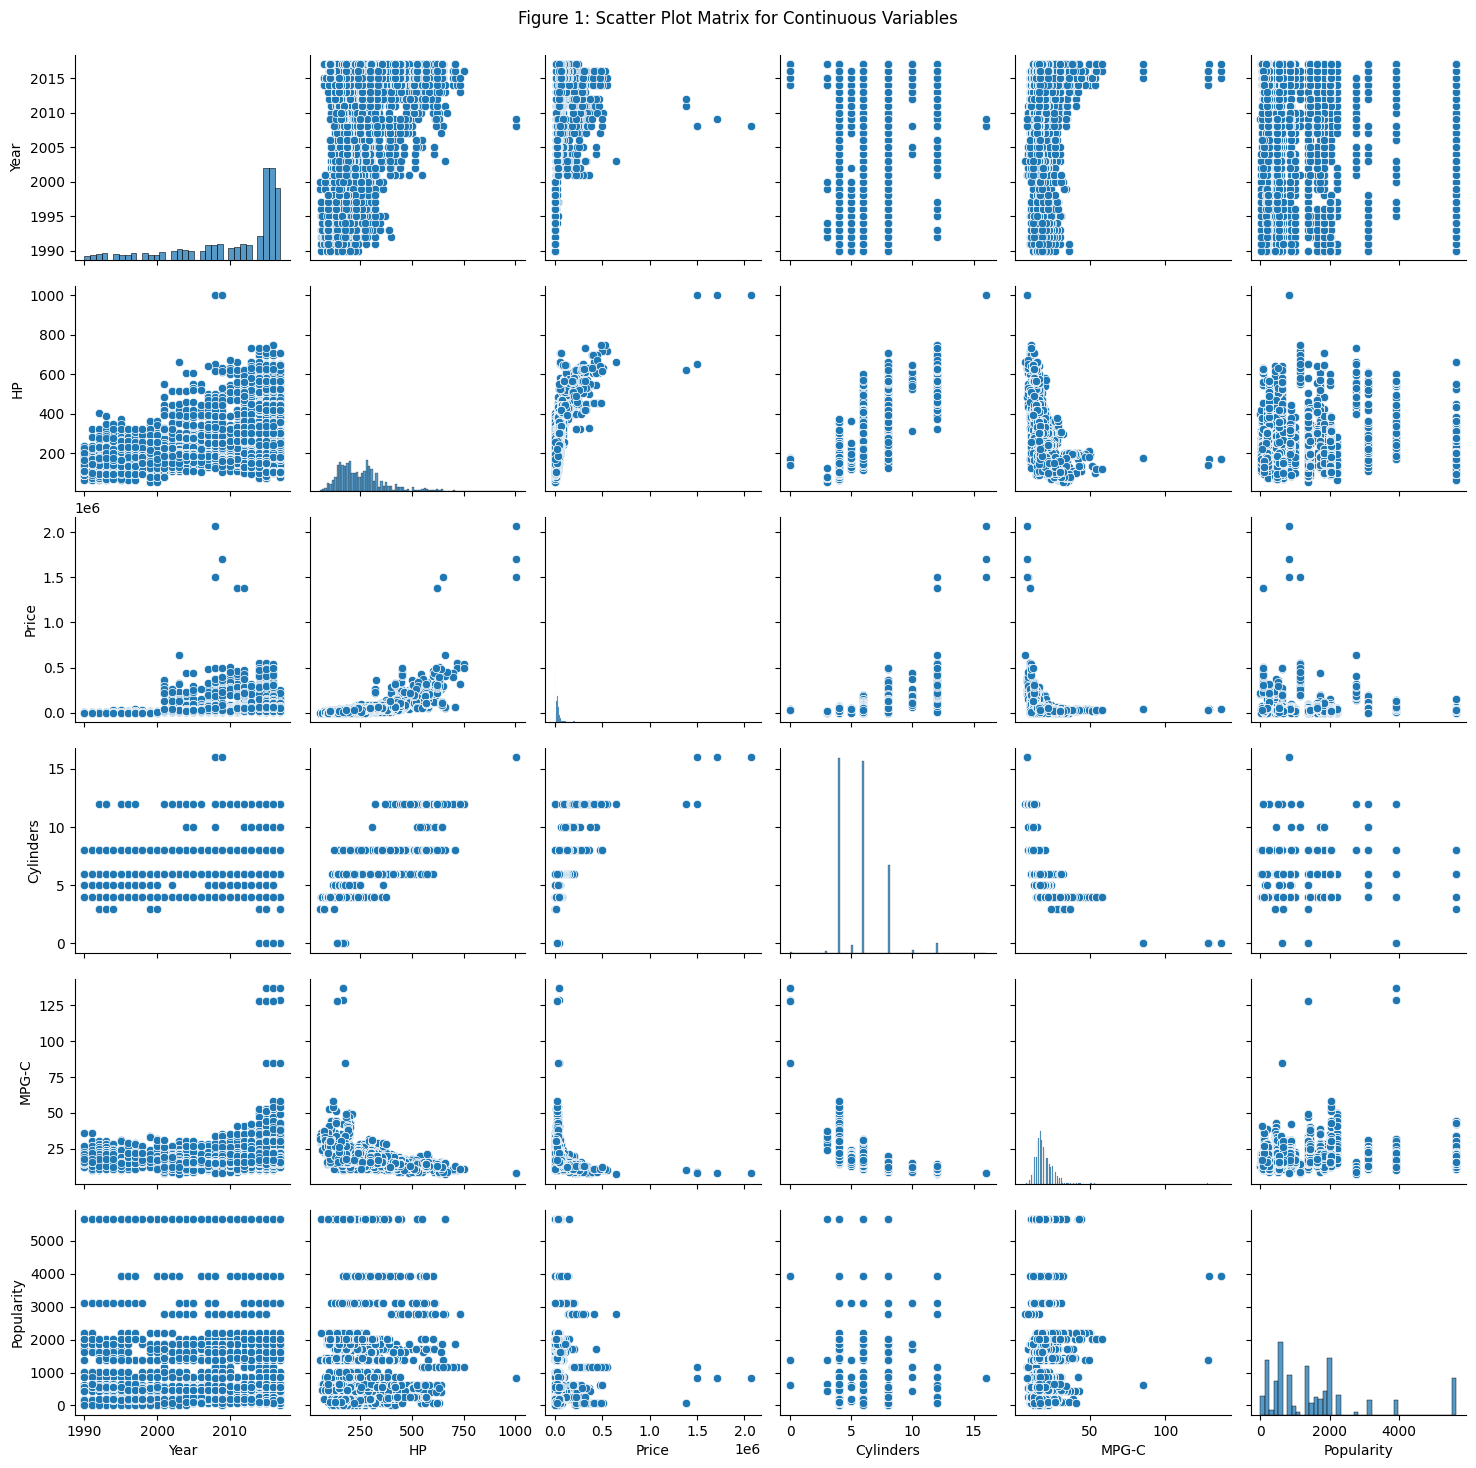

In [20]:
# Plotting the scatter plot matrix for continuous variables
sns.pairplot(data[numerical_features])
# title
plt.suptitle(
    "Figure " + str(figure_counter) + ": Scatter Plot Matrix for Continuous Variables"
)
plt.subplots_adjust(top=0.95)
plt.show()
figure_counter += 1

#### Plotting Hexbin Plots for Continuous Variables

To understand the density of data points between pairs of continuous variables, hexbin plots are used:


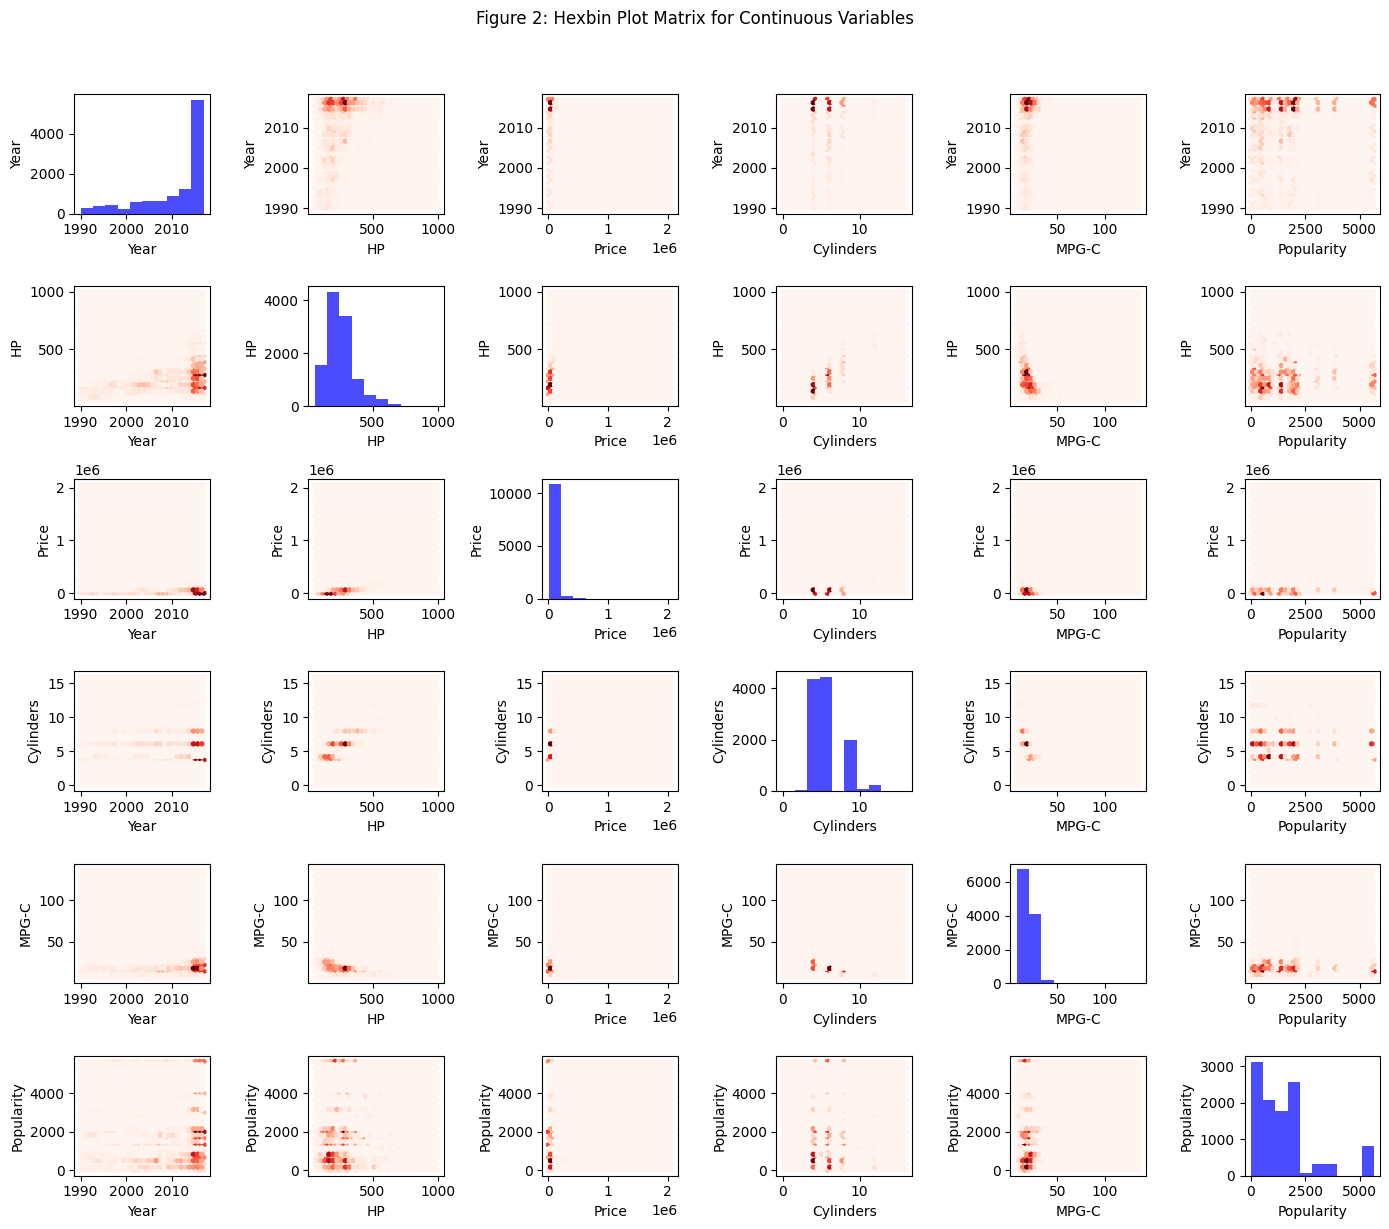

In [21]:
numerical_data = data[numerical_features]

num_features = len(numerical_features)

fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(14, 12))
plt.suptitle(
    "Figure " + str(figure_counter) + ": Hexbin Plot Matrix for Continuous Variables",
    y=1.02,
)

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        if i == j:
            ax.hist(
                numerical_data[numerical_features[i]], bins=10, color="blue", alpha=0.7
            )
            ax.set_xlabel(numerical_features[i])
            ax.set_ylabel(numerical_features[i])
        else:
            ax.hexbin(
                numerical_data[numerical_features[j]],
                numerical_data[numerical_features[i]],
                gridsize=30,
                cmap="Reds",
            )
            ax.set_xlabel(numerical_features[j])
            ax.set_ylabel(numerical_features[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

figure_counter += 1

Year distribution is left skewed, which is expected as the dataset contains more recent vehicles. HP, Price, Cylinders, MPG-C, and Popularity are right-skewed. 

#### Plotting the Bar Plot Showing the Percentage of Categorical Values in Each Category


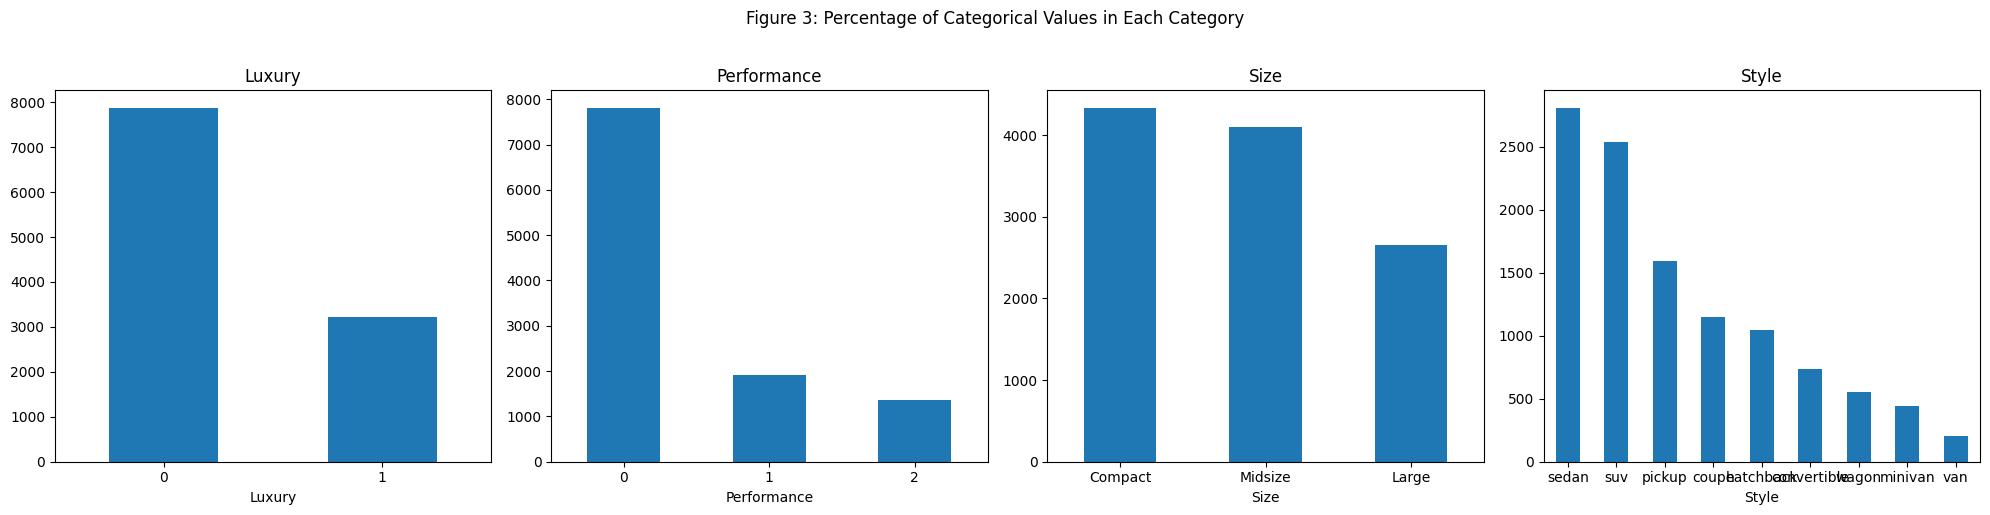

In [22]:
# Plotting the percentage of categorical values in each category
fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))

for i, feature in enumerate(categorical_features):
    data[feature].value_counts().plot(kind="bar", ax=axes[i], rot=0)
    axes[i].set_title(feature)

plt.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Percentage of Categorical Values in Each Category",
    y=1.02,
)
plt.tight_layout()
plt.show()
figure_counter += 1

Based on the above figure, most cars are not luxury nor performance. 

### Plotting the Bar Plots for Categorical Features Finding the Relationship Between the Features


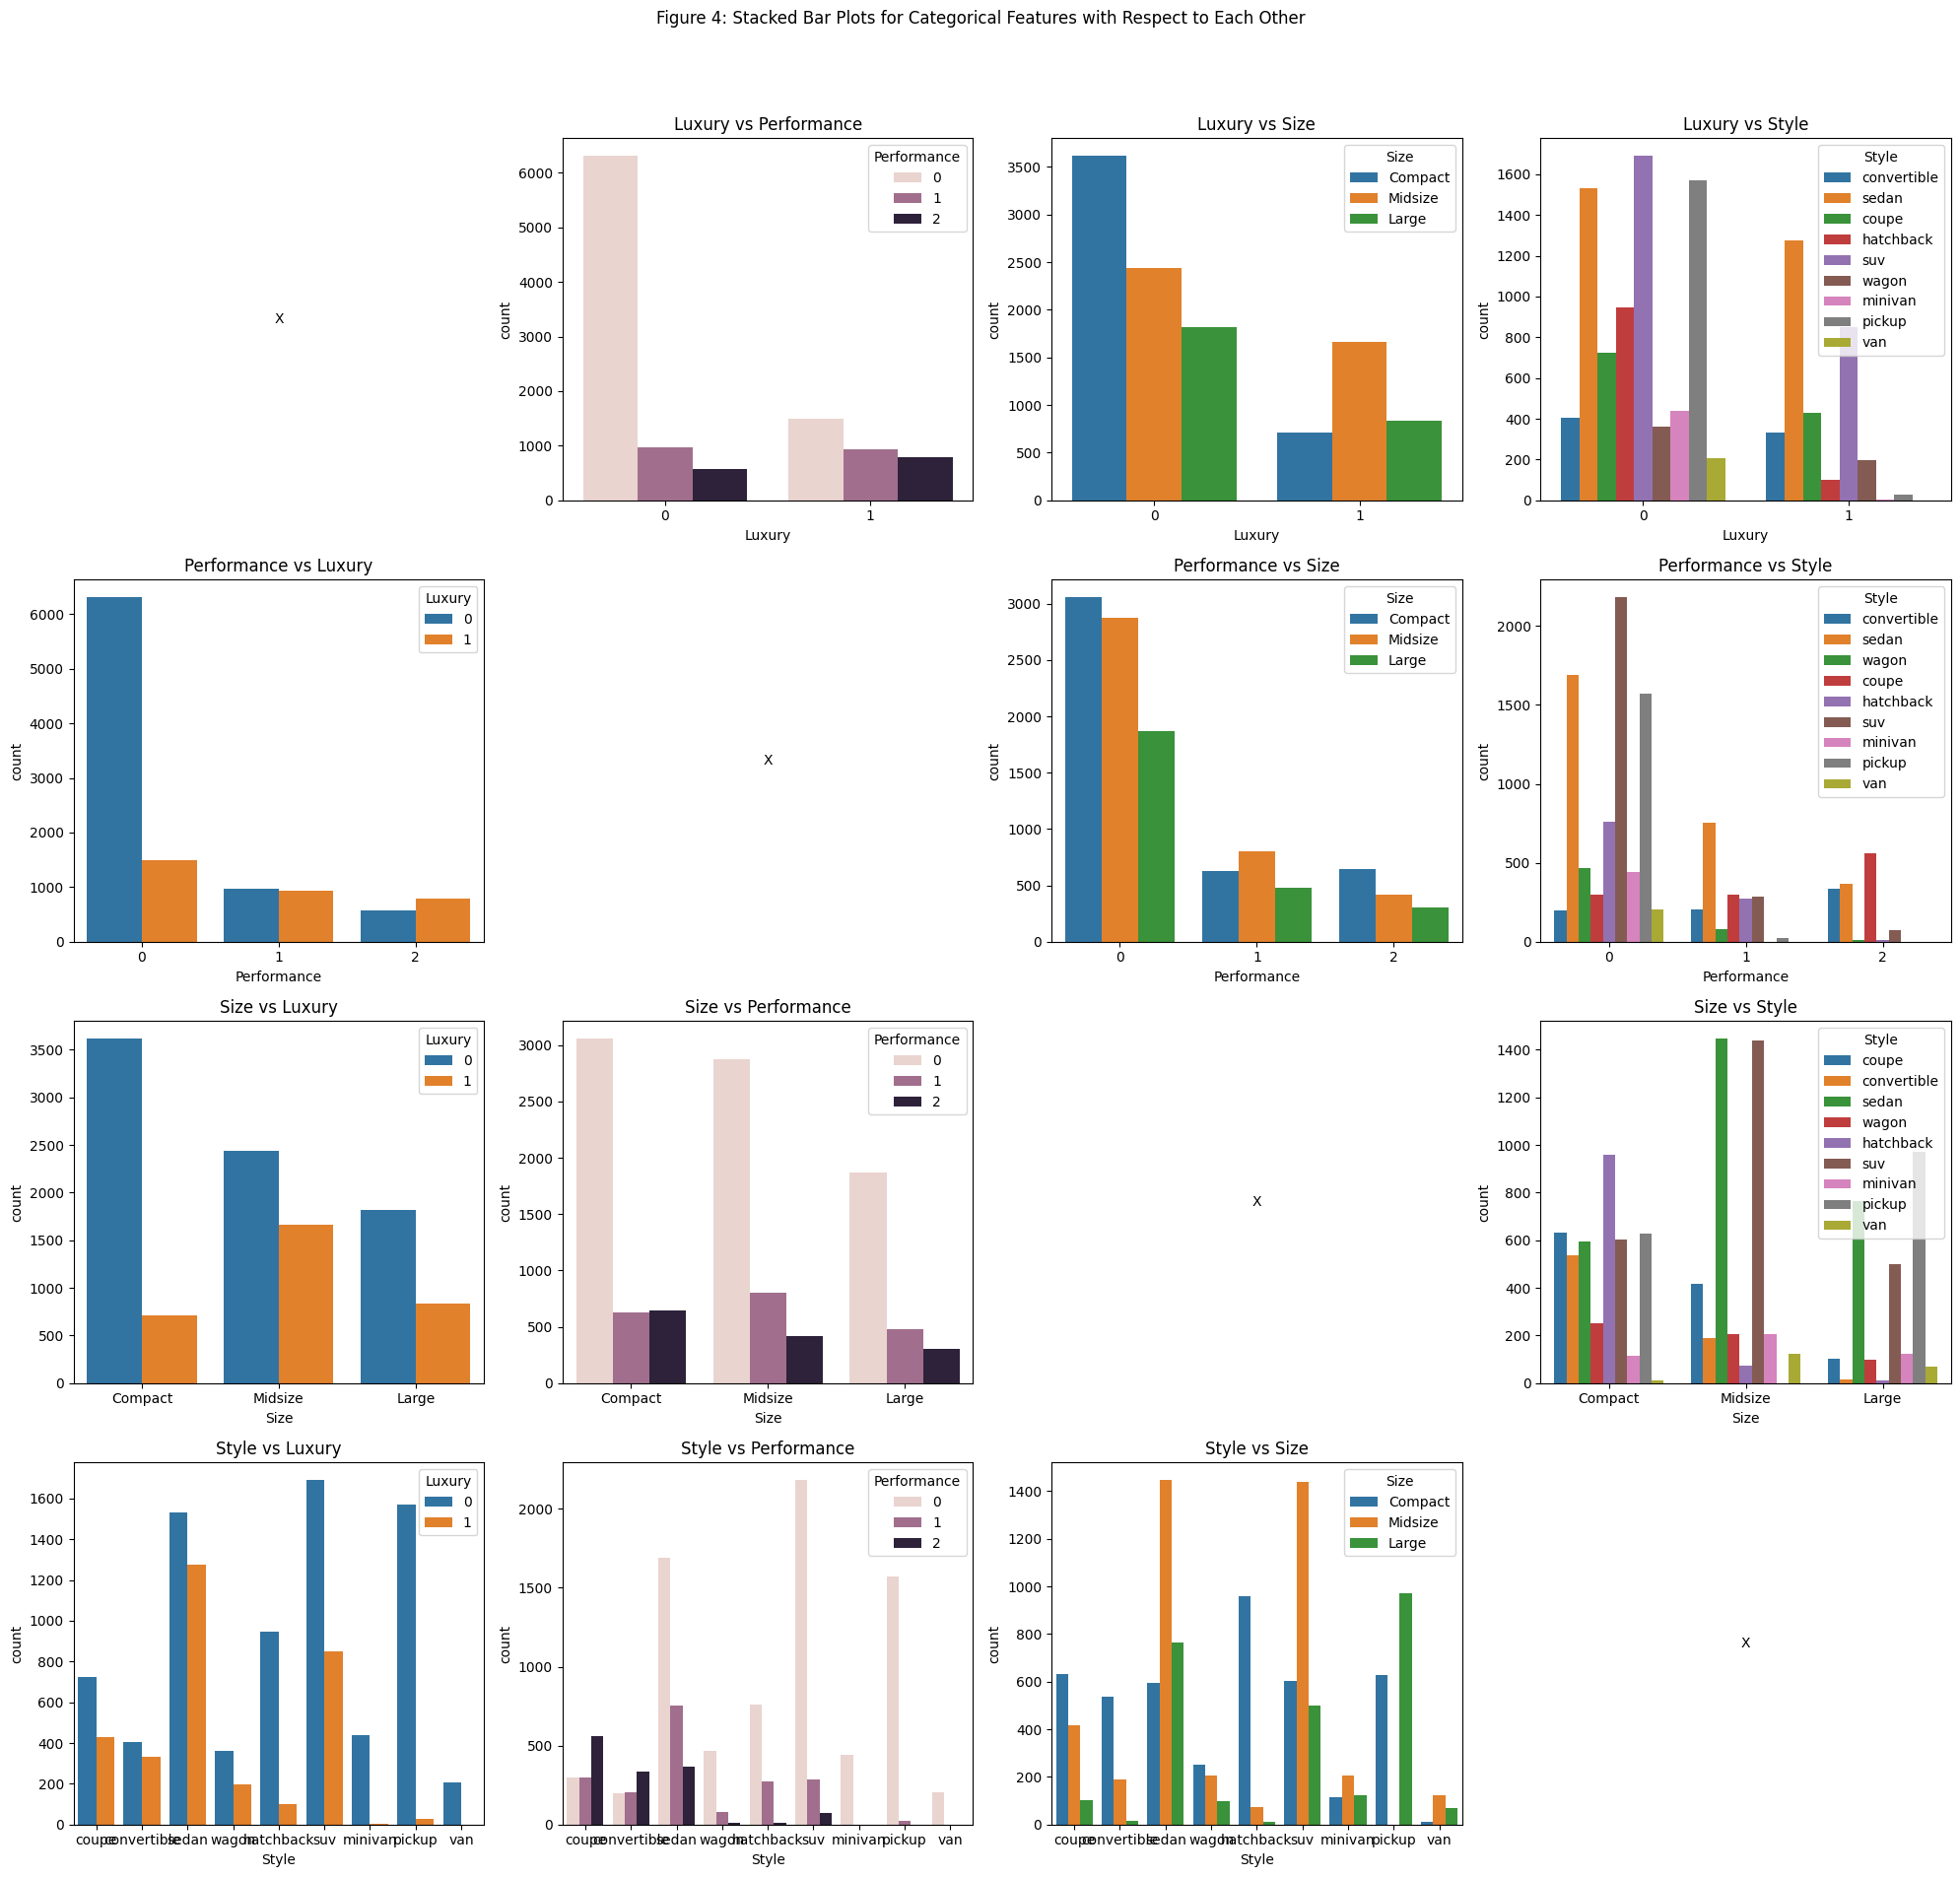

In [23]:
fig, axs = plt.subplots(
    len(categorical_features), len(categorical_features), figsize=(20, 20)
)
fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Stacked Bar Plots for Categorical Features with Respect to Each Other"
)

for i, feature_i in enumerate(categorical_features):
    for j, feature_j in enumerate(categorical_features):
        if i != j:
            sns.countplot(x=feature_i, hue=feature_j, data=data, ax=axs[i, j])
            axs[i, j].set_title(f"{feature_i} vs {feature_j}")
        else:
            axs[i, j].annotate(
                "X", (0.5, 0.5), xycoords="axes fraction", ha="center", va="center"
            )
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            axs[i, j].spines["top"].set_visible(False)
            axs[i, j].spines["right"].set_visible(False)
            axs[i, j].spines["left"].set_visible(False)
            axs[i, j].spines["bottom"].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
figure_counter += 1

#### Are SUVs more likely to be luxury vehicles?

In [24]:
suv_popularity = data[data["Style"] == "suv"]["Popularity"].mean()
non_suv_popularity = data[data["Style"] != "suv"]["Popularity"].mean()
sedan_popularity = data[data["Style"] == "sedan"]["Popularity"].mean()

display(Markdown(f"SUV Popularity: {suv_popularity}"))
display(Markdown(f"Non-SUV Popularity: {non_suv_popularity}"))
display(Markdown(f"Sedan Popularity: {sedan_popularity}"))

mean_popularity_by_style = data.groupby("Style")["Popularity"].mean()

display(Markdown("#### Mean Popularity by Vehicle Style"))

mean_popularity_by_style

SUV Popularity: 1339.5545060999607

Non-SUV Popularity: 1623.3318117977528

Sedan Popularity: 1326.7306733167081

#### Mean Popularity by Vehicle Style

Style
convertible   1517.23
coupe         1591.63
hatchback     1370.86
minivan       1916.34
pickup        2078.23
sedan         1326.73
suv           1339.55
van           3391.20
wagon         1611.90
Name: Popularity, dtype: Float64

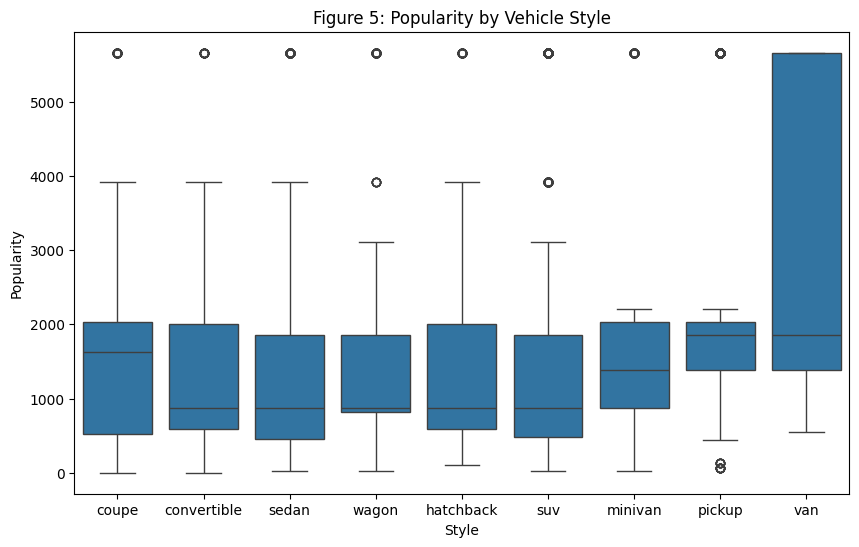

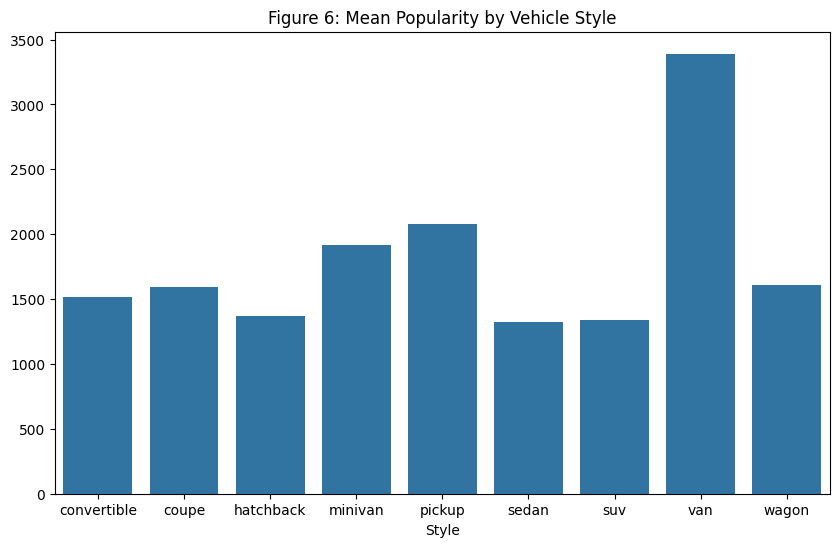

In [25]:
# Box plot for popularity by style
plt.figure(figsize=(10, 6))
sns.boxplot(x="Style", y="Popularity", data=data)
plt.title("Figure " + str(figure_counter) + ": Popularity by Vehicle Style")
plt.show()
figure_counter += 1

# Bar chart for mean popularity by style
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_popularity_by_style.index, y=mean_popularity_by_style.values)
plt.title("Figure " + str(figure_counter) + ": Mean Popularity by Vehicle Style")
plt.show()
figure_counter += 1

In [26]:
from scipy.stats import f_oneway

# popularity values for each style
popularity_by_style = [
    data[data["Style"] == style]["Popularity"] for style in data["Style"].unique()
]

f_stat, p_value = f_oneway(*popularity_by_style)
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print(
        "There are significant differences in popularity between different vehicle styles."
    )
else:
    print(
        "There are no significant differences in popularity between different vehicle styles."
    )

ANOVA F-statistic: 95.3771964477478
ANOVA p-value: 4.5087990957645065e-154
There are significant differences in popularity between different vehicle styles.


This means that SUVs are not necessarily more popular compared to other vehicle styles such as pickups, vans, or minivans.

#### Relationship between the Categorical Features and the Target Variable


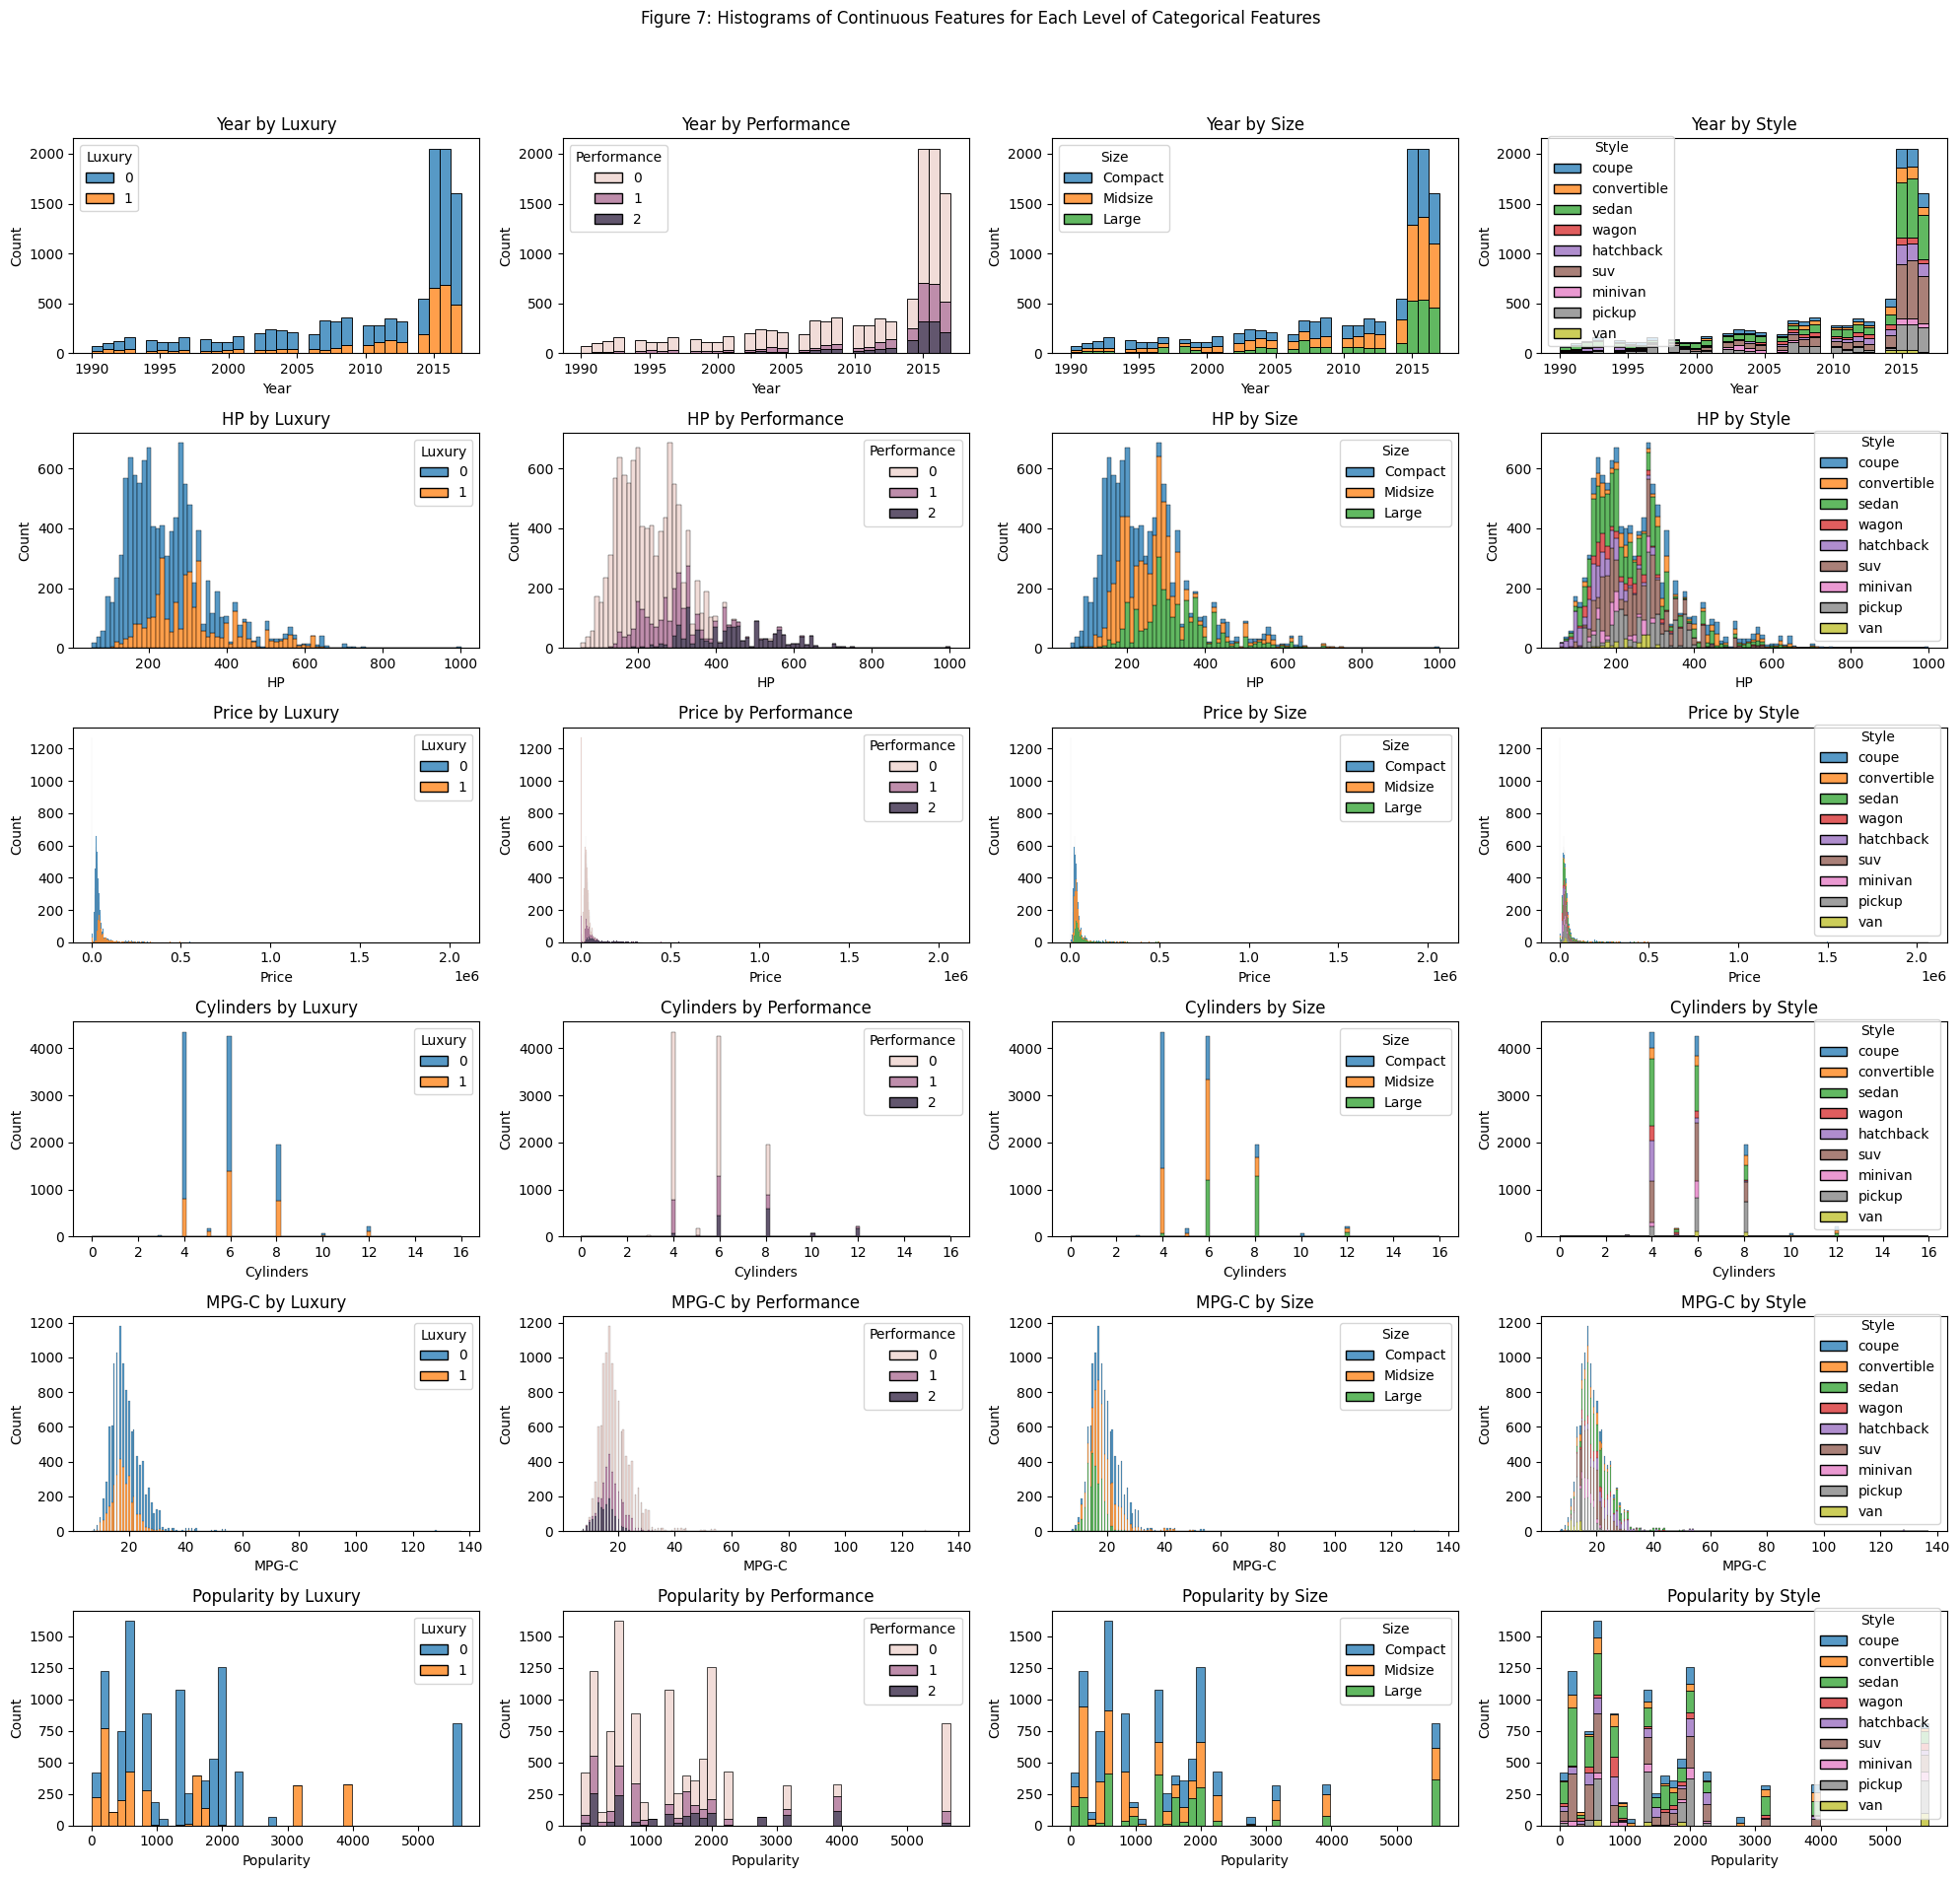

In [27]:
fig, axs = plt.subplots(
    len(numerical_features), len(categorical_features), figsize=(20, 20)
)
fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Histograms of Continuous Features for Each Level of Categorical Features"
)

for i, cont_feature in enumerate(numerical_features):
    for j, cat_feature in enumerate(categorical_features):
        sns.histplot(
            data=data, x=cont_feature, hue=cat_feature, multiple="stack", ax=axs[i, j]
        )
        axs[i, j].set_title(f"{cont_feature} by {cat_feature}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
figure_counter += 1

#### Heat Map Correlation Between the Features:


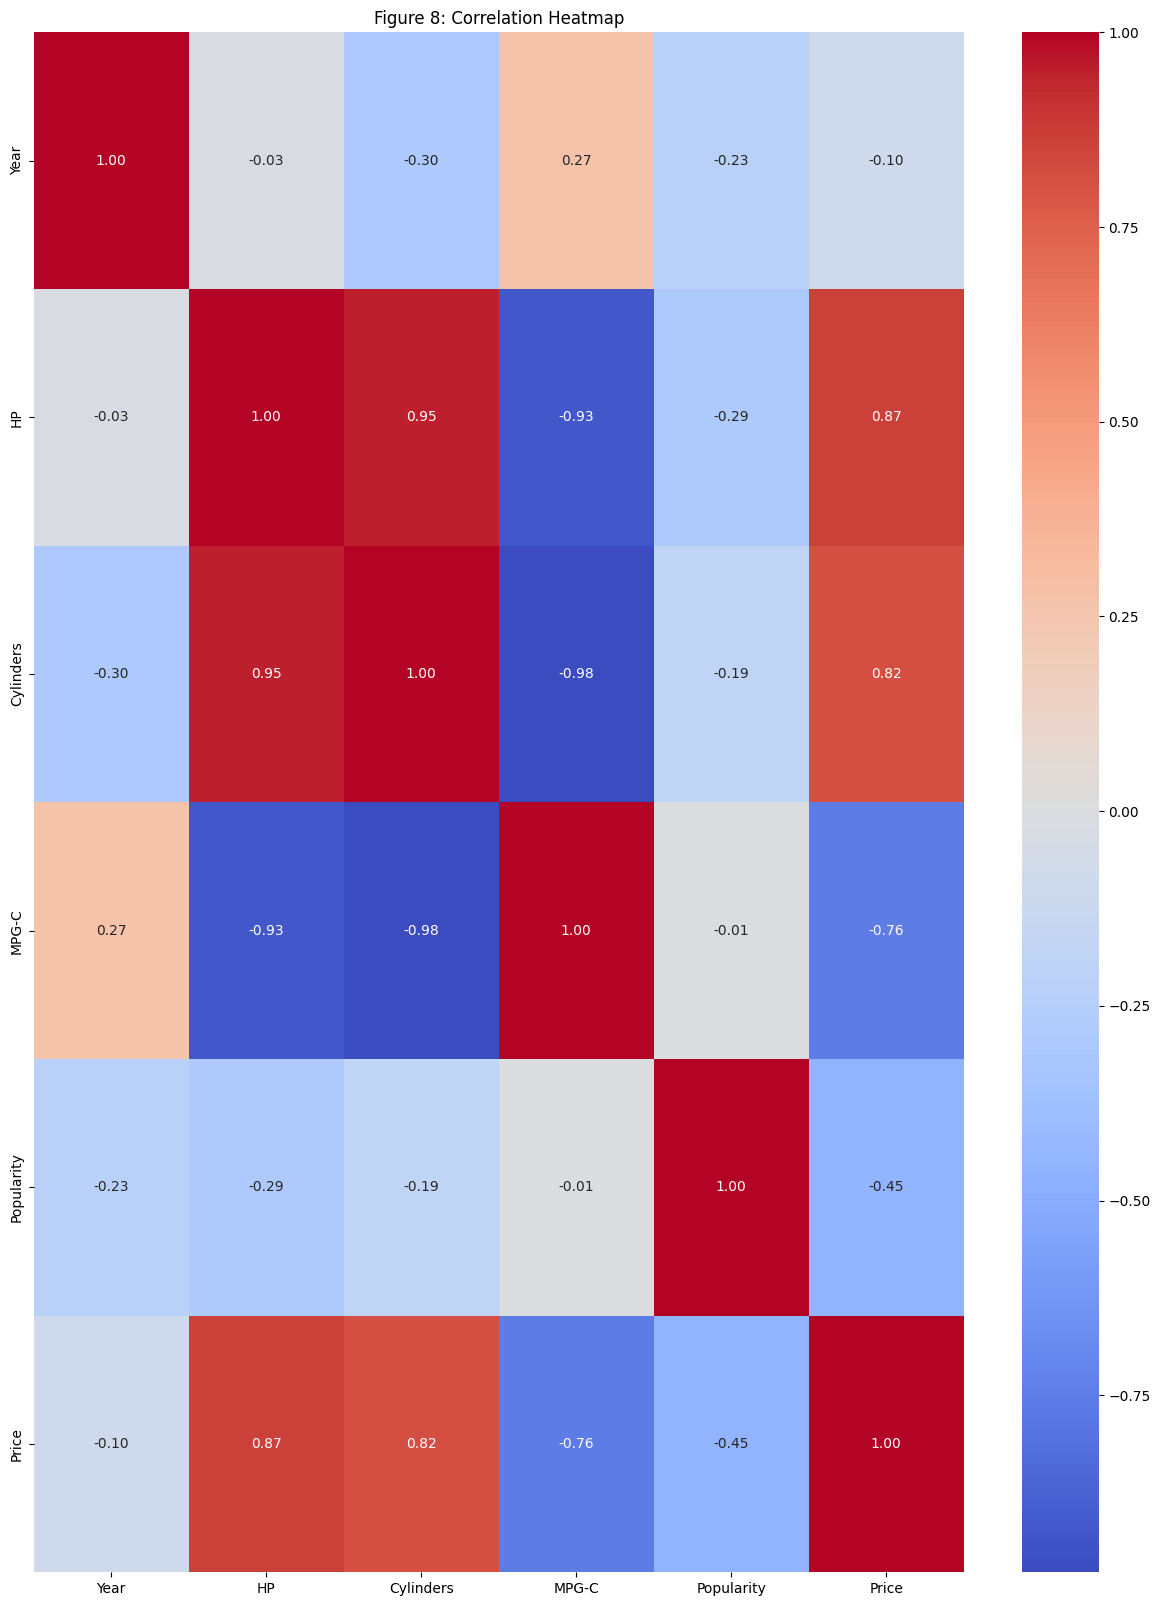

In [28]:
numerical_features = [
    "Year",
    "HP",
    "Cylinders",
    "MPG-C",
    "Popularity",
    "Price",
]

correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(15, 20))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure " + str(figure_counter) + ": Correlation Heatmap")
plt.show()
figure_counter += 1

### Showing the Continuous Feature Distributions Using Violin Plots


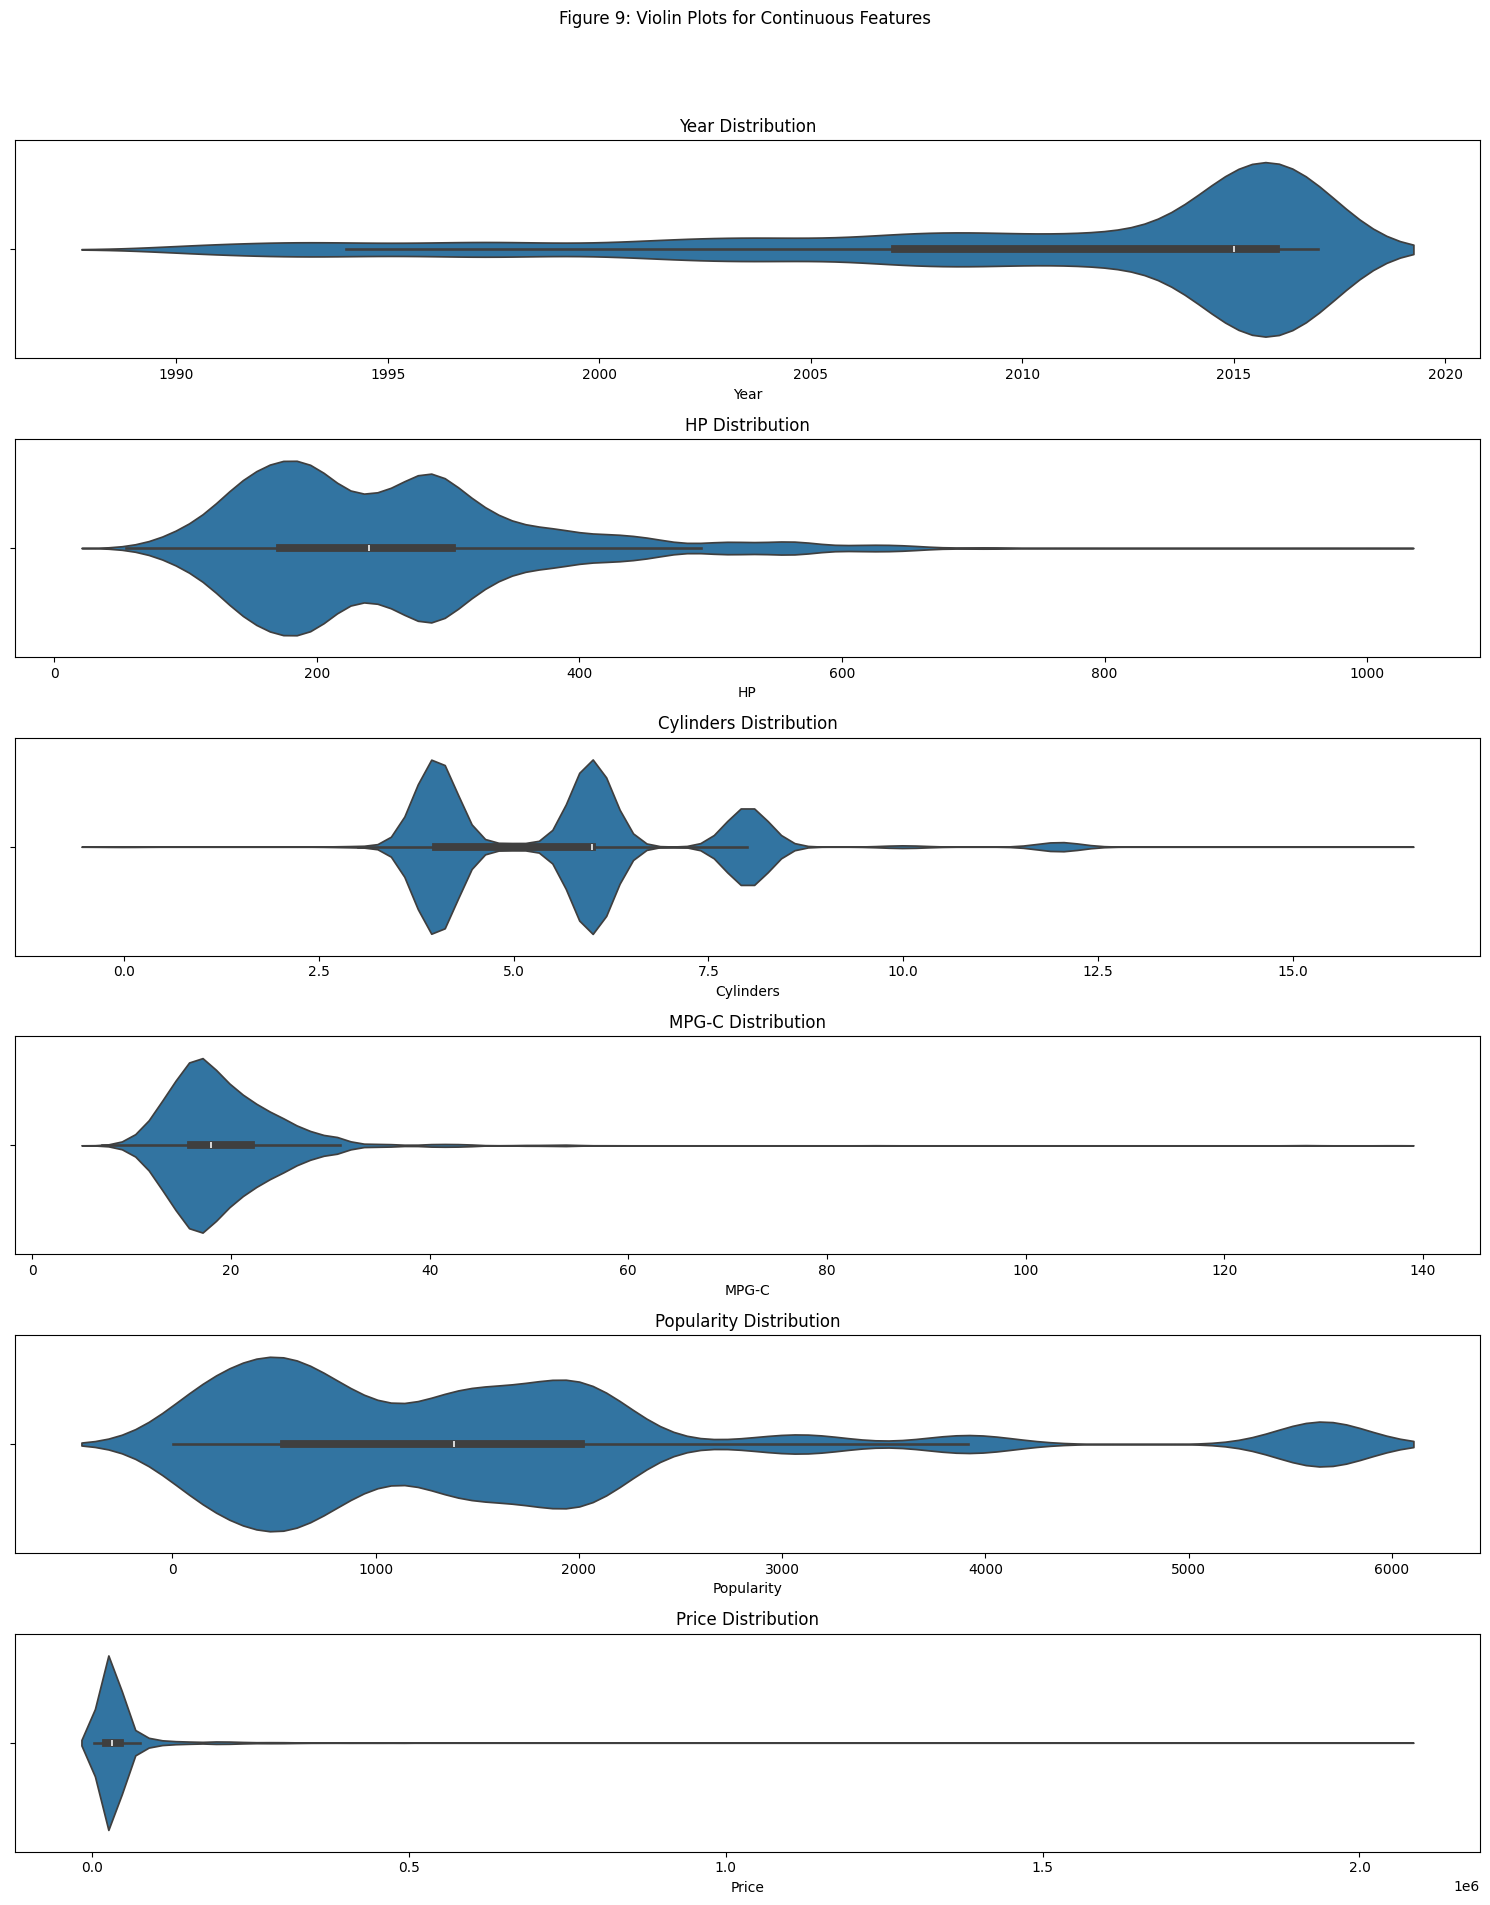

In [29]:
plt.figure(figsize=(15, 20))
fig = plt.gcf()
fig.suptitle("Figure " + str(figure_counter) + ": Violin Plots for Continuous Features")

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.violinplot(x=data[feature])
    plt.title(f"{feature} Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
figure_counter += 1

### Analyzing Summary Statistics

Analyzing the summary statistics and visualizations to derive initial insights about the data. Discussing any interesting patterns or trends observed.


#### Summary Statistics:

1. Numerical Features:

   - **Year**: The distribution of vehicles is left-skewed, with most vehicles being from recent years.
   - **Horsepower**: The distribution of horsepower is right-skewed, with most vehicles having horsepower values between 100 and 300.
   - **Cylinders**: The majority of vehicles have 4, 6, or 8 cylinders, with 6 cylinders being the most common.
   - **MGP-C**: The distribution of city MPG is right-skewed, with most vehicles having city MPG values between 15 and 25.
   - **Price**: The distribution of prices is right-skewed, with most vehicles having prices between 20,000 and 40,000. (The data is in millions)
   - **Popularity**: The distribution of popularity is right-skewed, with most vehicles having low popularity values.

2. Categorical Features:

   - **Luxury**: The majority of vehicles are not classified as luxury vehicles.
   - **Performance**: The majority of vehicles are not classified as performance vehicles.

3. Interesting Relationships:

   - There is a high positive correlation between horsepower and price, indicating that vehicles with higher horsepower tend to have higher prices.
   - There is a -0.45 correlation between price and popularity, indicating that vehicles with higher prices tend to have lower popularity.
   - Over the years, the price and horsepower of the vehicles have increased, as indicated by the positive correlation between year and price and year and horsepower.
   - There is almost no correlation between the number city MPG and popularity, indicating that fuel efficiency does not have a significant impact on the popularity of a vehicle.
   - There is a significant negative correlation between city MPG and price, indicating that vehicles with higher prices tend to have lower city MPG.
   - Over the years, cars became more fuel efficient as indicated by the positive correlation between year and city MPG.
   - SUVs are not necessarily more popular compared to other vehicle styles such as pickups, vans, or minivans.

4. Outliers:
   The existence of outliers was discussed in [Data Quality Issues Section](#subtask_2_2). There is no need to remove the outliers as they appear to be valid data points.


## Hypothesis Proposal

Based on the analysis, proposing hypotheses that could be tested in further studies. Explaining why these hypotheses are relevant to the business problem and how they could provide value.


### Hypotheses

1. **Hyphothesis 1: Vehicles with horsepower within a certain range are more popular than vehicles with horsepower outside that range.**

   - **Null Hypothesis (H0)**: There is no significant difference in popularity between vehicles with horsepower within a certain range and vehicles with horsepower outside that range.
   - **Alternative Hypothesis (H1)**: There is a significant difference in popularity between vehicles with horsepower within a certain range and vehicles with horsepower outside that range.
   - **Reasoning**: The heatmap correlation between horsepower and popularity shows no significant correlation. However, it is possible that there is a specific range of horsepower values that are more popular among buyers. Also, since the IG score of horsepower with respect to popularity is high, it is worth investigating the relationship between horsepower and popularity further hoping to find a non-linear relationship between the two.
   - **Value**: This hypothesis can help car dealerships understand the relationship between vehicle horsepower and popularity. By testing this hypothesis, car dealerships can optimize their inventory by stocking vehicles with the most popular horsepower range. This can guide dealerships to prioritize vehicles with certain horsepower ranges, potentially optimizing inventory for vehicles with a higher likelihood of being sold quickly.

2. **Hyphothesis 2: Luxury vehicles tend to have lower popularity compared to non-luxury vehicles.**
   - **Null Hypothesis (H0)**: There is no significant difference in popularity between luxury vehicles and non-luxury vehicles.
   - **Alternative Hypothesis (H1)**: Luxury vehicles have significantly lower popularity compared to non-luxury vehicles. (potentially different buyer segments)
   - **Reasoning**: The data shows a negative correlation (-0.14) between luxury status and popularity, suggesting that luxury vehicles might not be as popular as non-luxury ones.
   - **Value**: This hypothesis can help car dealerships understand the relationship between vehicle luxury status and popularity. By testing this hypothesis, car dealerships can make informed decisions about stocking luxury vehicles based on their popularity. If luxury vehicles are found to have lower popularity, dealerships may choose to prioritize non-luxury vehicles in their inventory to maximize sales.


## Back to Data Preparation and Preprocessing

Other required steps for data preparation and preprocessing are as follows:


6. Converting categorical features to one-hot encoding/label encoding to be used in the regression model since the model cannot handle categorical data directly.


In [30]:
# Copy data into a new dataframe to avoid modifying the original data
data_before_encoding = data.copy()

features = [col for col in data.columns if col != "Popularity"]

# seperate the features and target variable
data = data[features + ["Popularity"]]
X = data[features]
y = data["Popularity"]

# one-hot encoding the categorical features
X_encoded = pd.get_dummies(X)

# convert the one-hot encoded features to binary
# according to the ABT table, all non-categorical features are int64. Therefore, it is safe to convert all features to int64 in order to convert the one-hot encoded features to binary.
X_encoded = X_encoded.astype("int64")

data = pd.concat([X_encoded, y], axis=1)
data = data.loc[:, ~data.columns.duplicated()]

### Verifying The Quality of the Cleaned Data


In [31]:
def check_numeric_consistency(series):
    return ((series >= 0) & series.notnull()).mean() * 100


def check_binary_consistency(series):
    return (series.isin([0, 1])).mean() * 100


def calculate_outlier_percentage(series):
    if series.dtype in ["float64", "int64"]:
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return (len(outliers) / len(series)) * 100


def data_quality_report_v2(df):
    report = []

    descriptives = df.describe(include="all", percentiles=[0.25, 0.75])
    mode_df = df.mode().loc[0]
    value_counts_df = df.apply(lambda x: x.value_counts().head(2))

    for column in df.columns:
        dtype = df[column].dtype
        unique_vals = df[column].nunique()
        is_binary = df[column].isin([0, 1]).all()

        if dtype in ["float64", "int64"] and not is_binary:
            consistency = check_numeric_consistency(df[column])
            outlier_percentage = calculate_outlier_percentage(df[column])
        elif is_binary or column.startswith("Make_") or column.startswith("Model_"):
            consistency = check_binary_consistency(df[column])
        else:
            consistency = 100  # No consistency check for categorical features
            outlier_percentage = None

        report.append(
            {
                "Feature Name": column,
                "Completeness (%)": 100 - df[column].isnull().mean() * 100,
                "Uniqueness (%)": (unique_vals / len(df)) * 100,
                "Consistency (%)": consistency,
                "Mean": descriptives.at["mean", column],
                "Median": descriptives.at["50%", column],
                "Std Dev": descriptives.at["std", column],
                "Most Frequent": mode_df[column],
                "Second Most Frequent": (
                    value_counts_df[column].index[1] if unique_vals > 1 else None
                ),
                "Min": descriptives.at["min", column],
                "Q1": descriptives.at["25%", column],
                "Q3": descriptives.at["75%", column],
                "Max": descriptives.at["max", column],
                "Cardinality": unique_vals,
                "Outlier Percentage (%)": outlier_percentage,
            }
        )

    return pd.DataFrame(report)


# Example usage:
quality_report_v2 = data_quality_report_v2(data)
display(
    Markdown(
        "### Data Quality Report After Cleaning  Version {}".format(
            data_quality_report_version
        )
    )
)
data_quality_report_version += 1
quality_report_v2.head(30)

### Data Quality Report After Cleaning  Version 2

,Feature Name,Completeness (%),Uniqueness (%),Consistency (%),Mean,Median,Std Dev,Most Frequent,Second Most Frequent,Min,Q1,Q3,Max,Cardinality,Outlier Percentage (%)
0,Year,100.00,0.25,100.00,2010.71,2015.00,7.23,2016,1,1990.00,2007.00,2016.00,2017.00,28,4.18
1,HP,100.00,3.20,100.00,253.59,240.00,110.18,200,1,55.00,172.00,303.00,1001.00,355,4.52
2,Cylinders,100.00,0.08,100.00,5.69,6.00,1.77,4,1,0.00,4.00,6.00,16.00,9,2.78
3,Doors,100.00,0.03,100.00,3.45,4.00,0.87,4,1,2.00,2.00,4.00,4.00,3,0.00
4,MPG-H,100.00,0.40,100.00,26.28,25.00,7.48,24,1,12.00,22.00,30.00,354.00,44,1.16
5,MPG-C,100.00,0.45,100.00,19.30,18.00,6.61,17,1,7.00,16.00,22.00,137.00,50,2.24
6,Performance,100.00,0.03,100.00,0.42,0.00,0.70,0,1,0.00,0.00,1.00,2.00,3,0.00
7,Factory Tuner,100.00,0.02,100.00,0.05,0.00,0.23,0,1,0.00,0.00,0.00,1.00,2,0.00
8,Exotic,100.00,0.02,100.00,0.04,0.00,0.20,0,1,0.00,0.00,0.00,1.00,2,0.00
9,Luxury,100.00,0.02,100.00,0.29,0.00,0.45,0,1,0.00,0.00,1.00,1.00,2,0.00



# Feature Selection and Dimensionality Reduction (+ Normalization & Scaling)
## Reducing the Number of Features to 20


In [32]:
def calculate_gini(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini


def weighted_gini(feature, y):
    unique_values = np.unique(feature)
    weighted_gini = 0
    total_instances = len(y)

    for value in unique_values:
        partition_indices = np.where(feature == value)[0]
        partition_y = y[partition_indices]
        partition_weight = len(partition_y) / total_instances
        partition_gini = calculate_gini(partition_y)
        weighted_gini += partition_weight * partition_gini

    return weighted_gini


def calculate_information_gain(X_encoded, y):
    gini_full = calculate_gini(y)

    information_gains = []
    num_features = X_encoded.shape[1]

    for d in range(num_features):
        feature_d = X_encoded[:, d]
        weighted_gini_d = weighted_gini(feature_d, y)
        information_gain = gini_full - weighted_gini_d
        information_gains.append(information_gain)

    return information_gains


X_encoded = data.drop("Popularity", axis=1).values
y = data["Popularity"].values

information_gains = calculate_information_gain(X_encoded, y)

information_gain_df = pd.DataFrame(
    {
        "Feature Name": data.drop("Popularity", axis=1).columns,
        "Information Gain": information_gains,
    }
)

information_gain_df = information_gain_df.sort_values(
    "Information Gain", ascending=False
)

display(Markdown("### Information Gain for Each Feature"))
information_gain_df.head(20)

### Information Gain for Each Feature

,Feature Name,Information Gain
11,Price,0.61
1,HP,0.36
21,Make_Chevrolet,0.09
26,Make_Ford,0.07
56,Make_Toyota,0.06
57,Make_Volkswagen,0.05
45,Make_Nissan,0.05
23,Make_Dodge,0.05
27,Make_GMC,0.04
5,MPG-C,0.04


### Keeping the 20 Most Important Features for the Model

In [33]:
top_features_kept = information_gain_df["Feature Name"].head(20).tolist()

data = data[["Popularity"] + top_features_kept]

display(Markdown("#### Features Kept After Feature Selection"))
top_features_kept

#### Features Kept After Feature Selection

['Price',
 'HP',
 'Make_Chevrolet',
 'Make_Ford',
 'Make_Toyota',
 'Make_Volkswagen',
 'Make_Nissan',
 'Make_Dodge',
 'Make_GMC',
 'MPG-C',
 'Make_Honda',
 'Make_Cadillac',
 'Make_Mazda',
 'MPG-H',
 'Make_Mercedes-Benz',
 'Make_Suzuki',
 'Luxury',
 'Make_Infiniti',
 'Make_BMW',
 'Make_Audi']

### Justification for Feature Selection

This make sense to keep top 20 features as the model can be overfitted with too many features. The top 20 features are selected based on the Information Gain calculated using the Gini Index. Gini Index is calculated as:

The **Gini index** calculates how often you would misclassify an instance in the dataset $D$ if you classified it based on the distribution of the target levels $t = l$ in the dataset.

$Gini(t, D) = 1 - \sum_{l \in levels(t)} P(t = l)^2$

Where:
- $t$ is the target variable.
- $D$ is the dataset.
- $levels(t)$ is the set of unique levels of the target variable.
- $P(t = l)$ is the probability of the target variable being level $l$ in the dataset.

The **Information Gain** is calculated as the difference between the Gini index of the parent node and the weighted sum of the Gini index of the child nodes.

$IG(t, a) = Gini(t, D) - \sum_{v \in values(a)} \frac{|D^v|}{|D|} Gini(t, D^v)$

Where:
- $IG(t, a)$ is the Information Gain of the target variable $t$ with respect to the attribute $a$.
- $D^v$ is the subset of the dataset $D$ where the attribute $a$ has value $v$.
- $values(a)$ is the set of unique values of the attribute $a$.

The Information Gain is used to rank the features based on their importance in predicting the target variable. Given that Gini Index is less biased towards large number of classes, it is a good choice for this dataset with high cardinality features such as Make and Model. The top 20 features with the highest Information Gain values will be selected for the model.

### Quality Check Before Model Building


8. At this point, the data is cleaned and preprocessed. The next step is to perform quality validation on the cleaned data to ensure that the data is ready.


In [34]:
def check_numeric_positive(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x >= 0).mean() * 100


def check_binary(series):
    return series.apply(lambda x: x in [0, 1]).mean() * 100


def data_quality_report_final(df, features):
    report = []
    completeness = df.apply(lambda x: x.notna().mean() * 100)
    uniqueness = df.apply(lambda x: (x.nunique() / len(x)) * 100)

    consistency_checks = {}
    for feature in features:
        if "Make_" in feature or feature == "Luxury":
            consistency_checks[feature] = check_binary(df[feature])
        elif feature in ["Price", "HP", "MPG-C", "MPG-H", "Popularity", "MPG-H"]:
            consistency_checks[feature] = check_numeric_positive(df[feature])
        else:
            consistency_checks[feature] = None

    for column in features:
        report.append(
            {
                "Feature Name": column,
                "Completeness (%)": completeness[column],
                "Uniqueness (%)": uniqueness[column],
                "Consistency (%)": consistency_checks.get(column, None),
                "Mean": (
                    df[column].mean()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Median": (
                    df[column].median()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Std Dev": (
                    df[column].std()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Most Frequent": (
                    df[column].mode().iat[0] if not df[column].mode().empty else None
                ),
                "Second Most Frequent": (
                    df[column].value_counts().index[1]
                    if df[column].nunique() > 1
                    else None
                ),
                "Min": (
                    df[column].min()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q1": (
                    df[column].quantile(0.25)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q3": (
                    df[column].quantile(0.75)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Max": (
                    df[column].max()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Cardinality": df[column].nunique(),
                "Outliers (%)": (
                    (
                        (
                            (
                                df[column]
                                < (
                                    df[column].quantile(0.25)
                                    - 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                            | (
                                df[column]
                                > (
                                    df[column].quantile(0.75)
                                    + 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                        )
                    ).mean()
                    * 100
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
            }
        )

    return pd.DataFrame(report)


quality_report_final = data_quality_report_final(
    data, features=top_features_kept + ["Popularity"]
)

display(
    Markdown(
        "### Final Data Quality Report For Verifications  Version {}".format(
            data_quality_report_version
        )
    )
)
data_quality_report_version += 1
quality_report_final

### Final Data Quality Report For Verifications  Version 3

,Feature Name,Completeness (%),Uniqueness (%),Consistency (%),Mean,Median,Std Dev,Most Frequent,Second Most Frequent,Min,Q1,Q3,Max,Cardinality,Outliers (%)
0,Price,100.00,54.19,100.00,41942.53,30610.00,61751.13,2000,29995,2000,21590.00,43035.00,2065902,6007,8.53
1,HP,100.00,3.20,100.00,253.59,240.00,110.18,200,170,55,172.00,303.00,1001,355,4.52
2,Make_Chevrolet,100.00,0.02,100.00,0.10,0.00,0.30,0,1,0,0.00,0.00,1,2,9.70
3,Make_Ford,100.00,0.02,100.00,0.07,0.00,0.26,0,1,0,0.00,0.00,1,2,7.33
4,Make_Toyota,100.00,0.02,100.00,0.06,0.00,0.25,0,1,0,0.00,0.00,1,2,6.46
5,Make_Volkswagen,100.00,0.02,100.00,0.05,0.00,0.22,0,1,0,0.00,0.00,1,2,5.09
6,Make_Nissan,100.00,0.02,100.00,0.05,0.00,0.22,0,1,0,0.00,0.00,1,2,4.88
7,Make_Dodge,100.00,0.02,100.00,0.05,0.00,0.21,0,1,0,0.00,0.00,1,2,4.76
8,Make_GMC,100.00,0.02,100.00,0.04,0.00,0.20,0,1,0,0.00,0.00,1,2,4.31
9,MPG-C,100.00,0.45,100.00,19.30,18.00,6.61,17,16,7,16.00,22.00,137,50,2.24


9. Moving on to feature engineering to create new features that can help the model better predict the popularity of a vehicle.

## Feature Engineering

### Fuel Efficiency Feature Engineering
The features on hand are: Price, HP, Make_Chevrolet, Make_Ford, Make_Toyota, Make_Volkswagen, Make_Nissan, Make_Dodge, Make_GMC, MPG-C, Make_Honda, Make_Cadillac, Make_Mazda, MPG-H, Make_Mercedes-Benz, Make_Suzuki, Luxury, Make_Infiniti, Make_BMW, Make_Audi, and target variable Popularity. Is it evident that MPG-C and MPG-H are correlated and related which can be combined to a single feature. 

1. Combine the MPG-C and MPG-H features to create a new feature called 'MPG-Avg' which is the average of MPG-C and MPG-H aimed to capture the average fuel efficiency of the vehicle. This feature can provide a more general view of the fuel efficiency of the vehicle. The higher the value of 'MPG-Avg', the more fuel-efficient the vehicle is on average.

2. Create a new feature called 'Price per HP' by dividing the Price by the HP. This feature can capture the relationship between the price of the vehicle and its horsepower. The higher the value of 'Price per HP', the more expensive the vehicle is relative to its horsepower.



In [35]:
# Combine the MPG-C and MPG-H features to create a new feature called 'MPG-Avg'
data["MPG-Avg"] = (data["MPG-C"] + data["MPG-H"]) / 2

# Drop the MPG-C and MPG-H features
data = data.drop(["MPG-C", "MPG-H"], axis=1)

# Display the first 2 rows of the data
data.head(2)

,Popularity,Price,HP,Make_Chevrolet,Make_Ford,Make_Toyota,Make_Volkswagen,Make_Nissan,Make_Dodge,Make_GMC,Make_Honda,Make_Cadillac,Make_Mazda,Make_Mercedes-Benz,Make_Suzuki,Luxury,Make_Infiniti,Make_BMW,Make_Audi,MPG-Avg
0,3916,46135,335,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,22.50
1,3916,40650,300,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,23.50


### Feature Engineering Make_ categories

The Make_ categories are one-hot encoded features representing the make of the vehicle. While many of the makes are represented in the dataset, some one-hot encoded makes are deleted in the feature selection process. To account for this, a new feature called 'Make_Other' is created to capture the makes that are not represented in the one-hot encoded features. This feature will help capture the information about the makes that are not explicitly represented in the dataset. The 'Make_Other' feature will be created by summing the one-hot encoded features that are not selected in the feature selection process. This way, the information about the makes that are not explicitly represented in the dataset will be captured in the 'Make_Other' feature.

In [36]:
# The Make_ categories are one-hot encoded features representing the make of the vehicle. These features can be combined to create a new feature called 'Make_Other' which represents all the makes that are not explicitly listed in the dataset.
make_columns = [col for col in data.columns if col.startswith("Make_")]
data["Make_Other"] = (data[make_columns].sum(axis=1) == 0).astype(int)

display(
    Markdown(
        "#### First 2 rows for Make_Other = 1 Making sure the logic is applied correctly"
    )
)
data[data["Make_Other"] == 1].head(1)

#### First 2 rows for Make_Other = 1 Making sure the logic is applied correctly

,Popularity,Price,HP,Make_Chevrolet,Make_Ford,Make_Toyota,Make_Volkswagen,Make_Nissan,Make_Dodge,Make_GMC,Make_Honda,Make_Cadillac,Make_Mazda,Make_Mercedes-Benz,Make_Suzuki,Luxury,Make_Infiniti,Make_BMW,Make_Audi,MPG-Avg,Make_Other
32,819,27495,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.50,1


### Feature Engineering Price per HP

The Price per HP feature is created by dividing the price of the vehicle by the horsepower of the vehicle. This feature captures the price efficiency of the vehicle in terms of horsepower. The higher the value of 'Price per HP', the more expensive the vehicle is relative to its horsepower. This feature can provide insights into the price efficiency of the vehicle in terms of horsepower to see if cars offering more horsepower per dollar are more popular.

In [37]:
# Adding Price per HP feature
data["Price_per_HP"] = data["Price"] / data["HP"]

## Normalizing the Features

Popularity, Price, HP, and MPG-Avg features should be normalized to ensure that all features are on the same scale. This is important for models that are sensitive to the scale of the features. The features will be normalized using Min-Max scaling to scale the features to a range of [0, 1] as it does not make sense to have negative values for these features. The Min-Max scaling formula is as follows (for 0 to 1 range):

$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$

Where:
- $X_{scaled}$ is the scaled value of the feature.
- $X$ is the original value of the feature.
- $X_{min}$ is the minimum value of the feature.
- $X_{max}$ is the maximum value of the feature.


By looking at the latest data quality report, it can be seen that the range of prices is too high compared to other features. When normalizing price, one issue arises is that a huge range of prices might be scaled to 0 resulting in loss of information. Therefore, I use RobustScaler from sklearn which scales the data according to the quantile range (IQR) which is more robust to outliers. Same applies for Popularity as many features will be assigned to 1. This way, the information is preserved while the data is scaled. Also, this way, the distribution of the data is preserved which is desired for such dataset where cars with high prices are part of the dataset, not outliers. For example, the price of a car can be as high as 1 million dollars, which is not an outlier in the context of the dataset and such information might be valuable for the model.

In [38]:
# Range normalization for Popularity, Price, HP, and MPG-Avg features
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
popularity_iqr_scaled = robust_scaler.fit_transform(data[["Popularity"]])
popularity_iqr_scaled_min_zero = popularity_iqr_scaled - popularity_iqr_scaled.min()
data["Popularity"] = popularity_iqr_scaled_min_zero

robust_scaler = RobustScaler()
price_iqr_scaled = robust_scaler.fit_transform(data[["Price"]])
price_iqr_scaled_min_zero = price_iqr_scaled - price_iqr_scaled.min()
data["Price"] = price_iqr_scaled_min_zero

robust_scaler = RobustScaler()
hp_iqr_scaled = robust_scaler.fit_transform(data[["HP"]])
hp_iqr_scaled_min_zero = hp_iqr_scaled - hp_iqr_scaled.min()
data["HP"] = hp_iqr_scaled_min_zero

robust_scaler = RobustScaler()
mpg_avg_iqr_scaled = robust_scaler.fit_transform(data[["MPG-Avg"]])
mpg_avg_iqr_scaled_min_zero = mpg_avg_iqr_scaled - mpg_avg_iqr_scaled.min()
data["MPG-Avg"] = mpg_avg_iqr_scaled_min_zero

robust_scaler = RobustScaler()
price_per_hp_iqr_scaled = robust_scaler.fit_transform(data[["Price_per_HP"]])
price_per_hp_iqr_scaled_min_zero = (
    price_per_hp_iqr_scaled - price_per_hp_iqr_scaled.min()
)
data["Price_per_HP"] = price_per_hp_iqr_scaled_min_zero

To make sure the normalization is done correctly and based on the logic above, the data quality report is checked again.

In [39]:
features = data.columns.tolist()


def check_numeric_positive(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x >= 0).mean() * 100


def check_binary(series):
    return series.apply(lambda x: x in [0, 1]).mean() * 100


def data_quality_report_final(df, features):
    report = []
    completeness = df.apply(lambda x: x.notna().mean() * 100)
    uniqueness = df.apply(lambda x: (x.nunique() / len(x)) * 100)

    consistency_checks = {}
    for feature in features:
        if "Make_" in feature or feature == "Luxury":
            consistency_checks[feature] = check_binary(df[feature])
        elif feature in ["Price", "Price_per_HP", "HP", "MPG-Avg", "Popularity"]:
            consistency_checks[feature] = check_numeric_positive(df[feature])
        else:
            consistency_checks[feature] = None

    for column in features:
        report.append(
            {
                "Feature Name": column,
                "Completeness (%)": completeness[column],
                "Uniqueness (%)": uniqueness[column],
                "Consistency (%)": consistency_checks.get(column, None),
                "Mean": (
                    df[column].mean()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Median": (
                    df[column].median()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Std Dev": (
                    df[column].std()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Most Frequent": (
                    df[column].mode().iat[0] if not df[column].mode().empty else None
                ),
                "Second Most Frequent": (
                    df[column].value_counts().index[1]
                    if df[column].nunique() > 1
                    else None
                ),
                "Min": (
                    df[column].min()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q1": (
                    df[column].quantile(0.25)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q3": (
                    df[column].quantile(0.75)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Max": (
                    df[column].max()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Cardinality": df[column].nunique(),
                "Outliers (%)": (
                    (
                        (
                            (
                                df[column]
                                < (
                                    df[column].quantile(0.25)
                                    - 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                            | (
                                df[column]
                                > (
                                    df[column].quantile(0.75)
                                    + 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                        )
                    ).mean()
                    * 100
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
            }
        )

    return pd.DataFrame(report)


quality_report_final = data_quality_report_final(data, features=features)

display(
    Markdown(
        "### After Normalization Data Quality Report For Verifications Version {}".format(
            data_quality_report_version
        )
    )
)
data_quality_report_version += 1
quality_report_final

### After Normalization Data Quality Report For Verifications Version 4

,Feature Name,Completeness (%),Uniqueness (%),Consistency (%),Mean,Median,Std Dev,Most Frequent,Second Most Frequent,Min,Q1,Q3,Max,Cardinality,Outliers (%)
0,Popularity,100.00,0.42,100.00,1.07,0.95,0.99,0.95,3.87,0.00,0.37,1.37,3.87,47,7.33
1,Price,100.00,54.19,100.00,1.86,1.33,2.88,0.00,1.31,0.00,0.91,1.91,96.24,6007,8.53
2,HP,100.00,3.20,100.00,1.52,1.41,0.84,1.11,0.88,0.00,0.89,1.89,7.22,355,4.52
3,Make_Chevrolet,100.00,0.02,100.00,0.10,0.00,0.30,0.00,1.00,0.00,0.00,0.00,1.00,2,9.70
4,Make_Ford,100.00,0.02,100.00,0.07,0.00,0.26,0.00,1.00,0.00,0.00,0.00,1.00,2,7.33
5,Make_Toyota,100.00,0.02,100.00,0.06,0.00,0.25,0.00,1.00,0.00,0.00,0.00,1.00,2,6.46
6,Make_Volkswagen,100.00,0.02,100.00,0.05,0.00,0.22,0.00,1.00,0.00,0.00,0.00,1.00,2,5.09
7,Make_Nissan,100.00,0.02,100.00,0.05,0.00,0.22,0.00,1.00,0.00,0.00,0.00,1.00,2,4.88
8,Make_Dodge,100.00,0.02,100.00,0.05,0.00,0.21,0.00,1.00,0.00,0.00,0.00,1.00,2,4.76
9,Make_GMC,100.00,0.02,100.00,0.04,0.00,0.20,0.00,1.00,0.00,0.00,0.00,1.00,2,4.31


In the meantime, one might suggest to bin the popularity feature to make it more categorical. However, this is not a good idea as the distribution of popularity is right-skewed and binning might not be a good idea as it might lead to loss of information. Therefore, the popularity feature will be kept as a continuous feature.

## LDA for Clustering and Dimensionality Reduction

Linear Discriminant Analysis (LDA) is a technique used for dimensionality reduction and classification. LDA finds the linear combinations of features that best separate the classes in the dataset. In this case, LDA will be used for dimensionality reduction to reduce the number of features in the dataset. The reduced features will capture the most important information in the dataset while minimizing the number of features. To perform LDA, the target variable, Popularity, must be binned. While, binning the popularity feature might not be a good idea as the distribution of popularity is right-skewed and binning will result in most cars falling into medium to low popularity bins. However, to explore the LDA, the popularity feature will be binned into 3 categories: low, medium, and high popularity. The LDA will be performed on the binned popularity feature to reduce the number of features in the dataset. The reduced features will capture the most important information in the dataset while minimizing the number of features. The number of components in the LDA will be set to 2 to reduce the features to 2 dimensions. The reduced features will be used in the model to predict the popularity of a vehicle based on its features.

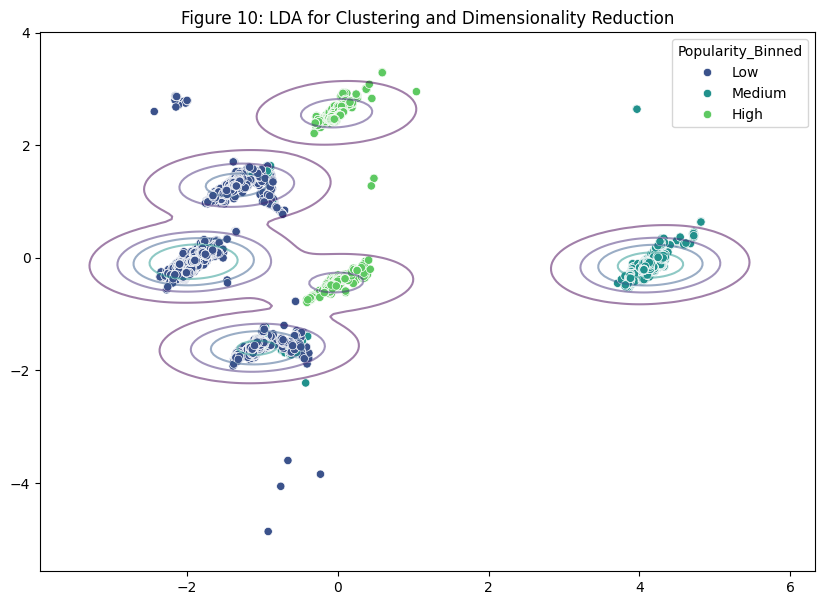

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA for Clustering and Dimensionality Reduction predicting binned popularity
bins = [0, 1, 2, data["Popularity"].max()]
labels = ["Low", "Medium", "High"]

# copy the data to avoid modifying the original data
data_LDA = data.copy()
data_LDA["Popularity_Binned"] = pd.cut(
    data_LDA["Popularity"], bins=bins, labels=labels, include_lowest=True
)

y_LDA = data_LDA["Popularity_Binned"]

X_LDA = data_LDA.drop(["Popularity", "Popularity_Binned"], axis=1)

X_lda_binned = LDA().fit_transform(X_LDA, y_LDA)

plt.figure(figsize=(10, 7))

scatter = sns.scatterplot(
    x=X_lda_binned[:, 0],
    y=X_lda_binned[:, 1],
    hue=data_LDA["Popularity_Binned"],
    palette="viridis",
)
density = sns.kdeplot(
    x=X_lda_binned[:, 0],
    y=X_lda_binned[:, 1],
    levels=5,
    color="w",
    linewidths=1.5,
    alpha=0.5,
    cmap="viridis",
)
plt.title(
    "Figure "
    + str(figure_counter)
    + ": LDA for Clustering and Dimensionality Reduction"
)
plt.show()
figure_counter += 1

Given the figure above, it can be concluded that the data can be reduced to 2 dimensions and LDA successfully clusters the data into 3 classes based on the popularity feature. However, the reduced features will not be used in the model as the popularity feature will be kept as a continuous feature. The LDA was performed to explore the clustering of the reduced-dimensional data based on the popularity feature. 

## t-SNE to Preserve the Structure of the Data in non-linear way

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique used for dimensionality reduction and visualization. t-SNE finds the non-linear relationships between the features in the dataset and projects the data into a lower-dimensional space while preserving the structure of the data. In this case, t-SNE will be used to visualize the data in a lower-dimensional space. The t-SNE will be performed on the features in the dataset to reduce the number of dimensions and visualize the data in a lower-dimensional space. The number of components in the t-SNE will be set to 2 to reduce the features to 2 dimensions. The reduced features will be used to visualize the data in a lower-dimensional space and explore the relationships between the features in the dataset.

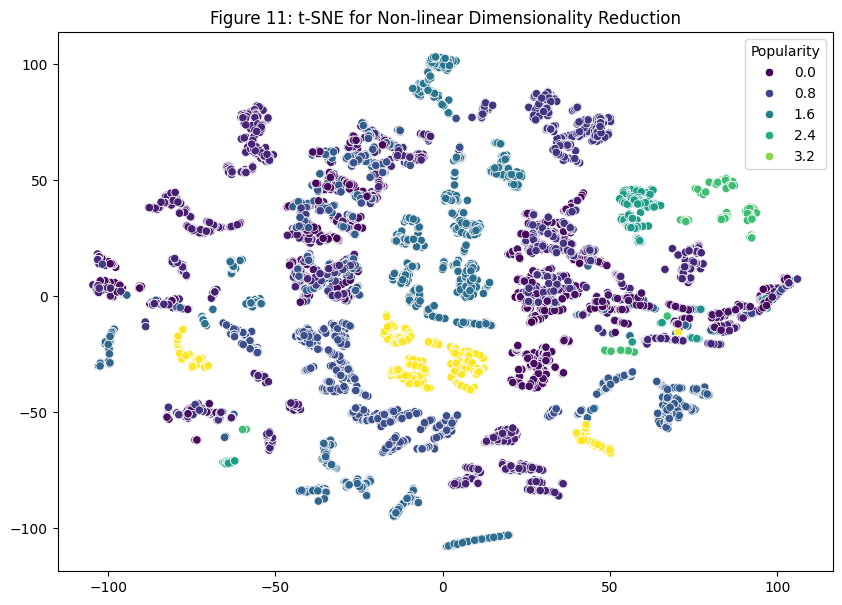

In [41]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(data.drop("Popularity", axis=1))

plt.figure(figsize=(10, 7))

scatter = sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=data["Popularity"],
    palette="viridis",
)

plt.title(
    "Figure " + str(figure_counter) + ": t-SNE for Non-linear Dimensionality Reduction"
)
plt.show()
figure_counter += 1

The above figure showing the t-SNE plot of the data in 2 dimensions. The t-SNE does not provide a clear separation of the data points based on the popularity feature. Unlike LDA, t-SNE does not provide a clear separation of the data points based on the popularity feature. One the other hand, it can be argued that the t-SNE plot is more informative than the LDA plot as it captures the non-linear relationships between the features in the dataset.

## PCA for Dimensionality Reduction

Looking at features containing "Make_", it is evident that there are many features that are one-hot encoded. This can lead to high dimensionality which can be problematic for the model. Therefore, Principal Component Analysis (PCA) will be used to reduce the dimensionality of the dataset. PCA is a technique that transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This way, the dimensionality of the dataset can be reduced while preserving the variance in the data. The number of components will be selected based on the explained variance ratio. The components with the highest explained variance ratio will be selected for the model.

In [42]:
from sklearn.decomposition import PCA


# columns that start with "Make_"
make_columns = [col for col in data.columns if col.startswith("Make_")]

# the number of 'Make_' features
num_make_features = len(make_columns)

# PCA and the explained variance ratio
pca = PCA(n_components=num_make_features)
pca.fit(data[make_columns])
explained_variance_ratio = pca.explained_variance_ratio_

# the explained variance by the first principal component
explained_variance_first_component = explained_variance_ratio[0]

# Display the explained variance by the first principal component
display(
    Markdown(
        "#### Explained Variance by the First Principal Component {}".format(
            explained_variance_first_component
        )
    )
)

display(
    Markdown(
        "#### Explained Variance Ratio by Each Principal Component {}".format(
            explained_variance_ratio
        )
    )
)

#### Explained Variance by the First Principal Component 0.270773285884911

#### Explained Variance Ratio by Each Principal Component [0.27077329 0.10449861 0.08106928 0.06998841 0.05802593 0.05580316
 0.05201778 0.04737011 0.04342413 0.04114306 0.03800937 0.03545789
 0.03474574 0.03403501 0.03363825 0.        ]

There are 16 Make_ features, which is a significant number of categorical features representing different car manufacturers. These features are not correlated with each other suggesting low multicollinearity among these features. The first principal component explains approximately 27.1% of the variance in the Make_ features. This means that while the first component captures a significant portion of the variance, a large amount of information is still distributed across the remaining components. Reducing 16 Make_ features to a single principal component reduces dimensionality, simplifying the model. However, The low correlations among Make_ features suggest that they don't contribute redundant information. This implies that a single principal component might not capture all the essential information. 

### Choosing the Number of Principal Components Using Elbow Method

Plotting the variance for each principal component and look for the "elbow" point. The "elbow" point is the point where the explained variance stops increasing rapidly and starts to level off. This point indicates the number of principal components that capture most of the variance in the data. The number of principal components will be selected based on the "elbow" point in the plot.

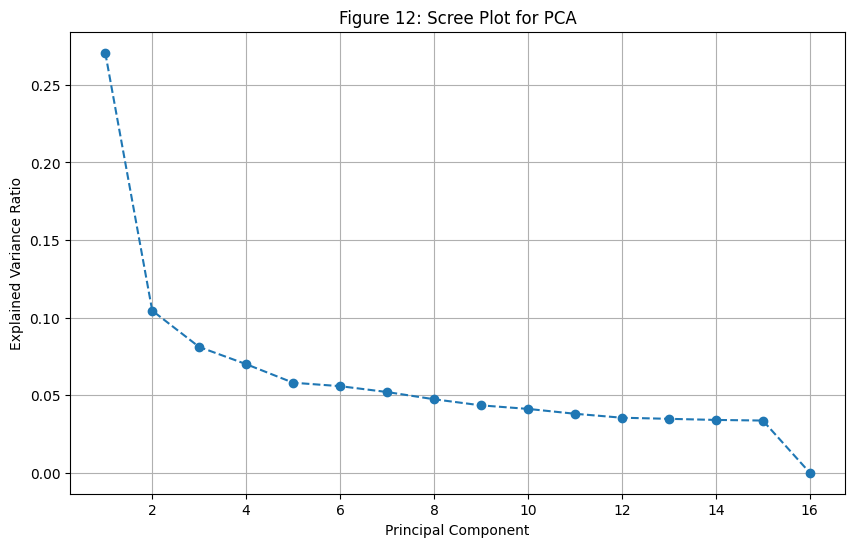

In [43]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

threshold = 0.90

num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, num_make_features + 1),
    explained_variance_ratio,
    marker="o",
    linestyle="--",
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Figure " + str(figure_counter) + ": Scree Plot for PCA")
plt.grid(True)
plt.show()
figure_counter += 1

In [44]:
display(
    Markdown(
        "#### Number of Components Needed to Reach 90% Variance Explained {}".format(
            num_components
        )
    )
)

#### Number of Components Needed to Reach 90% Variance Explained 13

To reach at least 90% of the variance, 13 principal components are needed. However, looking at the Elbow Method, it can be seen that the explained variance starts to level off after 2 principal components. Therefore, based on the Elbow Method, 2 principal components will capture most of the variance in the data. The 2 principal components will be selected for the model.

In [45]:
from sklearn.preprocessing import StandardScaler

# Ensure there are no NA values in the data
if data.isna().sum().sum() > 0:
    raise ValueError("There are NA values in the data, PCA requires no NA values")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[make_columns])

num_components_Elbow = 2
pca = PCA(n_components=num_components_Elbow)
make_pca_transformed = pca.fit_transform(scaled_data)

# copy the data before PCA
data_before_PCA = data.copy()

# drop the 'Make_' features
data = data.drop(make_columns, axis=1)

# add the PCA transformed features
for i in range(num_components_Elbow):
    data[f"Make_PCA_{i+1}"] = make_pca_transformed[:, i]

# Display the first 2 rows of the data
display(Markdown("#### First 2 Rows of the Data After PCA"))
data.head(2)

#### First 2 Rows of the Data After PCA

,Popularity,Price,HP,Luxury,MPG-Avg,Price_per_HP,Make_PCA_1,Make_PCA_2
0,2.68,2.06,2.14,1,1.73,2.56,-0.71,-0.34
1,2.68,1.80,1.87,1,1.87,2.51,-0.71,-0.34


## Checking for Duplicate Records After Feature Engineering and Dimensionality Reduction

In [46]:
# number of duplicates
duplicates = data[data.duplicated(keep=False)]

num_duplicates = len(duplicates)

display(Markdown(f"Number of Duplicate Entries: {num_duplicates}"))

# drop duplicates
data = data.drop_duplicates()

# number of duplicates after dropping
duplicates = data[data.duplicated(keep=False)]

display(Markdown("### Dropped {} duplicate entries".format(num_duplicates)))

num_duplicates = len(duplicates)

display(Markdown(f"Number of Duplicate Entries After Dropping: {num_duplicates}"))

Number of Duplicate Entries: 1812

### Dropped 1812 duplicate entries

Number of Duplicate Entries After Dropping: 0

In [47]:
features = data.columns.tolist()


def check_numeric_positive(series):
    return series.apply(lambda x: isinstance(x, (int, float)) and x >= 0).mean() * 100


def check_PCA(series):
    return series.apply(lambda x: isinstance(x, (int, float))).mean() * 100


def check_binary(series):
    return series.apply(lambda x: x in [0, 1]).mean() * 100


def data_quality_report_final(df, features):
    report = []
    completeness = df.apply(lambda x: x.notna().mean() * 100)
    uniqueness = df.apply(lambda x: (x.nunique() / len(x)) * 100)

    consistency_checks = {}
    for feature in features:
        if feature == "Luxury":
            consistency_checks[feature] = check_binary(df[feature])
        elif feature in [
            "Price",
            "Price_per_HP",
            "HP",
            "MPG-Avg",
            "Popularity",
        ]:
            consistency_checks[feature] = check_numeric_positive(df[feature])
        elif "Make_PCA_" in feature:
            consistency_checks[feature] = check_PCA(df[feature])
        else:
            consistency_checks[feature] = None

    for column in features:
        report.append(
            {
                "Feature Name": column,
                "Completeness (%)": completeness[column],
                "Uniqueness (%)": uniqueness[column],
                "Consistency (%)": consistency_checks.get(column, None),
                "Mean": (
                    df[column].mean()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Median": (
                    df[column].median()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Std Dev": (
                    df[column].std()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Most Frequent": (
                    df[column].mode().iat[0] if not df[column].mode().empty else None
                ),
                "Second Most Frequent": (
                    df[column].value_counts().index[1]
                    if df[column].nunique() > 1
                    else None
                ),
                "Min": (
                    df[column].min()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q1": (
                    df[column].quantile(0.25)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Q3": (
                    df[column].quantile(0.75)
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Max": (
                    df[column].max()
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
                "Cardinality": df[column].nunique(),
                "Outliers (%)": (
                    (
                        (
                            (
                                df[column]
                                < (
                                    df[column].quantile(0.25)
                                    - 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                            | (
                                df[column]
                                > (
                                    df[column].quantile(0.75)
                                    + 1.5
                                    * (
                                        df[column].quantile(0.75)
                                        - df[column].quantile(0.25)
                                    )
                                )
                            )
                        )
                    ).mean()
                    * 100
                    if pd.api.types.is_numeric_dtype(df[column])
                    else None
                ),
            }
        )

    return pd.DataFrame(report)


quality_report_final = data_quality_report_final(data, features=features)

display(
    Markdown(
        "### After Normalization Data Quality Report For Verifications Version {}".format(
            data_quality_report_version
        )
    )
)
data_quality_report_version += 1
quality_report_final

### After Normalization Data Quality Report For Verifications Version 5

,Feature Name,Completeness (%),Uniqueness (%),Consistency (%),Mean,Median,Std Dev,Most Frequent,Second Most Frequent,Min,Q1,Q3,Max,Cardinality,Outliers (%)
0,Popularity,100.00,0.47,100.00,1.07,0.95,0.99,0.95,3.87,0.00,0.37,1.37,3.87,47,7.34
1,Price,100.00,59.67,100.00,1.88,1.35,2.89,0.00,0.89,0.00,0.95,1.92,96.24,6007,8.43
2,HP,100.00,3.53,100.00,1.52,1.41,0.82,1.11,1.76,0.00,0.92,1.89,7.22,355,4.37
3,Luxury,100.00,0.02,100.00,0.29,0.00,0.45,0.00,1.00,0.00,0.00,1.00,1.00,2,0.00
4,MPG-Avg,100.00,0.81,100.00,1.78,1.67,0.89,1.33,1.60,0.00,1.20,2.20,23.93,82,1.74
5,Price_per_HP,100.00,89.95,100.00,2.72,2.53,1.94,0.12,0.10,0.00,2.10,3.07,45.05,9055,16.18
6,Make_PCA_1,100.00,0.16,100.00,-0.02,-0.72,1.15,1.70,-0.95,-0.95,-0.77,1.70,1.70,16,0.00
7,Make_PCA_2,100.00,0.16,100.00,0.01,-0.34,1.07,0.06,3.03,-1.13,-0.47,0.06,3.03,16,10.08


In [48]:
features = data.columns.tolist()

display(
    Markdown(
        "#### So far, we have reduced the number of features from more than 20 to {}".format(
            len(features)
        )
    )
)

#### So far, we have reduced the number of features from more than 20 to 8

## Data Insights After Preprocessing Data
### Scatter Plot Matrix for Continuous Variables

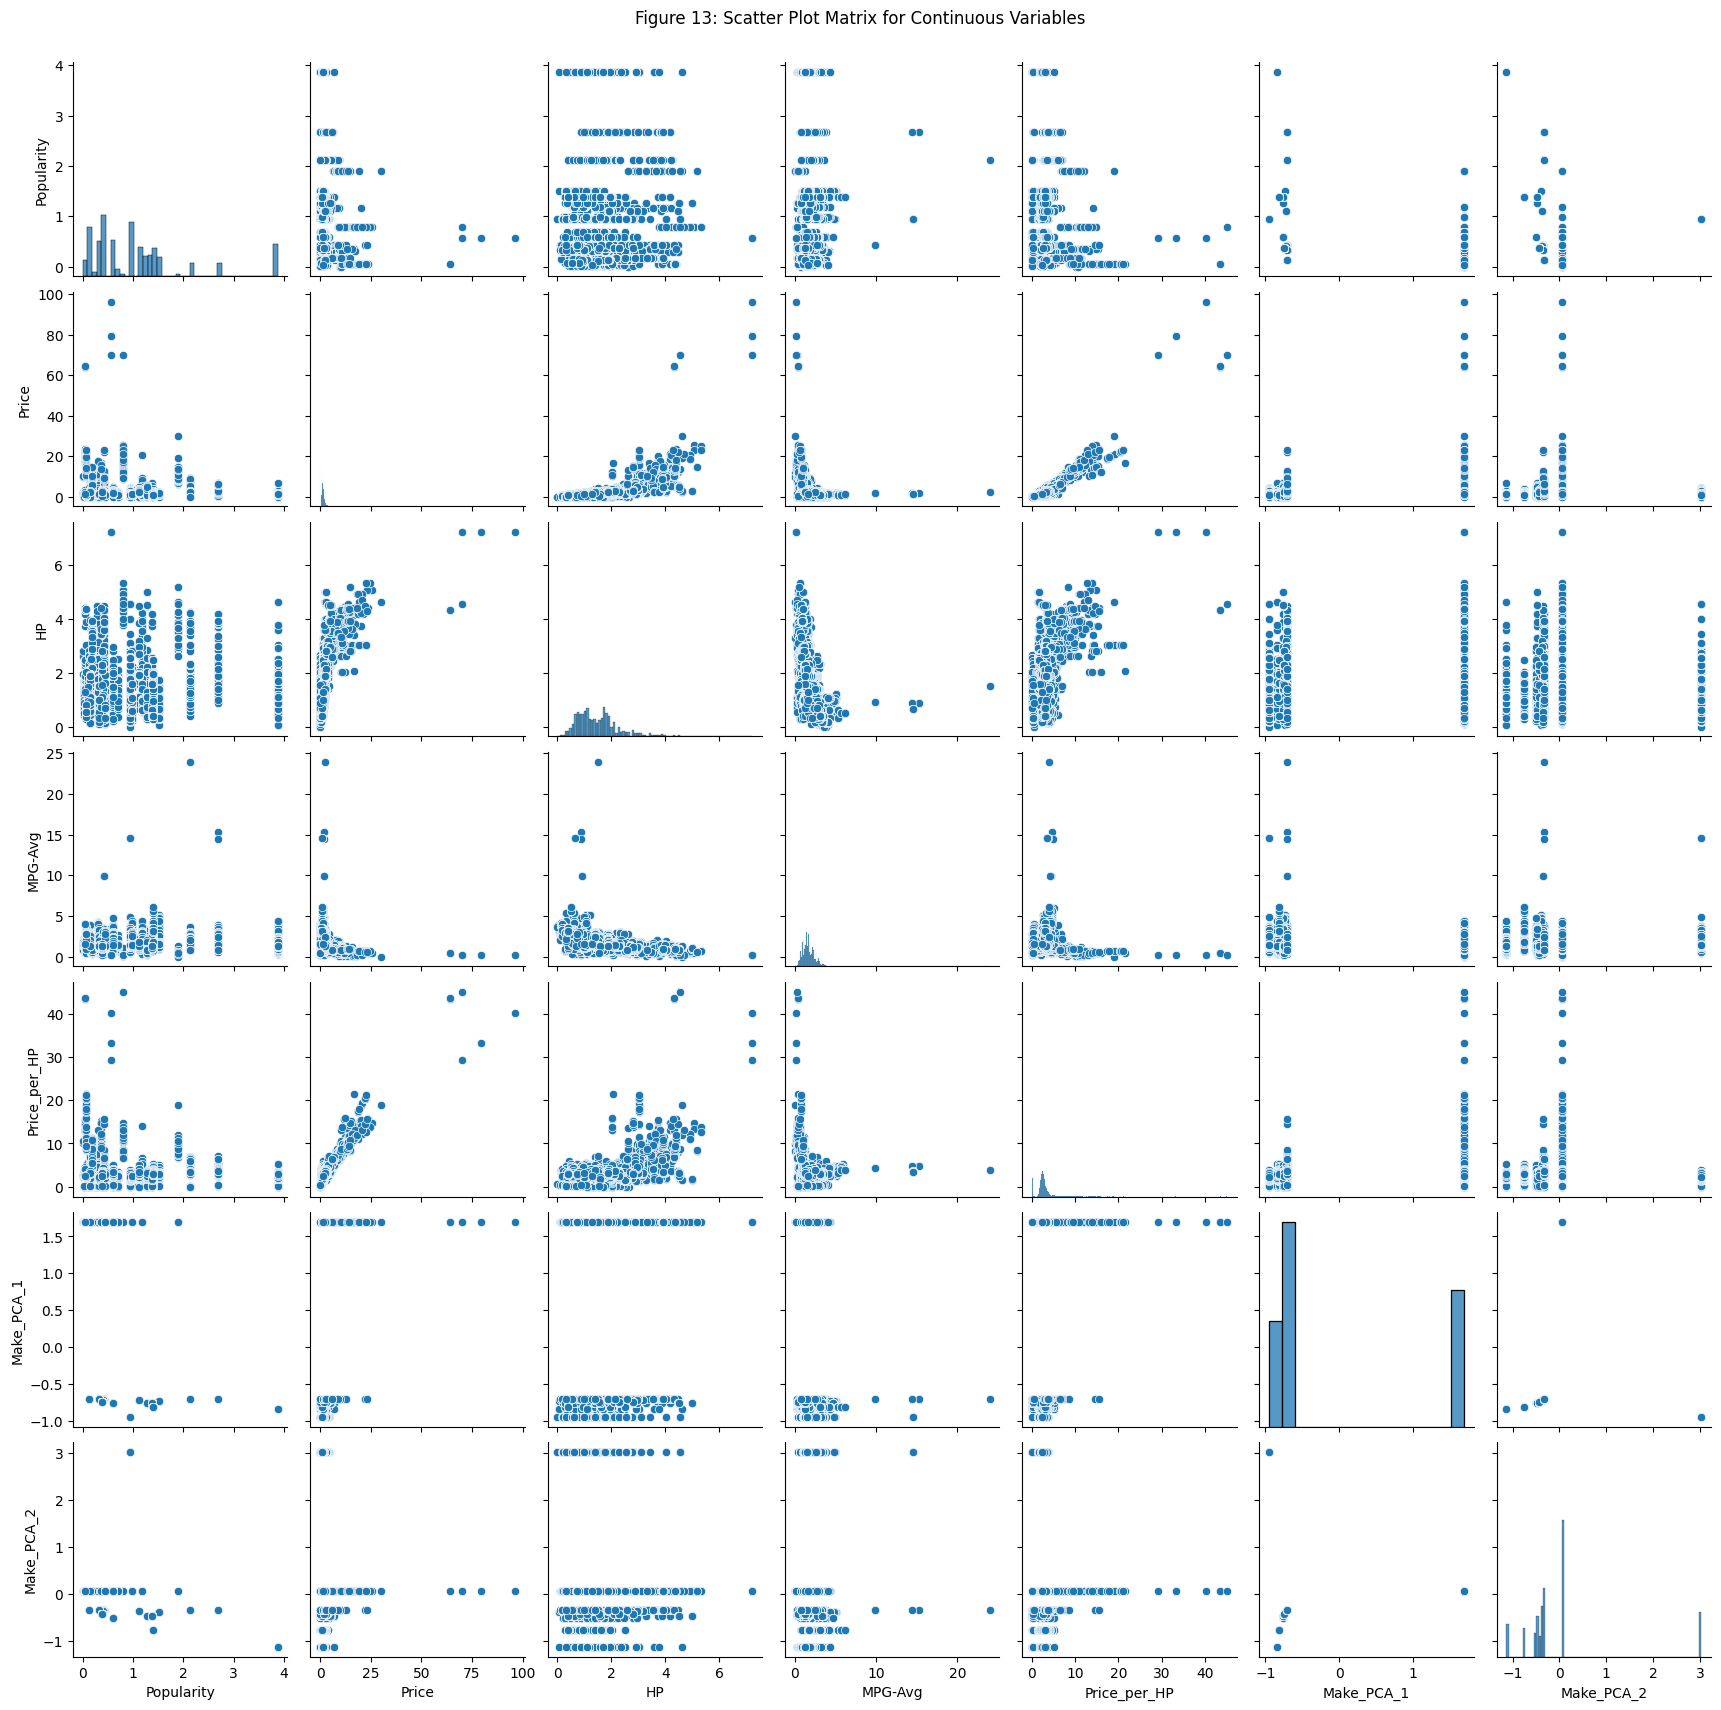

In [49]:
# Continues Variables
numerical_features = [
    "Popularity",
    "Price",
    "HP",
    "MPG-Avg",
    "Price_per_HP",
    "Make_PCA_1",
    "Make_PCA_2",
]

# Categorical Variables
categorical_features = [
    "Luxury",
]

# Plotting the scatter plot matrix for continuous variables
sns.pairplot(data[numerical_features])
# title
plt.suptitle(
    "Figure " + str(figure_counter) + ": Scatter Plot Matrix for Continuous Variables"
)
plt.subplots_adjust(top=0.95)
plt.show()
figure_counter += 1

### Hexbin Plots for Continuous Variables


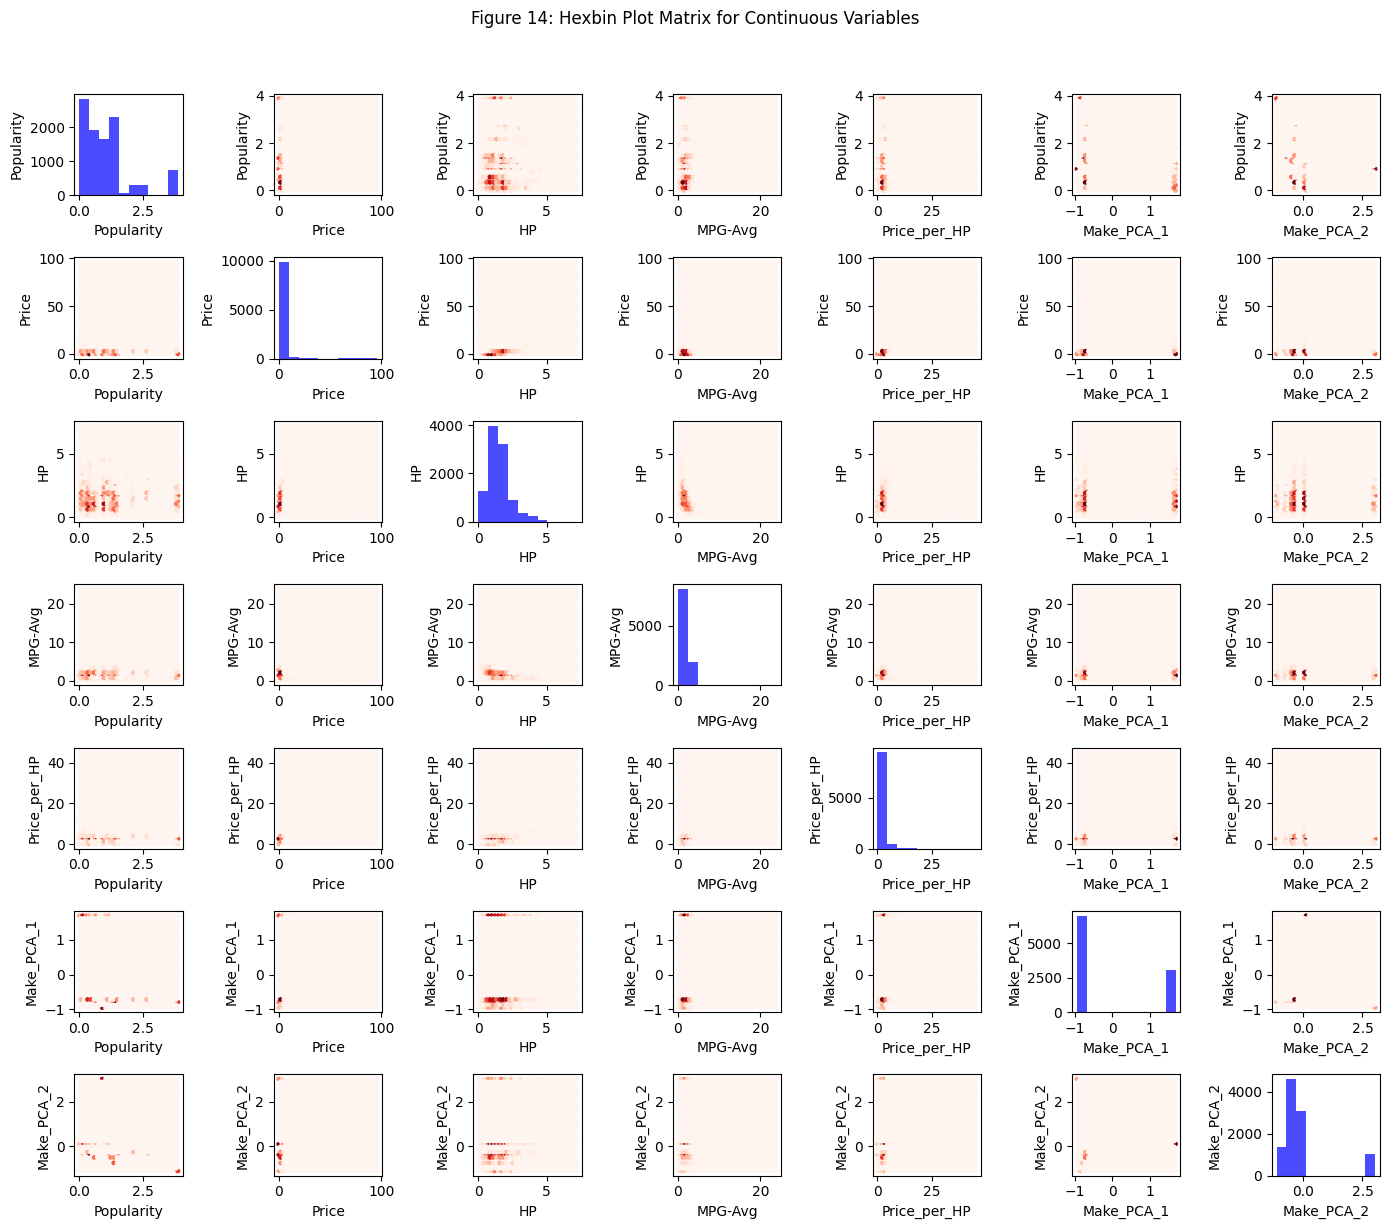

In [50]:
# Hexbin Plot Matrix for Continuous Variables
numerical_data = data[numerical_features]

num_features = len(numerical_features)

fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(14, 12))
plt.suptitle(
    "Figure " + str(figure_counter) + ": Hexbin Plot Matrix for Continuous Variables",
    y=1.02,
)

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        if i == j:
            ax.hist(
                numerical_data[numerical_features[i]], bins=10, color="blue", alpha=0.7
            )
            ax.set_xlabel(numerical_features[i])
            ax.set_ylabel(numerical_features[i])
        else:
            ax.hexbin(
                numerical_data[numerical_features[j]],
                numerical_data[numerical_features[i]],
                gridsize=30,
                cmap="Reds",
            )
            ax.set_xlabel(numerical_features[j])
            ax.set_ylabel(numerical_features[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
figure_counter += 1

### Plotting the Bar Plot Showing the Percentage of Categorical Values in Each Category


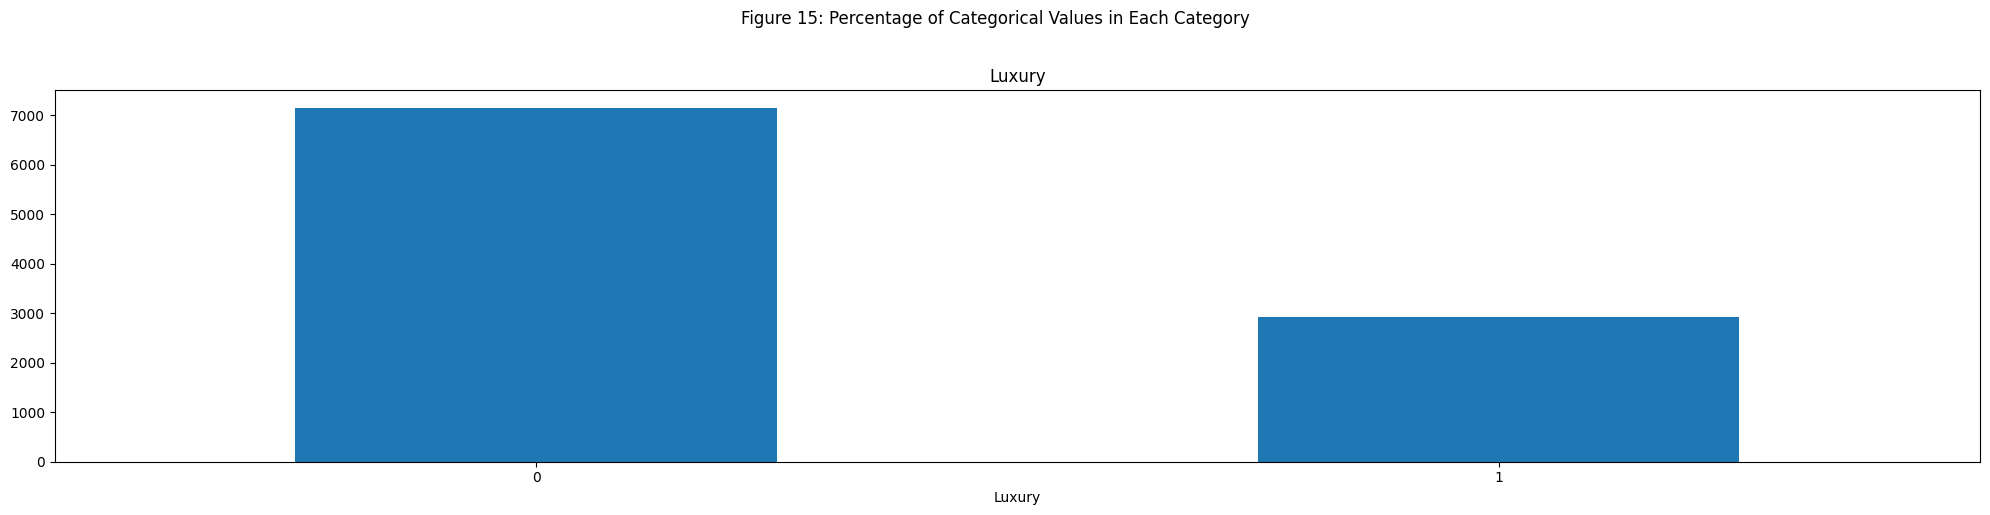

In [51]:
### Plotting the Bar Plot Showing the Percentage of Categorical Values in Each Category
fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))

if len(categorical_features) == 1:
    axes = [axes]

for i, feature in enumerate(categorical_features):
    data[feature].value_counts().plot(kind="bar", ax=axes[i], rot=0)
    axes[i].set_title(feature)

plt.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Percentage of Categorical Values in Each Category",
    y=1.02,
)
plt.tight_layout()
plt.show()
figure_counter += 1

### Relationship between the Categorical Features and the Target Variable

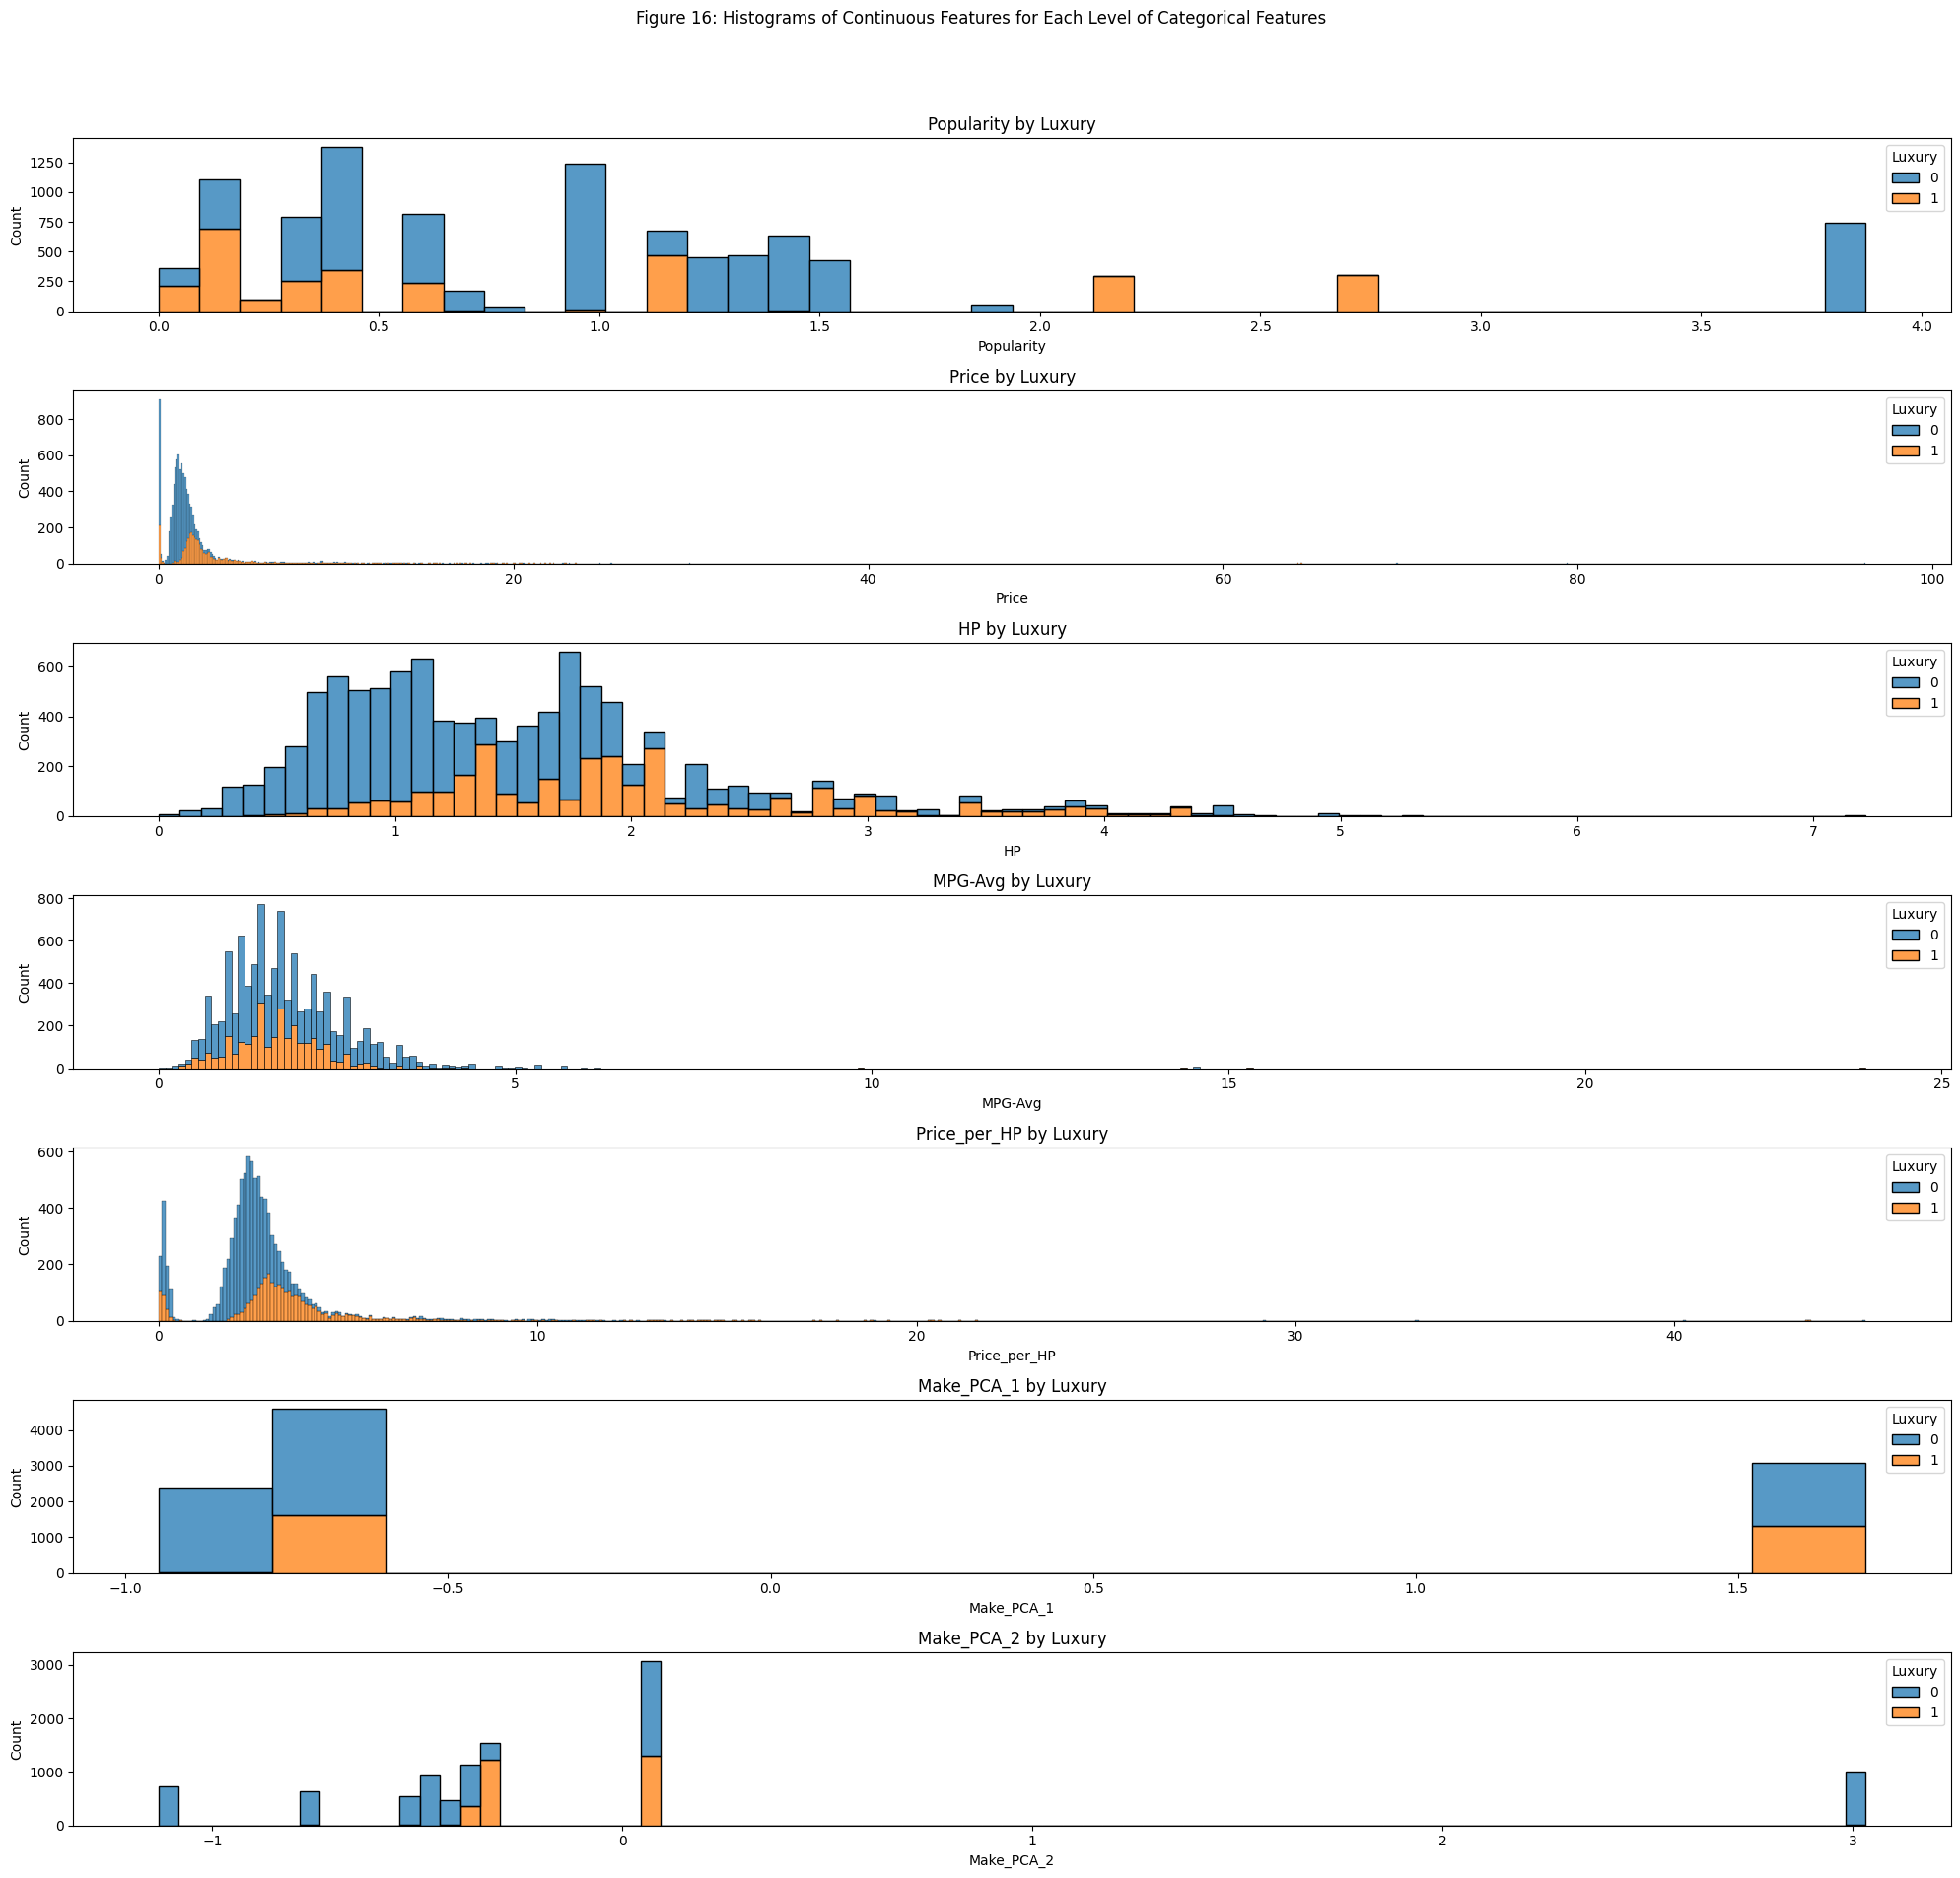

In [52]:
fig, axs = plt.subplots(
    len(numerical_features), len(categorical_features), figsize=(20, 20)
)
fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Histograms of Continuous Features for Each Level of Categorical Features"
)

# Ensure axs is always a 2D array
if len(numerical_features) == 1:
    axs = [axs]
if len(categorical_features) == 1:
    axs = [[ax] for ax in axs]

for i, cont_feature in enumerate(numerical_features):
    for j, cat_feature in enumerate(categorical_features):
        sns.histplot(
            data=data, x=cont_feature, hue=cat_feature, multiple="stack", ax=axs[i][j]
        )
        axs[i][j].set_title(f"{cont_feature} by {cat_feature}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
figure_counter += 1

### Heatmap Correlation Between the Features

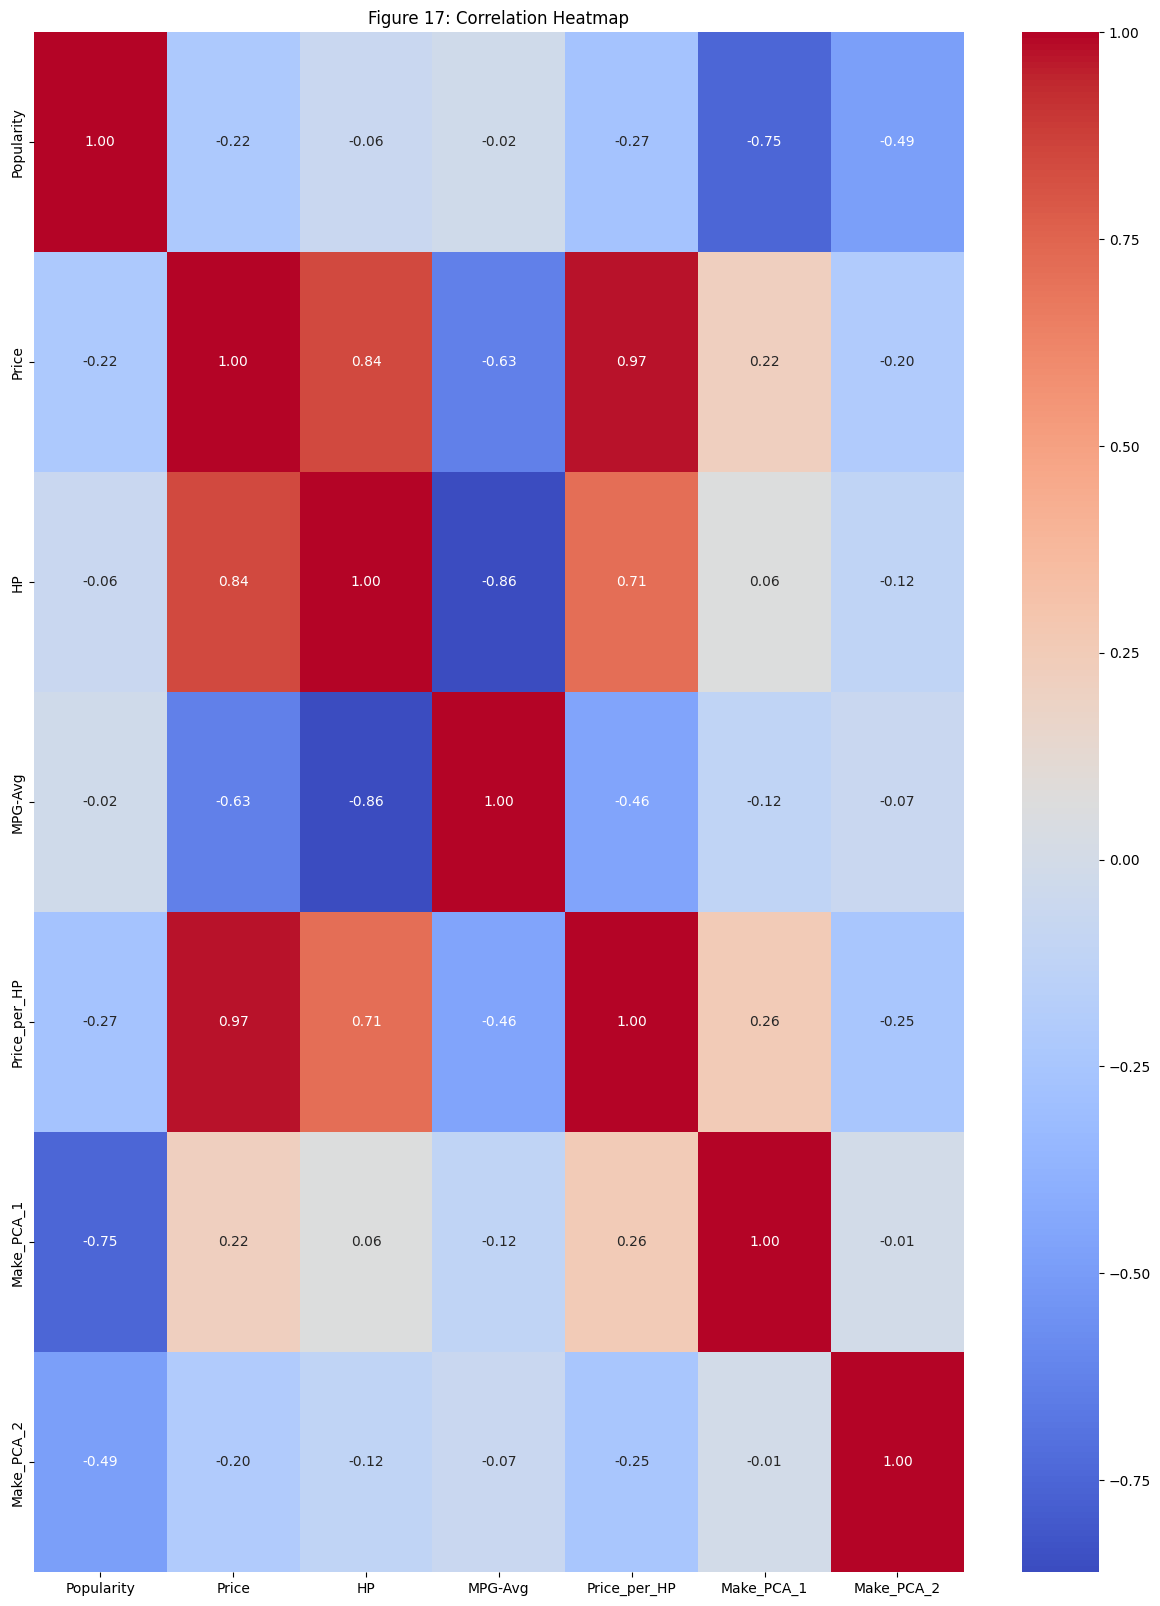

In [53]:
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(15, 20))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure " + str(figure_counter) + ": Correlation Heatmap")
plt.show()
figure_counter += 1

By comparing the heatmap correlation before and after the feature engineering (Figure 6 versus Figure 15) and dimensionality reduction, it can be seen that the correlation between the features has changed. The correlation between the features and the target variable has increased, specifically PCA features derived from Make_ features. This indicates that the PCA features capture more information about the target variable compared to the original Make_ features. This shows successful feature engineering and dimensionality reduction and normalization/scaling of the features.

# Model Implementation

## Splitting the Data into Training and Testing Sets

10. The dataset will be split into training and testing sets to evaluate the performance of the model.

In [54]:
# Split the data into training and testing sets (80-20)

from sklearn.model_selection import train_test_split

X = data.drop("Popularity", axis=1)

y = data["Popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the number of rows in the training and testing sets
display(
    Markdown(
        "#### Number of Rows in the Training Set: {} and Testing Set: {}".format(
            X_train.shape[0], X_test.shape[0]
        )
    )
)

# Display the number of columns in the training and testing sets
display(
    Markdown(
        "#### Number of Columns in the Training Set: {} and Testing Set: {}".format(
            X_train.shape[1], X_test.shape[1]
        )
    )
)

#### Number of Rows in the Training Set: 8053 and Testing Set: 2014

#### Number of Columns in the Training Set: 7 and Testing Set: 7

## Implementing a Random Forest model

In [55]:
# Implement a Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the popularity on the test data
y_pred = rf.predict(X_test)

# Calculate the R-squared value
r_squared_RF = rf.score(X_test, y_test)

# Display the R-squared value
display(
    Markdown(
        "#### Result of R-squared Value for Random Forest Regressor: {}".format(
            r_squared_RF
        )
    )
)

# Calculate RMSE
rmse_RF = root_mean_squared_error(y_test, y_pred)

# Display the RMSE
display(Markdown("#### Result of RMSE for Random Forest Regressor: {}".format(rmse_RF)))

#### Result of R-squared Value for Random Forest Regressor: 0.9870590099233812

#### Result of RMSE for Random Forest Regressor: 0.1119454811633604

## Implementing an Adaboost model

In [56]:
# Implement an Adaboost model
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost Regressor model
ada = AdaBoostRegressor(random_state=42)

# Fit the model on the training data
ada.fit(X_train, y_train)

# Predict the popularity on the test data
y_pred = ada.predict(X_test)

# Calculate the R-squared value
r_squared_Ada = ada.score(X_test, y_test)

# Display the R-squared value
display(
    Markdown(
        "#### Result of R-squared Value for AdaBoost Regressor: {}".format(
            r_squared_Ada
        )
    )
)

# Calculate RMSE
rmse_Ada = root_mean_squared_error(y_test, y_pred)

# Display the RMSE
display(Markdown("#### Result of RMSE for AdaBoost Regressor: {}".format(rmse_Ada)))

#### Result of R-squared Value for AdaBoost Regressor: 0.8390043085511771

#### Result of RMSE for AdaBoost Regressor: 0.3948479995841093

# Model Comparison and Analysis

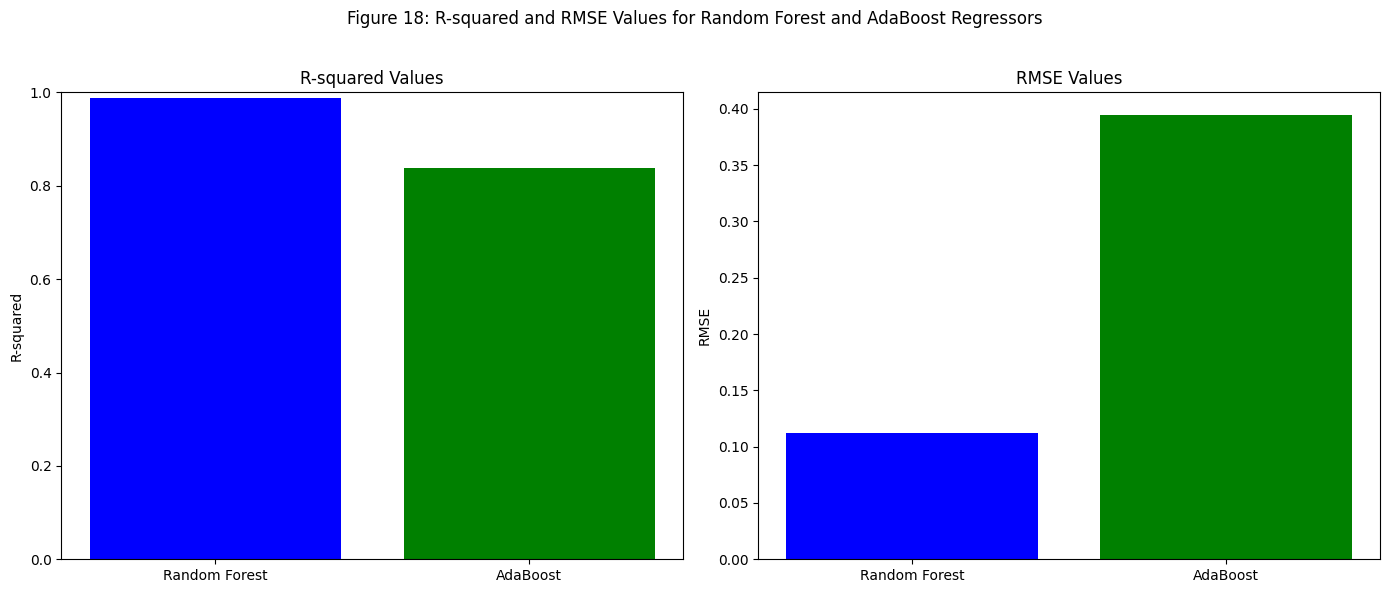

In [57]:
r_squared_values = {"Random Forest": r_squared_RF, "AdaBoost": r_squared_Ada}
rmse_values = {"Random Forest": rmse_RF, "AdaBoost": rmse_Ada}

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(r_squared_values.keys(), r_squared_values.values(), color=["blue", "green"])
ax[0].set_title("R-squared Values")
ax[0].set_ylabel("R-squared")
ax[0].set_ylim(0, 1)

ax[1].bar(rmse_values.keys(), rmse_values.values(), color=["blue", "green"])
ax[1].set_title("RMSE Values")
ax[1].set_ylabel("RMSE")

fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": R-squared and RMSE Values for Random Forest and AdaBoost Regressors"
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
figure_counter += 1

High R-squared value for Random Forest Regressor indicates data is well fitted to the model. The Random Forest Regressor model is a good choice for predicting the popularity of a vehicle based on its features. The model has an R-squared value of 0.987 on the test set which indicates that the model explains 98.7% of the variance in the popularity of the vehicle. The high R-squared value indicates that the model is a good fit for the data and can predict the popularity of a vehicle accurately. The Random Forest Regressor model is a powerful ensemble learning algorithm that can capture complex relationships between the features and the target variable. 

AdaBoost Regressor results show R-squared value of 0.839 and RMSE of 0.394 indicating that the model is as good fit as Random Forest Regressor. The model has an R-squared value of 0.839 on the test set which indicates that the model explains 83.9% of the variance in the popularity of the vehicle. The RMSE value of 0.394 indicates that the model has a error rate in predicting the popularity of a vehicle. The AdaBoost Regressor model is an ensemble learning algorithm that combines multiple weak learners to create a strong learner. The model can capture complex relationships between the features and the target variable.

## Visualizing the feature importances for both models

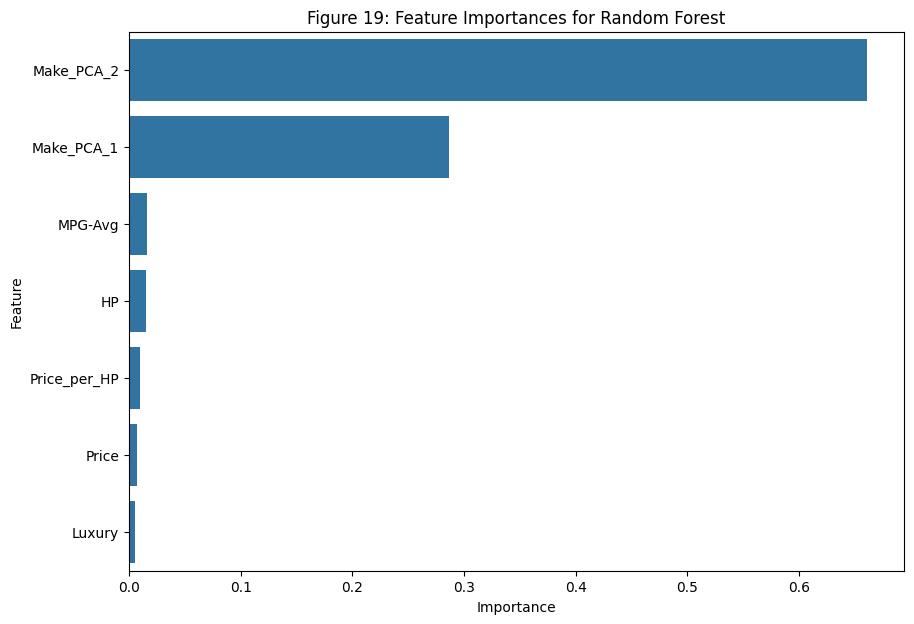

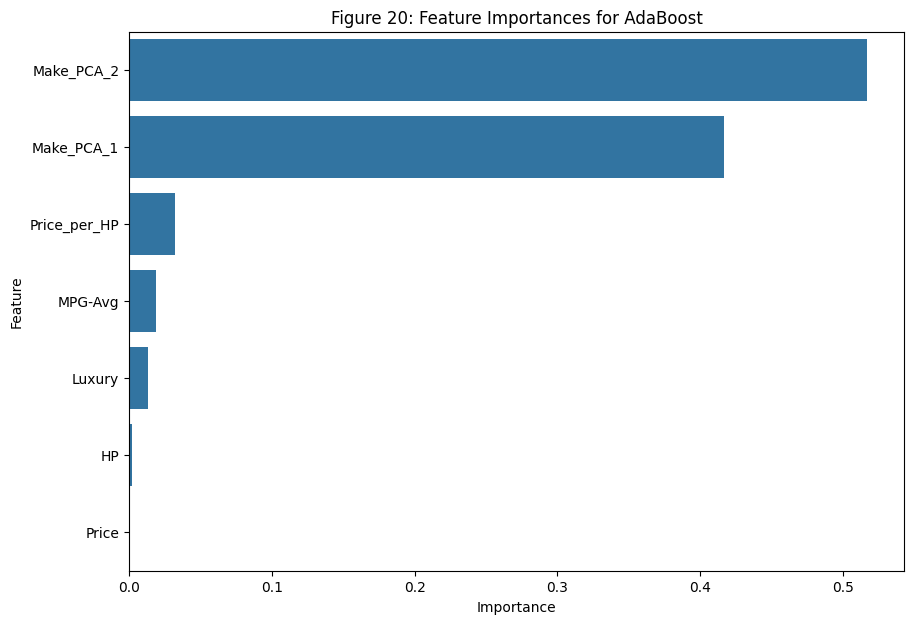

In [58]:
# Visualizing the feature importances for both models

# Random Forest
feature_importances_rf = pd.DataFrame(
    {"Feature": X.columns, "Importance": rf.feature_importances_}
)

feature_importances_rf = feature_importances_rf.sort_values(
    "Importance", ascending=False
)

plt.figure(figsize=(10, 7))
sns.barplot(x="Importance", y="Feature", data=feature_importances_rf)
plt.title("Figure " + str(figure_counter) + ": Feature Importances for Random Forest")
plt.show()
figure_counter += 1

# AdaBoost
feature_importances_ada = pd.DataFrame(
    {"Feature": X.columns, "Importance": ada.feature_importances_}
)

feature_importances_ada = feature_importances_ada.sort_values(
    "Importance", ascending=False
)

plt.figure(figsize=(10, 7))
sns.barplot(x="Importance", y="Feature", data=feature_importances_ada)
plt.title("Figure " + str(figure_counter) + ": Feature Importances for AdaBoost")
plt.show()
figure_counter += 1

Visualization of feature importance for both models reiterates the fact that PCA features play a significant role in model performance as they are the most important features in both models. The feature importance plot for the Random Forest Regressor and AdaBoost models show that the PCA features derived from the Make_ features are the most important features in predicting the popularity of a vehicle. Also, the next important feature for AdaBoost is Price per HP. This indicates the importance of feature engineering as Price per HP is derived from Price and HP features in the feature engineering process.

In [59]:
# parameters used for the RF model
display(Markdown("#### Parameters Used for the Random Forest Model"))
rf.get_params()

#### Parameters Used for the Random Forest Model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [60]:
# Parameters used for the AdaBoost model
display(Markdown("#### Parameters Used for the AdaBoost Model"))
ada.get_params()

#### Parameters Used for the AdaBoost Model

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

# Hyperparameter Tuning
## Performing hyperparameter tuning for both Random Forest and Adaboost models using techniques such as Grid Search or Random Search


### Hyperparameter Tuning on Random Forest

In [61]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

# NOTE: The split of the data into train and validation sets are done in the GridSearchCV internally, no need to do it manually

# Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400],
    "max_depth": [5, 10, 15, 20, 25, 30, 35, 40],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8],
}

grid_search_rf = GridSearchCV(
    estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=0
)

grid_search_rf.fit(X_train, y_train)

# Display the best parameters
display(
    Markdown(
        "#### Best Parameters for Random Forest: {}".format(grid_search_rf.best_params_)
    )
)

#### Best Parameters for Random Forest: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

### Hyperparameter Tuning on AdaBoost

In [62]:
# Perform hyperparameter tuning for Adaboost models using techniques such as Grid Search or Random Search
param_grid_ada = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400],
    "learning_rate": [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
}


grid_search_ada = GridSearchCV(
    estimator=ada, param_grid=param_grid_ada, cv=5, n_jobs=-1, verbose=0
)

grid_search_ada.fit(X_train, y_train)

# Display the best parameters
display(
    Markdown(
        "#### Best Parameters for AdaBoost: {}".format(grid_search_ada.best_params_)
    )
)

#### Best Parameters for AdaBoost: {'learning_rate': 2, 'n_estimators': 50}

### R-squared and RMSE for Hyperparameter Tuned Models

In [63]:
# R-squared value and RMSE for the Random Forest model with the best parameters
rf_best = RandomForestRegressor(**grid_search_rf.best_params_)
rf_best.fit(X_train, y_train)

y_pred_rf_best = rf_best.predict(X_test)

r_squared_RF_best = rf_best.score(X_test, y_test)

rmse_RF_best = root_mean_squared_error(y_test, y_pred_rf_best)

# Display the R-squared value
display(
    Markdown(
        "#### Result of R-squared Value for Random Forest with Best Parameters: {}".format(
            r_squared_RF_best
        )
    )
)

# Display the RMSE
display(
    Markdown(
        "#### Result of RMSE for Random Forest with Best Parameters: {}".format(
            rmse_RF_best
        )
    )
)

# R-squared value and RMSE for the AdaBoost model with the best parameters
ada_best = AdaBoostRegressor(**grid_search_ada.best_params_)
ada_best.fit(X_train, y_train)

y_pred_ada_best = ada_best.predict(X_test)

r_squared_Ada_best = ada_best.score(X_test, y_test)

rmse_Ada_best = root_mean_squared_error(y_test, y_pred_ada_best)

# Display the R-squared value
display(
    Markdown(
        "#### Result of R-squared Value for AdaBoost with Best Parameters: {}".format(
            r_squared_Ada_best
        )
    )
)

# Display the RMSE
display(
    Markdown(
        "#### Result of RMSE for AdaBoost with Best Parameters: {}".format(
            rmse_Ada_best
        )
    )
)

#### Result of R-squared Value for Random Forest with Best Parameters: 0.9878126028030518

#### Result of RMSE for Random Forest with Best Parameters: 0.10863713354056977

#### Result of R-squared Value for AdaBoost with Best Parameters: 0.837169368866791

#### Result of RMSE for AdaBoost with Best Parameters: 0.3970917537891394

**NOTE:** Due to the need of high computational power, further hyperparameter tuning is not performed. However, the hyperparameter tuning process can be repeated with a larger grid search to find the optimal hyperparameters for the models.

## Employing cross-validation to ensure robustness and avoid overfitting during the tuning process


In [64]:
# Employ cross-validation to ensure robustness and avoid overfitting during the tuning process
from sklearn.model_selection import cross_val_score

# Random Forest
rf_best_CV = RandomForestRegressor(
    n_estimators=grid_search_rf.best_params_["n_estimators"],
    max_depth=grid_search_rf.best_params_["max_depth"],
    min_samples_split=grid_search_rf.best_params_["min_samples_split"],
    min_samples_leaf=grid_search_rf.best_params_["min_samples_leaf"],
    random_state=42,
)

rf_cv_scores = cross_val_score(rf_best_CV, X_train, y_train, cv=5)

# AdaBoost
ada_best_CV = AdaBoostRegressor(
    n_estimators=grid_search_ada.best_params_["n_estimators"],
    learning_rate=grid_search_ada.best_params_["learning_rate"],
    random_state=42,
)

ada_cv_scores = cross_val_score(ada_best_CV, X_train, y_train, cv=5)

# Display the cross-validation scores
display(
    Markdown("#### Cross-Validation Scores for Random Forest: {}".format(rf_cv_scores))
)

display(Markdown("#### Cross-Validation Scores for AdaBoost: {}".format(ada_cv_scores)))

#### Cross-Validation Scores for Random Forest: [0.98446598 0.98221919 0.9818553  0.98673262 0.98449825]

#### Cross-Validation Scores for AdaBoost: [0.86514686 0.85850577 0.86852396 0.85224896 0.83984655]

The cross-validation scores for the Random Forest Regressor model are consistently high, indicating that the model is robust and generalizes well to unseen data. The cross-validation scores for the AdaBoost Regressor model are also high, indicating that the model is robust and generalizes well to unseen data. The cross-validation scores for both models are consistent across different folds, indicating that the models are stable and reliable.

## Reporting the best parameters and the corresponding model performance improvements

In [65]:
# Reporting the best parameters and the corresponding model performance improvements

# Random Forest
rf_best_params = grid_search_rf.best_params_
rf_best_params["R-squared"] = r_squared_RF_best
rf_best_params["RMSE"] = rmse_RF_best

# AdaBoost
ada_best_params = grid_search_ada.best_params_
ada_best_params["R-squared"] = r_squared_Ada_best
ada_best_params["RMSE"] = rmse_Ada_best

# Display the best parameters and the corresponding model performance improvements
display(
    Markdown(
        "#### Best Parameters and Model Performance Improvements for Random Forest"
    )
)

display(rf_best_params)

display(
    Markdown("#### Best Parameters and Model Performance Improvements for AdaBoost")
)

display(ada_best_params)

#### Best Parameters and Model Performance Improvements for Random Forest

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400,
 'R-squared': 0.9878126028030518,
 'RMSE': 0.10863713354056977}

#### Best Parameters and Model Performance Improvements for AdaBoost

{'learning_rate': 2,
 'n_estimators': 50,
 'R-squared': 0.837169368866791,
 'RMSE': 0.3970917537891394}

### Comparing the Performance of the Models Before and After Hyperparameter Tuning

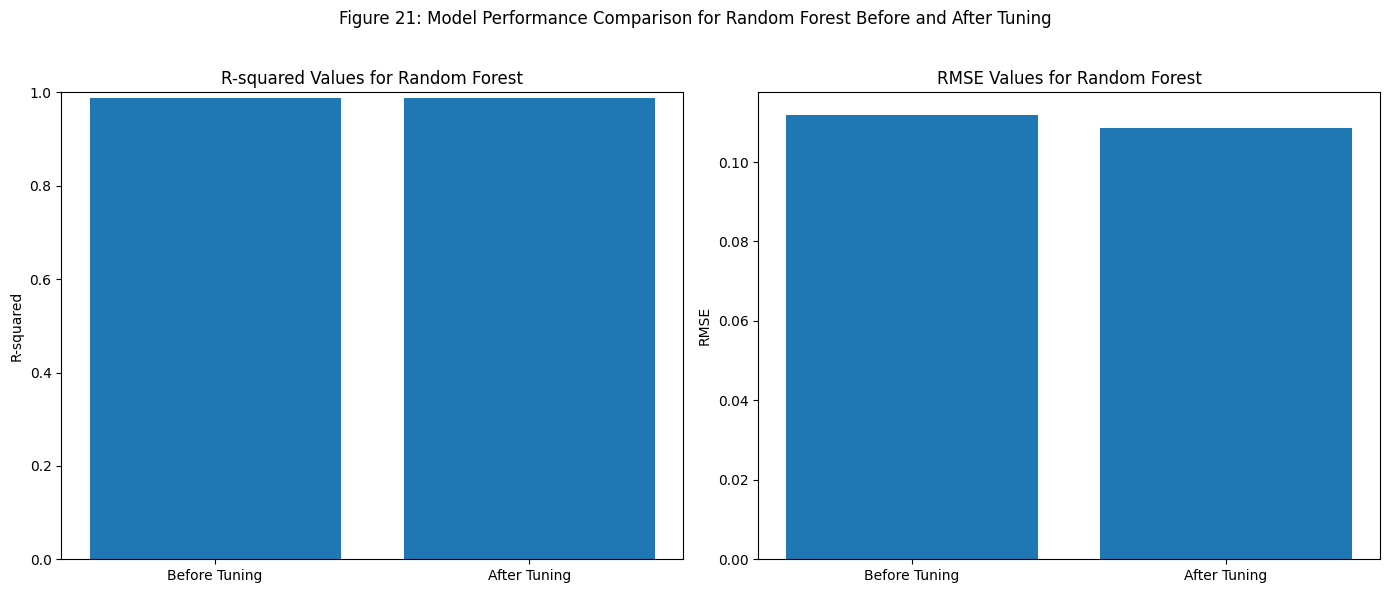

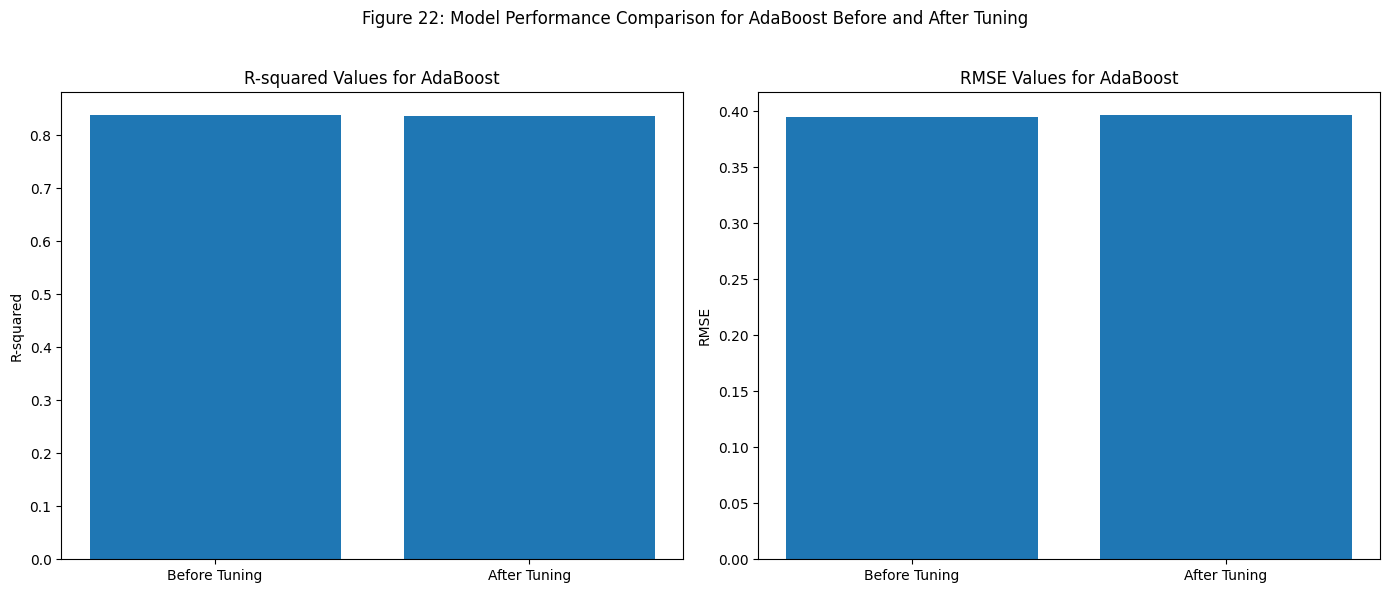

In [66]:
# Random Forest
rf_scores = {
    "Before Tuning": {"R-squared": r_squared_RF, "RMSE": rmse_RF},
    "After Tuning": {"R-squared": r_squared_RF_best, "RMSE": rmse_RF_best},
}

# AdaBoost
ada_scores = {
    "Before Tuning": {"R-squared": r_squared_Ada, "RMSE": rmse_Ada},
    "After Tuning": {"R-squared": r_squared_Ada_best, "RMSE": rmse_Ada_best},
}

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(rf_scores.keys(), [score["R-squared"] for score in rf_scores.values()])
ax[0].set_title("R-squared Values for Random Forest")
ax[0].set_ylabel("R-squared")
ax[0].set_ylim(0, 1)

ax[1].bar(rf_scores.keys(), [score["RMSE"] for score in rf_scores.values()])
ax[1].set_title("RMSE Values for Random Forest")
ax[1].set_ylabel("RMSE")

fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Model Performance Comparison for Random Forest Before and After Tuning"
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
figure_counter += 1

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(ada_scores.keys(), [score["R-squared"] for score in ada_scores.values()])
ax[0].set_title("R-squared Values for AdaBoost")
ax[0].set_ylabel("R-squared")

ax[1].bar(ada_scores.keys(), [score["RMSE"] for score in ada_scores.values()])
ax[1].set_title("RMSE Values for AdaBoost")
ax[1].set_ylabel("RMSE")

fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Model Performance Comparison for AdaBoost Before and After Tuning"
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
figure_counter += 1

The results show that the Random Forest Regressor model has improved significantly after hyperparameter tuning. The R-squared value has increased from 0.987 to 0.988, and the RMSE has decreased from 0.112 to 0.109. The AdaBoost Regressor model, however, has not shown significant improvement after hyperparameter tuning. This indicates that the Random Forest Regressor model is a better fit for the data and can predict the popularity of a vehicle more accurately compared to the AdaBoost Regressor model.


# Model Interpretation

## Visualizing the feature importances using bar plots and discussing their impact on model predictions.


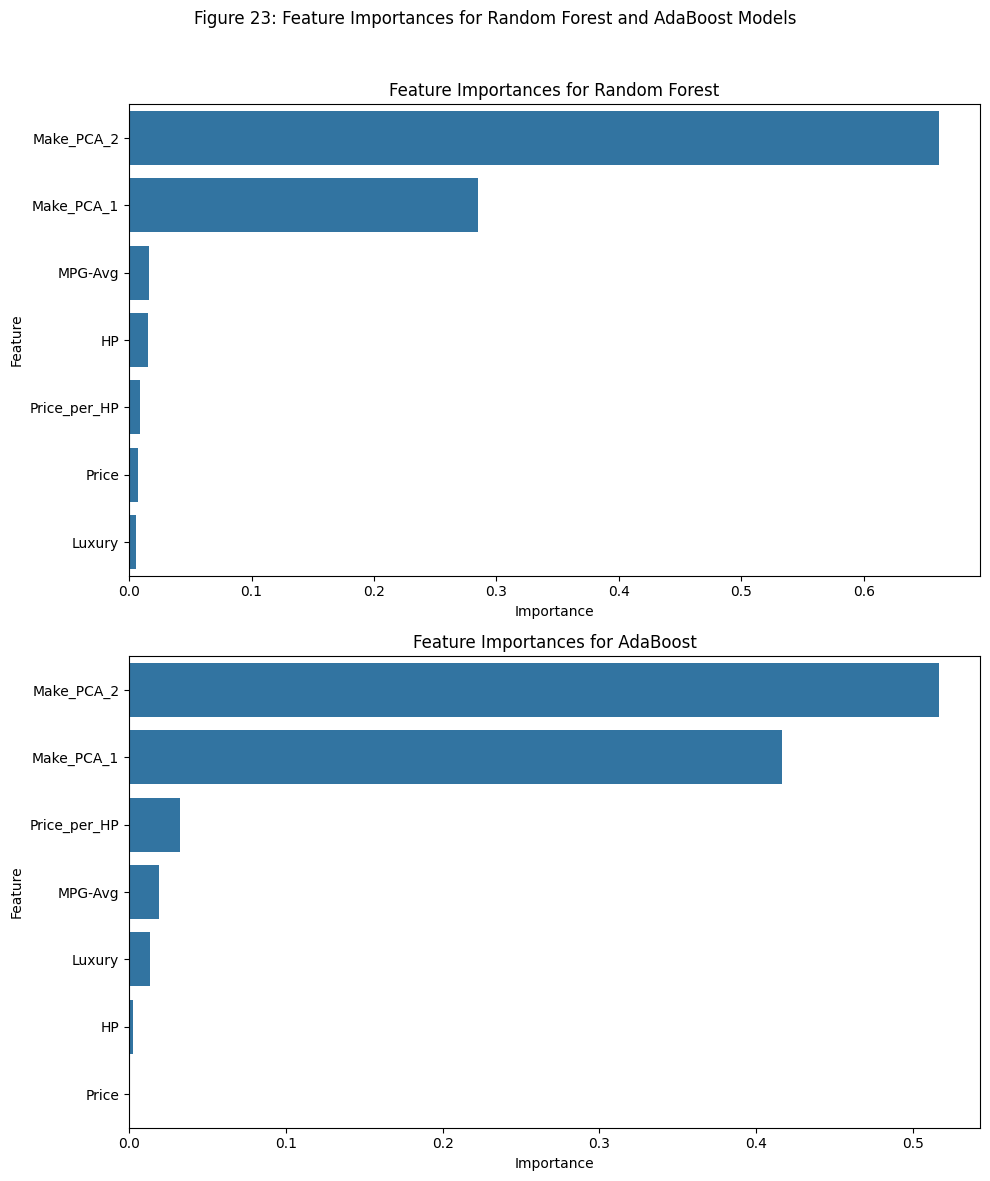

In [67]:
# Plotting feature importances

# Random Forest
feature_importances_rf_best = pd.DataFrame(
    {"Feature": X.columns, "Importance": rf_best.feature_importances_}
)

feature_importances_rf_best = feature_importances_rf_best.sort_values(
    "Importance", ascending=False
)

# Plotting the feature importances
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x="Importance", y="Feature", data=feature_importances_rf_best, ax=axs[0])
axs[0].set_title("Feature Importances for Random Forest")

sns.barplot(x="Importance", y="Feature", data=feature_importances_ada, ax=axs[1])
axs[1].set_title("Feature Importances for AdaBoost")

fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Feature Importances for Random Forest and AdaBoost Models"
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
figure_counter += 1

## Conducting an error analysis to identify where model predictions diverge significantly from actual values.

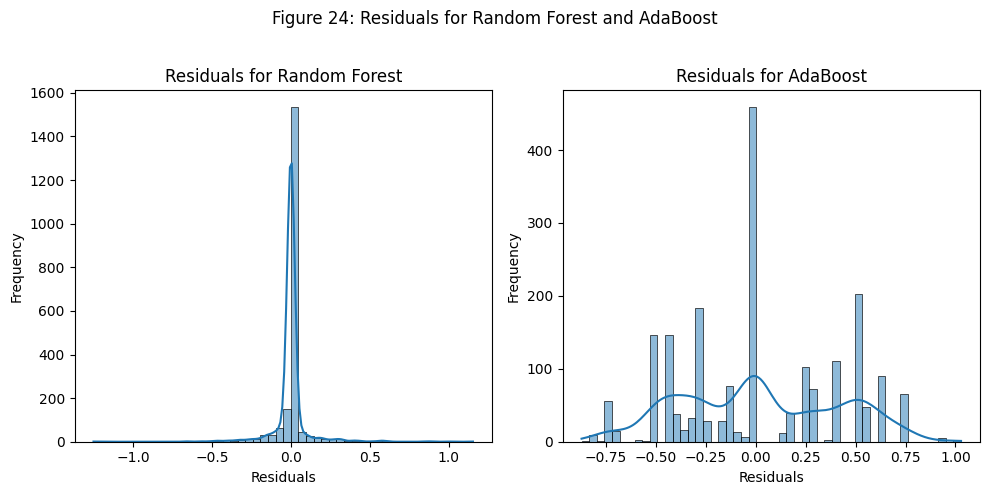

In [68]:
# Calculate residuals
residuals_RF = y_test - rf_best.predict(X_test)
residuals_Ada = y_test - ada_best.predict(X_test)

desired_sample_size = 10000
actual_sample_size = min(desired_sample_size, residuals_RF.shape[0])

indices = np.random.choice(residuals_RF.shape[0], actual_sample_size, replace=False)

residuals_RF_sampled = residuals_RF.iloc[indices]
residuals_Ada_sampled = residuals_Ada.iloc[indices]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(residuals_RF_sampled, kde=True, ax=axs[0], bins=50)
axs[0].set_title("Residuals for Random Forest")
axs[0].set_xlabel("Residuals")
axs[0].set_ylabel("Frequency")

sns.histplot(residuals_Ada_sampled, kde=True, ax=axs[1], bins=50)  # Specify bins
axs[1].set_title("Residuals for AdaBoost")
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Frequency")

fig.suptitle(
    "Figure " + str(figure_counter) + ": Residuals for Random Forest and AdaBoost"
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
figure_counter += 1

Based on the figure illustrating the residuals for Random Forest and AdaBoost, the following can be interpreted:

For Random Forest:
1. The residuals are centered around zero and are tightly distributed, with a sharp peak. 
2. Random Forest model has a good fit with most predictions being very close to the actual values.
3. The narrow spread of residuals indicates low error variance, which is typical for a well-performing model in regression tasks.

For AdaBoost:
1. The residuals for AdaBoost are also centered around zero but show a broader spread compared to the Random Forest (higher variance).
2. This indicates that the AdaBoost model has higher variability in its prediction errors.
3. The broader spread of residuals suggests that the AdaBoost model may not be as consistent in its predictions as the Random Forest model.


In [69]:
# Identify significant divergences (e.g., residuals greater than 2 standard deviations from the mean)
significant_residuals_RF = residuals_RF[np.abs(residuals_RF) > 2 * residuals_RF.std()]

significant_residuals_Ada = residuals_Ada[
    np.abs(residuals_Ada) > 2 * residuals_Ada.std()
]

# Display the number of significant divergences
display(
    Markdown(
        "#### Number of Significant Divergences for Random Forest: {}".format(
            len(significant_residuals_RF)
        )
    )
)

display(
    Markdown(
        "#### Number of Significant Divergences for AdaBoost: {}".format(
            len(significant_residuals_Ada)
        )
    )
)

# display min and max of significant divergences
display(
    Markdown(
        "#### Min and Max of Significant Divergences for Random Forest: {} and {}".format(
            significant_residuals_RF.min(), significant_residuals_RF.max()
        )
    )
)

display(
    Markdown(
        "#### Min and Max of Significant Divergences for AdaBoost: {} and {}".format(
            significant_residuals_Ada.min(), significant_residuals_Ada.max()
        )
    )
)

#### Number of Significant Divergences for Random Forest: 100

#### Number of Significant Divergences for AdaBoost: 18

#### Min and Max of Significant Divergences for Random Forest: -1.2531934931506827 and 1.154143835616441

#### Min and Max of Significant Divergences for AdaBoost: -0.8709285683719122 and 1.0277015686143889

The Random Forest Regressor model has 100 significant divergences between the predicted and actual popularity values. The significant divergences range from -1.253 to 1.154. The AdaBoost Regressor model has 18 significant divergences between the predicted and actual popularity values. The significant divergences range from -0.87 to 1.028. The significant divergences indicate where the model predictions diverge significantly from the actual values. The feature importances and other relevant factors can be used to identify possible reasons for the significant divergences. The significant divergences can be further analyzed to understand the reasons for the discrepancies between the predicted and actual popularity values.

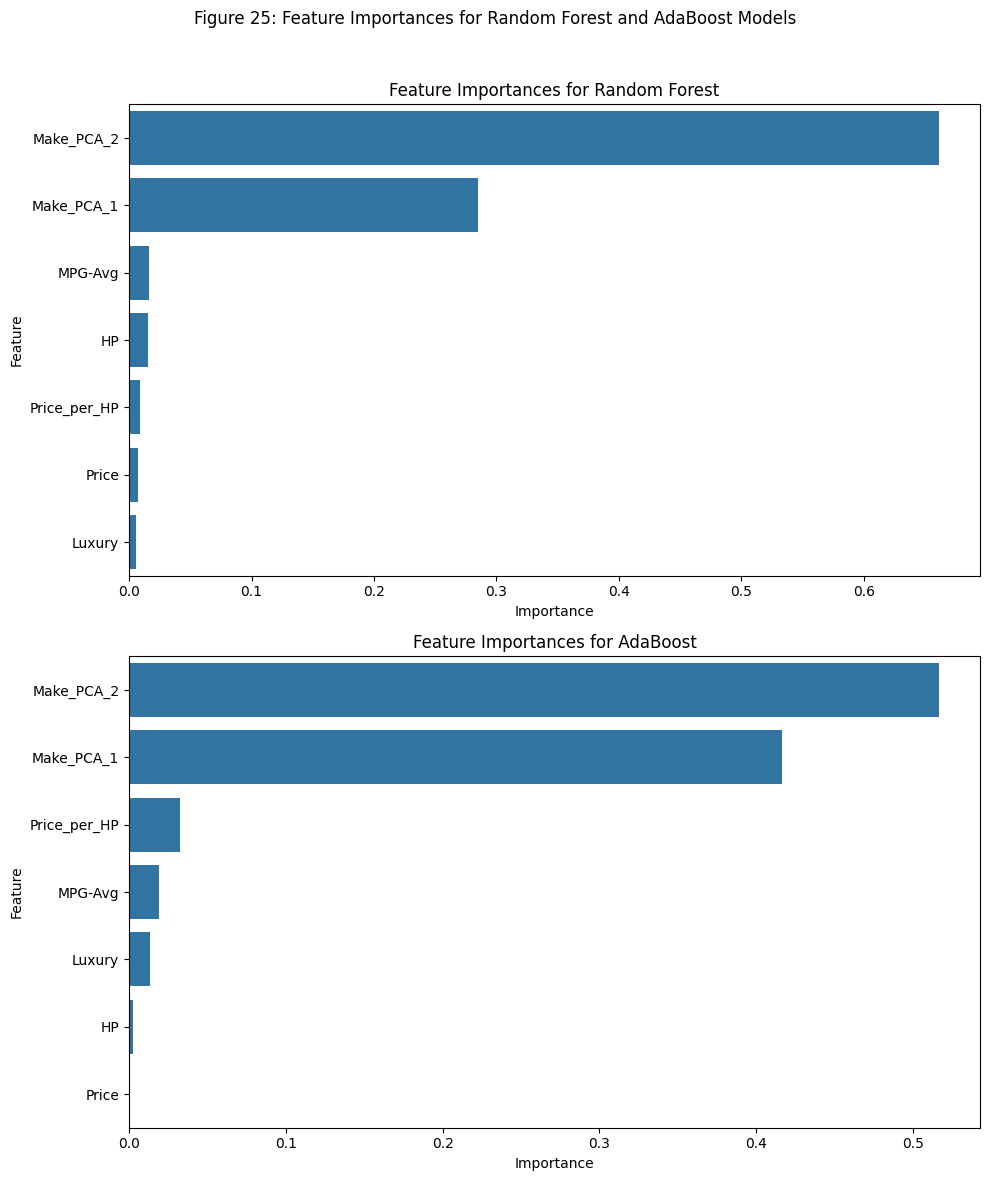

In [70]:
# Plotting the feature importances
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x="Importance", y="Feature", data=feature_importances_rf_best, ax=axs[0])
axs[0].set_title("Feature Importances for Random Forest")

sns.barplot(x="Importance", y="Feature", data=feature_importances_ada, ax=axs[1])
axs[1].set_title("Feature Importances for AdaBoost")

fig.suptitle(
    "Figure "
    + str(figure_counter)
    + ": Feature Importances for Random Forest and AdaBoost Models"
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
figure_counter += 1

### Discussing possible reasons based on the feature importances and other relevant factors.

The significant divergences between the predicted and actual popularity values can be attributed to several factors. The feature importances show that the PCA features derived from the Make_ features are the most important features in predicting the popularity of a vehicle. The Price per HP feature is also an important feature in predicting the popularity of a vehicle. The significant divergences can be due to the interactions between these features and other features in the dataset. The significant divergences can also be due to the non-linear relationships between the features and the target variable. The feature importances and other relevant factors can be used to identify possible reasons for the significant divergences and improve the model predictions.


# Ensemble Learning with Stacking
## Implementing a stacking ensemble model using Random Forest, Adaboost, and XGBoost

In [71]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

valid_params_ada = {
    key: value
    for key, value in grid_search_ada.best_params_.items()
    if key in AdaBoostRegressor().get_params()
}

# the base models with the tuned Random Forest and tuned AdaBoost parameters
base_models = [
    ("Random Forest", rf_best),  # the tuned Random Forest model
    (
        "AdaBoost",
        AdaBoostRegressor(**valid_params_ada),
    ),  # the tuned AdaBoost model
    (
        "XGBoost",
        XGBRegressor(random_state=42),
    ),  # the default XGBoost model, tune if needed
]

stacking_model = StackingRegressor(
    estimators=base_models, final_estimator=RandomForestRegressor()
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict the popularity on the test data
y_pred_stacking = stacking_model.predict(X_test)

# Calculate the R-squared value
r_squared_stacking = stacking_model.score(X_test, y_test)

# Calculate RMSE
rmse_stacking = root_mean_squared_error(y_test, y_pred_stacking)

# Display the R-squared value
display(
    Markdown(
        "#### Result of R-squared Value for Stacking Ensemble Model: {}".format(
            r_squared_stacking
        )
    )
)

# Display the RMSE
display(
    Markdown(
        "#### Result of RMSE for Stacking Ensemble Model: {}".format(rmse_stacking)
    )
)

#### Result of R-squared Value for Stacking Ensemble Model: 0.9841229966447422

#### Result of RMSE for Stacking Ensemble Model: 0.12399583101029596

## Comparing the performance of the stacking ensemble model with the individual models

The results show that the stacking ensemble model has a high R-squared value of 0.984 and a low RMSE of 0.124, indicating that the model is a good fit for the data and can predict the popularity of a vehicle accurately. However, stacking ensemble model has slightly lower R-squared value and higher RMSE compared to Random Forest model with best parameters. This indicates that the Random Forest model with best parameters is a better fit for the data and can predict the popularity of a vehicle slightly more accurately with a marginally lower error rate compared to the stacking ensemble model. The stacking ensemble model outperforms the AdaBoost model. This indicates that the stacking ensemble model is a better fit for the data and can predict the popularity of a vehicle more accurately compared to the AdaBoost model with best parameters.